# Rating Suggestor

## The aim is to build a model which predicts the possible rating when a user enters text into the review space 

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#Reading data
Data=pd.read_csv('Data.csv')

## Since Natural Language Processing stage took a lot of time to process all the records, taking only a subset of records to build the model, acknowledging that accuracy will be lesser

In [3]:
Data= Data.iloc[:10000]
Data.count()

review_id      10000
user_id        10000
business_id    10000
stars          10000
useful         10000
funny          10000
cool           10000
text           10000
date           10000
dtype: int64

In [4]:
#Checking if data is read properly, also checking data
Data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,7/5/2013 4:34
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,14/01/2017 21:30
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,9/11/2016 20:09
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,9/1/2018 20:56
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,30/01/2018 23:07


In [5]:
#Review ID and Date seem like unnecessary variables, dropping review_id and date
Data=Data.drop(['review_id','date'],axis=1)
Data.head()

,user_id,business_id,stars,useful,funny,cool,text
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...
1,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...
2,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...
3,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...
4,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...


In [6]:
Data.describe()

,stars,useful,funny,cool
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,3.716700,1.29820,0.458000,0.559000
std,1.471549,2.90264,1.557973,2.056682
min,1.000000,0.00000,0.000000,0.000000
25%,3.000000,0.00000,0.000000,0.000000
50%,4.000000,0.00000,0.000000,0.000000
75%,5.000000,1.00000,0.000000,0.000000
max,5.000000,91.00000,42.000000,86.000000


## Encoding Categorical Variables

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
# Encoding user_id
le2=LabelEncoder()
Data['user_id']=le2.fit_transform(Data['user_id'])

In [9]:
Data['user_id'].unique()

array([6528, 9055, 7346, ..., 2499, 8202, 3586], dtype=int64)

In [10]:
# Encoding business_id
le3=LabelEncoder()
Data['business_id']=le3.fit_transform(Data['business_id'])

In [11]:
Data['business_id'].unique()

array([4178, 1693, 2344, ..., 1413, 4233,  774], dtype=int64)

## Univariate analysis

In [12]:
#Printing variable data types
for x in Data.columns:
    print("Data Type of ",x," is ", Data[x].dtype)

Data Type of  user_id  is  int32
Data Type of  business_id  is  int32
Data Type of  stars  is  int64
Data Type of  useful  is  int64
Data Type of  funny  is  int64
Data Type of  cool  is  int64
Data Type of  text  is  object


In [13]:
#Checking for null values
Data.isnull().sum()

user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
dtype: int64

In [14]:
#Output Variable: Stars variable range
Data['stars'].unique()

array([1, 5, 4, 3, 2], dtype=int64)

In [15]:
Data['useful'].unique()

array([ 6,  0,  3,  7,  5,  1,  9,  4,  2, 11, 14,  8, 10, 23, 13, 18, 16,
       12, 17, 42, 28, 22, 31, 34, 27, 20, 32, 21, 19, 15, 61, 91, 47, 36,
       38], dtype=int64)

In [16]:
Data['funny'].unique()

array([ 1,  0,  4,  7,  6,  2, 14,  5,  8,  3, 10,  9, 17, 12, 13, 22, 18,
       16, 42, 11, 34, 24, 15, 20, 36], dtype=int64)

In [17]:
Data['cool'].unique()

array([ 0,  5,  1,  9,  4,  6, 11,  3,  2,  7, 15, 10, 26, 22, 12, 17, 18,
       25,  8, 21, 20, 59, 86, 55, 30, 13, 23, 16, 31, 28, 14],
      dtype=int64)

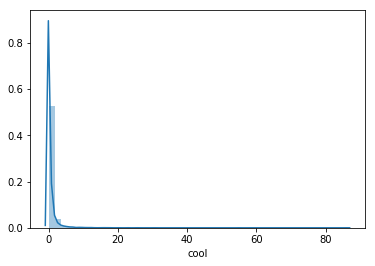

In [18]:
sns.distplot(Data['cool'])
#Skewed distribution in "cool"

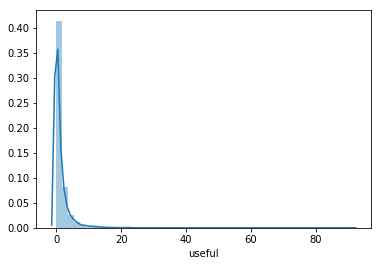

In [19]:
sns.distplot(Data['useful'])
#Skewed distriution in "useful"

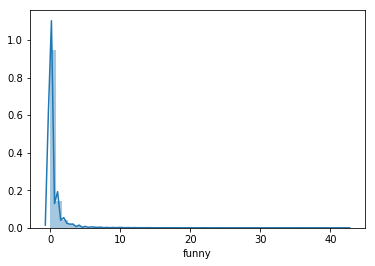

In [20]:
sns.distplot(Data['funny'])
#Skewed distriution in "funny"

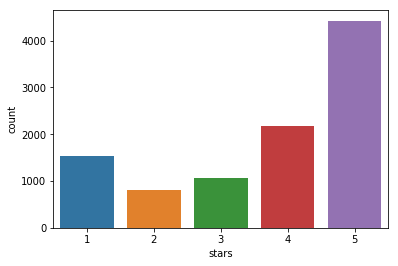

In [21]:
#Output Variable
sns.countplot(Data['stars'])
#More number of 4 and 5 star ratings

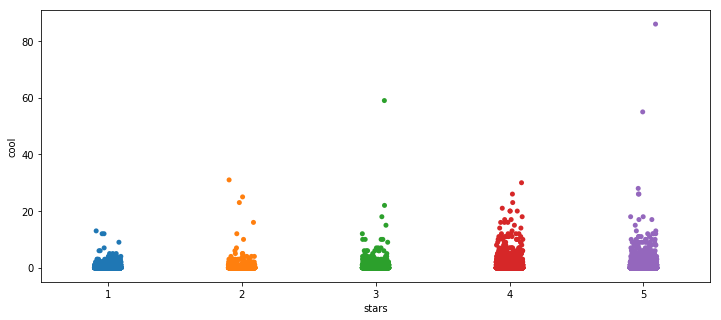

In [22]:
#Distribution of ratings based on how cool the review was
plt.gcf().set_size_inches(12,5)
sns.stripplot(Data['stars'],Data['cool'])
#A weak upward trend of stars with increasing "cool" value, with higher dispersion in stars 3 and above

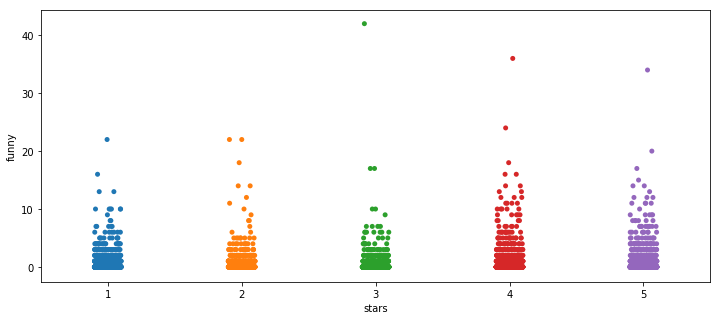

In [23]:
#Distribution of ratings based on how funny the review was
plt.gcf().set_size_inches(12,5)
sns.stripplot(Data['stars'],Data['funny'])
#No discernable trend of stars with increasing "funny" value, but higher dispersion in ratings 3 and above

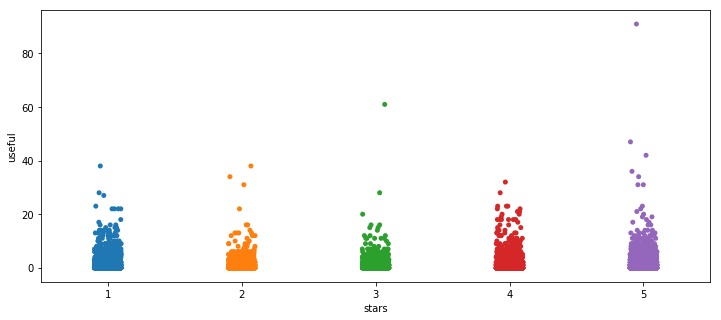

In [24]:
#Distribution of ratings based on how useful the review is
plt.gcf().set_size_inches(12,5)
sns.stripplot(Data['stars'],Data['useful'])
#Not discernable trend observed

## Natural Language Processing on the Review Text

In [25]:
Data['text'].head()

0    Total bill for this horrible service? Over $8G...
1    I *adore* Travis at the Hard Rock's new Kelly ...
2    I have to say that this office really has it t...
3    Went in for a lunch. Steak sandwich was delici...
4    Today was my second out of three sessions I ha...
Name: text, dtype: object

In [26]:
import re
import nltk
#nltk.download('stopwords')

In [27]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [28]:
#Text Cleaning: turning to lower case, removing non-alphanumeric characters and 
corpus=[]
for i in range(len(Data['text'])):
    review=re.sub('[^a-zA-Z]',' ',Data['text'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english','french'))]
    review=' '.join(review)
    print(review)
    corpus.append(review)
#corpus.head()

total bill horribl servic gs crook actual nerv charg us pill check onlin pill cent avoid hospit er cost
ador travi hard rock new kelli cardena salon alway fan great blowout stranger chain offer servic howev travi taken flawless blowout whole new level travi greet perfectli green swoosh otherwis perfectli style black hair vega worthi rockstar outfit next come relax incred shampoo get full head messag could cure even worst migrain minut scent shampoo room travi freakishli strong finger good way use perfect amount pressur superb start gloriou blowout one two three peopl involv best round brush action hair ever seen team stylist clearli get along extrem well evid way talk help one anoth realli genuin corpor requir much fun next travi start flat iron way flip wrist get volum around without make look like texa pagent girl admir also worth note fri hair someth happen less skill stylist end blowout style hair perfectli bouncey look terrif thing better awesom blowout last day travi see everi si

look best pierogi pittsburgh place small tabl outsid busi carri pierogi plu win best pierogi everi year owner poland make real deal pierogi best part hand pinch group older polish hungarian women biggest seller potato chees sell mani flavor like plump pillow soft buy buy dozen get cold take home freez warm readi eat warm one serv butter onion definit comfort food best part ship intern ye good
food alway good price reason although exactli restaur like snack bar limit menu walk counter place order wait minut prepar order pay cashier search tabl kind like sandwich shop still much better choic valu hotel deli strip
pick meat planet chef make mexican style dish amaz flavor wow fish lamb taco die drink great well
great food great servic obvious fri chicken healthiest food earth month get crave good fri chicken chicken great seem fatti side excel
plumbsmart provid superior servic begin end abl repair badli damag sewer pipe one day notic particularli pleas attent care clean landscap job comple

year surgeri sac wish could turn back time promis great thing butcher bodi left bodi alon bad perfect often talk ruin good bodi never forget dirti nasti slipper come oper room run room
uniqu place great find waitress funni knowledg fantast job food amaz definit return recommend restaur coupl
best wonton soup ever delici food great servic chicken satay roti c wonton soup one fri noodl shrimp dish definit back
never experienc discrimin last night place femal dress heel place divers far everyon dress dress heel jean flip flop short etc immedi notic larg group peopl particular race come back line go insid thought noth assum list got weird notic guy work door walk back fourth scan line peopl would pull let go insid everi time happen group caucasian peopl caucasian girl front us behind group black male girl pull line taken door go insid talk list guy told must list leav guy left watch happen quit time gave remov line stand front realli long time acknowledg guy work door funni thing make big 

compani host dinner award night hotel last night experi best could imagin work kristin cole fantast commun alway point walk blown away set compliment food night came work today flood email impress everyon present staff help us great believ tim charg anna one gentleman made us laugh gave us privaci need back recommend everyon
ye boba tea explos full forc lee lee intern supermarket chandler mani time never notic littl gem next coupl year ago boba tea hous serv best boba tea valley long becam big thing fantast array flavor drink choic choos like fruit slush snow milk tea pud mango jelli coffe jelli etc even snack like popcorn chicken fri tofu fri staff super friendli price reason still laugh friend idea boba tea afraid suck one chewi ball thing lol case know boba tea flavor tea usual milk chewi tapioca ball fruit jelli ad think super delici today got blueberri milk boba tea made perfect snack middl day anoth favorit mine honeydew milk tea
yum kale grit would definit menu choic uniqu farm 

familiar scottsdal guess restaur fairli new atmospher great live loud huge wine drink list food realli good highli recommend ahi tuna appet ravioli skirt steak
good morn cocktail wait oh vega dine best diet place liter definit excess good way sucker benedict awesom servic realli great staff welcom first stop land realli appreci servic back hawaii remind zippi anna miller home feel price bit high get total worth rememb place ever return vega futur
hand best bloodi mari ever mani thing bm veggi mmm bacon nail appet also burger fri knew fri could good present disappoint ether nice great seat outsid although sat insid would love see restaur near hometown serious get bm rock guy
charg twice expect pay guy counter small talk ask want addit insur said initi told notic one thing initi collis waiver insur need end doubl origin cost walk addit cost may even purpos mislead distract small talk experienc travel noth like happen return car express surpris doubl cost essenti said well sign worth anyw

sure post neg review place point girlfriend dinner last night reserv set p seat server william awesom fast attent realli one best server encount dine lot order eat crab leg fresh hot delici feel sticker price high must bucket equat buck pound neg feel could address tabl made type epoxi resin outsid may melt someth sticki residu tabl top play napkin accept girlfriend definit return pickl bill fantast even last thing note servic great even though place pack
huge fan mission decid tri place see own owner even though skeptic could possibl great surpris live other told ambianc amaz much like mission candl light entir place outsid patio quit larg lot seat avail staff great help make suggest menu favorit item menu scallop appl caramel upsid cake cook perfect melt mouth great wine list perfect set enjoy glass wine great date night spot recommend friend
tri shop montblanc toronto sever time select limit sale staff attent friendli recent tri replac ring receiv gift lost toronto store quick ident

well definit lost custom rc willey come father year old move lo angel begin month closer kid order fulli paid bedroom set call like day order deliv confirm appoint advis ladi one live father apart yet could call way could rush place open door mean live complex long wait said would let guy know promis okaaaaay paid furnitur repeat custom make one quick easi courtesi call well miss deliveri call made found landlord came went offic go let said someon sign paper top got dad key check place arriv note counter said sorri miss enter apart left note put damn furnitur togeth deni go hell paper get counter anyway dad arriv furnitur pay deliv furnitur day later father bad arthriti basic cartilag knee make hard get low area couch floor almost sleep friend let us borrow air mattress luckili still get though crawl get around place abl get place work bottom line custom attitud purchas crap show never back
get monthli massag past five month coupl therapist good lack experi stock stuffer husband schedu

right bat need tell love thrift store shop ador occasion sultri dream okay stop saver heaven hell la vega thrift store will get dirti get knee repent suffer repeat disapoint order achiev nirvana true thrift store find first trip chew barbi doll incomplet board game second trip set christma light mark walmart third trip back chimera unicorn black velvet paint two tiger flagrant delicto elvi cooki jar wine cooler made abandon suit armor red leather michael jackson thriller jacket bronz toreador sculptur ah thrift gasm thank saver see next week
gang sun valley stereo definit top notch ryan get right point saw interest work togeth verifi part upgrad rx pioneer nex touchscreen back camera drove minut work first left adjust need took back without hesit made everyth right instal commit treat car like took extra step make right even fix hatch door volt socket go extra mile star
famili visit locat sinc open realli rememb year although sever review bad custom servic found definit staff turnaroun

blown away sophist beauti hotel one best la vega decor breath take place alway smell like magic garden mani top notch restaur spa servic show club choos vega luxuri last time stay juli big disappoint total us one bed broke fell flat floor foul play us left kind bug bite look like terribl case eczema rash mechan curtain work main v work actual disappoint understat disgust star resort hotel fail us miser pleas view pictur rash
brussel sprout nacho realli good review mention time everyon alway love care easili fill individu taco burrito great also salad love big portion size great classic margarita well love place group esp sunday day happi hour
realli underwhelm flash brew plastic spigot store coffe coffe menu consist differ syrup coffe concoct rather region singl origin blend even fresh roast bean red eye okay certainli noth special drinkabl wit manag scream kid phone weird experi patron busi
gluten free option promis tri turkey sandwich avocado larg portion delici choic ice tea blend f

found gem man co worker use live apt complex live mile away apt final gave tri back delici chip mini tortilla break salsa yum food delici rememb last time went manag finish half take home tast better later imo portion gener fill wait staff alway nice attent rememb first time visit pretti busi wait long tabl mood mexican food want fast food experi definit choos place
went friday sinc stroll around venetian came across place wait bad around pm probabl minut max place serv varieti latin american cuisin includ tapa taco burger standard price vega order brisket taco feel tast anyth ordinari servic okay thought realli awesom server ask parti right away allergi item enjoy eat howev portion smaller side perfect lunch want lug leftov around
paid view strip disappoint view pool saw ti facad trump tower worth extra price restaur choic great food good casino fun room okay would think twice stay custom excel staff stand
like hair band music place audienc realli get well flashlight lighter hair exte

hand best pizza place mentor pizza delici smell alon enough make drool cheesi bread soft cheesi good pizza good leftov next day servic staff friendli star sure
went ziti rememb sauc aw pasta pool water sauc zero flavor feel like sauc make break meal tasteless garlic onion wine basil noth portion also quit small price clearli box pasta homemad stingi surpris high review actual experi famili experi great guess decent place famili would definit go differ italian restaur look good food
usual go lindo michoac n want mexican sit restaur felt like talk husband tri juan ok hook servic great got fajita steak chicken add chees good lot flavor love fideo soup chip onion pepper salsa bean dip good although favorit gripe smell fajita left smell like work grill cloth satur smell skin felt greasi notic smell cloud smoke restaur sat sure anyth special plan eat price par mexican restaur get enough eat definit back pack febreez
research peopl place complet unprofession went juvederm procedur lip disappo

challah french toast pair turkey bacon pretti awesom breakfast thoroughli enjoy howev felt staff lack servic nice prompt would disappear quit time know peopl call short staf one plan stay awhil food good though
tr grand caf mai aussi calm et repos je sui arr alor que j tai dan le coin peu mang le midi prendr une p tisseri ou un caf th j ai prit un th qui tait vraiment bon et je sui po devant une de grand bai vitr es sur un coussin et j ai relax compl tement pendant heur mai c est aussi une coop rativ artist avec une estrad etc il aussi un magasin bio l entr e vou retrouverez de savon huil oliv et plein autr produit
food great server karu bomb cool nice good look guy perfect spot bring friend group great atmospher great menu choic spici good haha defenit come back
chilaquil point bought last save breakfast today sauc tortilla good
e mail head offic month ago lousi experi yong colleg street locat never receiv respons never huge fan begin confirm thing oh cobb salad chicken anymor rip
aw 

review arriv hertz around pm aug th abl get rental minut pick process pretti simpl either go custom servic rep use self serv kiosk end ladi assist kiosk phone pretti friendli lot sell kind bothersom need bigger car economi size sinc us understand probabl work commiss sometim unnecessari tri convinc get someth need return process pretti quick easi well end get charg extra day brought car back hour pick time sinc flight leav pm bad grace period regular custom car fine get anyth fanci kia noth much write fact clean smell bad like rental encount elsewher
sooo good bulgogi dog crave right tasti want go back tri carn asada fri see soon
occas last week experi sport medicin physic therapi depart outstand dr anthoni toni walker jennif hannon great team realli know stuff beyond know stuff continu dialogu patient appoint began discuss exercis work feel work would get plan day go forward involv therapi continu joint plan month treatment administ tablet form survey ask condit affect life therapi ru

went lunch got grill cajun chicken sandwich salad fine servic realli good overal bad place noth spectacular
battista hole wall awesom went first time vega kickbal tourney wakapalooza earli octob teammat huge fan suggest place rest team big team dinner saturday night locat right next flamingo hotel stay abl walk restaur pretti big tabl sort cramp togeth small room decor awesom definit friendli local vibe sinc parti pretti big us wait bit get tabl big deal sinc start pre drink bar price rang meal depend rang get unlimit red white wine meal though plu meal come minestron soup italian salad garlic bread pasta side homemad cappuccino order lasagna huge probabl ate quarter got full probabl full fill garlic bread help garlic bread ah maze cappuccino realli good hot chocol coffe honest servic good kind enough split parti two help make check easier even gentleman come serenad us accordian would definit come back
speechless without word properli describ place everyth place amaz staff food everyt

must go destin phoenix chines mexican jamaican fusion fast casual like call confus phoenix origin diner dive drive in first time go counter left cash regist ask orient walk order process give sampl sever dish grab order form pick item combo choos black white realli need know jade red chicken jerk chicken black bean white rice jade red chicken sort take sweet sour spici twist jerk chicken jamaican influenc quit spici day black bean amaz stir rice easier eat chopstick mention get snickerdoodl order yep best snickerdoodl around one come everi dish chino time make run border great wall beach make sure read non pc shirt wait funni
think first peopl encount courteou friendli critic insid melt littl front desk help friendli therapi excel even decid join well program accommod manag expens
terri owner fix car year done consist great work complet trust opinion tell think wrong cours action seen mani project year mani differ stage complet alway look run superbl shop alway full car differ decad di

new calgari homework line settl capo one first meal disappoint tabl restaur intim contemporari stuffi decor washroom spotless servic friendli point truli want dine experi cut rest attent without intrus food gnocchi suggest us guest seat nearbi heard new town select wonder pillowi dumpl puff lobster truffl oil sold husband share plate delici restaur split plate kitchen problem fresh bread came shallot butter wow must tri love flavour butter main meal trio got dock side perfect scallop perfect shrimp tender butteri fish filet ask husband chose meat option could describ filet butter love everyth els accompani small hot pot fresh veg insid butter broth hit well sparkl volcan water nice chang us wine list beyond impress one glass red white mmmmm everyth italian includ waiter nice see knowledg menu passion serv chef obvious took lot pride work creat us perfect plate end meal sadli came although stuf chose share lemon curd berri plate cleans palat best choic could made find next time come enj

listen low review wish liter worst went two router broke one get us anywher near speed pay call chat multipl peopl could get replac router final got replac thing seem okay complet broke less month even turn anymor suggest go buy new router best buy btw sell dsl router anymor wtf charg ridicul ship price replac item work properli everi time chat get differ answer transfer peopl even get close answer question use servic might cheaper cheap enough deal bs put though
great food price serv gener atmospher good nice place tradit mexican old town realli like pollo relleno
averag food servic spotti depend time day look elsehwer surpris still busi
paco taco real deal spite great yelp review still reserv eat anoth texmex chain good could thought well total nail complementari chip dip sauc stain napkin dine area empti peopl bar upon arriv late lunch adlai server help recommend knowledg menu overstuf grill chicken taco arriv mexican rice mix cabbag coleslaw charro style pinto incred price drum rol

dismal lukewarm defrost tast texmex glop mumbl unengag waiter clueless manag see us bare nibbl entre plate shove forward pickup thank us perfunctorili patronag texa hill countri jail critter serv grub bad protect never never never back yard hous real food
thing found interest place self tap tabl sit servic horribl bloodi mari disgust place sausag fest mani guy also extrem disappoint small danc floor knew dierk bentli sellout open bar old town scottsdal place true countri root
ate friend birthday see ka theater right next restaur mgm grand great show restaur reserv seat right away check hostess restaur open see bar kitchen casino floor order special night pappardel pasta chunki tomato sauc shred lamb kale truffl infus breadcrumb freshli shred parmesan torn sever item menu want special sinc vega weekend phenomen rare eat lamb delici incred tender tast delici sauc thick almost like tomato chunk even feel like eat tomato sauc balanc sauc meat kale absolut perfect also moscow mule cocktail 

made yelp account could write review rude staff first time came thought mayb one time thing consist unfailingli disrespect never life come back
resid mountain edg obviou miss necess trader joe even settl sprout costco nice big gym place bark dog place buy dog phoeb food get groom phoeb even first name basi local gem staff knowledg thing dog love babi much love liter less mile casa ye pup lucki even spoil locat jealou jealou
pastri pretti good ice coffe terribl tast like ice tea ice coffe make comparison much better ice tea even hate say love local coffe shop recommend coffe hope food better
guarante leav full happi tummi good great custom servic amaz beat complementari bean dip salsa food alway fresh never disappoint fajita alway good choic order fresh guac prepar tabl like dinner show definit back whenev town
recent visit pieolog first time friend recent realli pleas select tast pie set price pick crust base sauc top regardless amount varieti pizza made order place oven mayb minut glu

sent vision sourc south hill second opinion enjoy appoint dr strain found knowledg attent howev incred displeas treat staff went vision insur staff member assum inform ad file call month later order contact told could pay contact came pick need pay phone never paid contact pick figur big deal differ offic got statement order realiz charg full amount run anyth insur compani call back met answer say would call back later never call back final learn vision insur never ad file go inform second time assur would file claim insur compani would receiv check soon never back forth anyon staff apolog recogn made mistak fact everyon talk seem agit reprocess claim month later receiv refund along updat bill statement amongst revis patient insur payment statement describ revis necessari read patient origin say use insur paid full contact decid day later would like us bill vsp refund remain balanc first medic establish come contact requir advis desir use medic insur profession medic establish run bene

chuchai time trust get sticki rice crispi duck would given star last time food arriv cold ask reheat came back tabl cold second time patio great peopl watch spot summer plu bring wine help keep cost see tad overpr
love place admit stuck old fashion turkey sandwich cranberri sauc real fresh roast turkey think roast daili sure great wheat bread sauc bit bite compliment sandwich well huge help turkey set old pecan grove matur tree grass relax kind place enjoy phoenix weather food close summer wait open back fall perfect end howev desert hommad terrif get past pecan pie perhap best phoenix crust right flaki load pecan hungri write review
love saver deal great staff posit good qualiti see much anyth stain etc everyon great attitud clean made special trip vega past weekend la hit local saver includ one henderson almost later deal adhes four pair boot pair shoe saver deserv five star adhes back price tag hard remov frustrat level palpabl put insid shoe bottom tri remov leav gooey residu fun s

first time visit sabor today say absolut spectacular culinari experi latin street food fresh tasti empanada perfectli cook juici dri street corn favorit mine best far highli recommend shrimp steak taco soft great flavor order slice avocado creami cold quacamol togeth rosa sauc fresh lime side made meal level paid expect love mani choic choos make meal satisfi food crave prefer might fresh clean top staff friendli help joy kid love perfect littl addit davidson well definit see us becom regular
tonkatsu ramen black garlic oil nori extra tamago amaz definit add black garlic oil must everyth prepar fresh scratch definit worth come back custom servic excel truli love experi chef super help realli care custom simpl place small menu ramen delici noodl freshli made well pork soft boil egg perfectli made overli season would recommend come
ok first yelp review bear tend break thing categori go atmospher confus decor kinda kitschi supposedli evok dinner mom someth order yeah realli loud obnoxi re

highli recommend spa asian foot massag spa dime dozen one profession clean overal pleasant place get massag towner take even main strip take cab chinatown strip get foot massag dinner tea downstair visit shop part town
treat lunch even free lunch satisfi first french onion soup littl flavor almost water chees overcook clump bread bread soup short rib entre rib extrem dri overcook portion small meat ined even finish meal flavor infus sauc cook onto meat flavor meat extrem disappoint guess garner major busi towner stay hotel connect definit lunch rotat downtown
love ny citi pizza pie excel rendit share portion ny desert
last time area lunch time chao still built open today first offici visit check thing tri one entre menu choic anyth like ate today definit regular tri pad kee mao chicken know consist rice noodl onion thai basil chili littl bell pepper slice tomato somewher cover spici brown sauc flavor entre amaz definit someth order one co worker decid eat light order chicken satay also

look hotel stay skeptic mani hotel one usual citi never visit howev extrem pleas stay platinum locat locat next pm ga station great could pregam cheap went variou place hotel visibl still cut half mile venetian custom servic walk greet warmth mani peopl lobbi actual case throughout entir trip chat front desk associ like old friend nice made feel welcom room tell room everyth life ok told room believ room fact suit felt like apart leas freak huge separ area kitchen complet full fridg stove oven microwav dishwash bar live room balconi bedroom queen bed safe closet tv bathroom closet garden tub separ bathroom doubl sink vaniti bathroom size room complet clean stay wondrou time everyth need view perfect view strip perfect way part vega without nois smoke get hotel casino half price less depend go first night vega spent relax beauti room tip even go get full massag servic spa least purchas cupcak bath salt use beauti tub relax def bring sister cousin back march wait im sure left someth get 

help staff locat littl farther home depot yelp coupon price item purchas par lowest home depot big box store ok howev tri support local economi adequ select friendli staff close locat continu spend money
fresh delici go poke spot citi gener portion clean great select accouter
fantast experi barber shop claud fantast great person talk chair art haircut take time great convers patron wealth knowledg area fantast person talk greatli appreci servic skill kudo claud
venetian eleg distinguish resort casino gorgeou romant decor interior way room greet candlelit hallway ceil light way even though tri restaur bouchon smell eman kitchen made mouth water casino expans sign everywher easi navig room huge clean well maintain conveni store bakeri coffeeshop locat entranc casino near elev room plu need get quick pick forgot pack someth venetian must stay ever la vega give dine gambl stay experi never forget
experi dr malek noth short fantast staff profession kind great answer question without pushi s

call say ill minut given close arriv parti mention phone deni extrem rude lack profession courtesi
five star ice espresso bianco ice coffe fan whatsoev amaz venetian date night dinner show got earli walk around stop get drink took chanc drink get caramel flavor flavor happi sure layer froth milk top mix stir flavor drink realli kept coffe flavor without get dilut ice caramel wish one later today
bought bow nice equip staff member work seem like didnt time question got cool school kind vibe purchas elsewher wont go back told close friend take bow purchas elsewher sportsman warehous much friendlier custom servic
love buffet compar buffet wynn prime rib warm snow crab leg cevich sushi omelet bar littl everyth ton dessert well defin lay come back next trip vega
oh good start pleasur enjoy bbq chicken bean potato salad week ago meat perfectli tender juici bean oh god bean talk perfect top delici food servic receiv beyond star offer sampl work told could bring food conveni take advantag assu

love sonic rais san diego sonic super excit see town locat closest hous one visit often never bad servic order taker server friendli burger noth spectacular good love option tater tot fast food place offer well drink best part love custom soda add flavor combin noth like raspberri limead hot day dessert also pretti delici best time year red velvet cake blast wish carri year around pumpkin pie blast also realli good season treat wish open hour believ open fairli late night
hand best jerki bought sweet heat perfect amount heat ate entir bag one sit son love teriyaki beef forget fur kid bought bag beef bag turkey top ten dog treat went crazi stuff custom servic awesom realli cool guy work shop love place
stay hotel strip even stardust frontier around encount atmospher check line restaur pool nightclub hotel hand venetian palazzo best offer luxuri ye club better tao better restaur grand lux hotel great servic great decor room venetian like hotel focu one great trait day club night club roo

omg good wait go back love atmospher food amaz eggplant one favorit culinari experi life leav anyth plate thank guy
everyth pretti good beef mongolian beef chewi weird textur know alway chanc tri new chines restaur rest food good noodl realli good fri rice
adult grill chees novel concept food good great wait long prepar long wait place alway pack bread quit greasi innard excel along gigant portion
okay full meal drink less somebodi say valu came brunch saturday around rel full order malaysian curri chicken rice malaysian street style sandwich soy milk tea hot honey lemon juic malaysian curri delici realli realli oili could liter see pool oil gather top bowl fine probabl still enjoy sandwich highlight realli fill still super light tasti bread white toast crispi butter stuf everyth promis make feel gross afterward tea great comfort saturday morn meal locat right besid erindal go station plaza sushi tei chili chicken hous wonton chai noodl among other northwest corner creditview burnhamth

good food around meal begin complimentari side korean restaur known addit usual sprout kimchi etc island style also give boil peanut nice touch went wth cold noodl half half meal realli like dish side offer nice tast wish could spicier end content full happi choic dine experi well worth restaur mom pop feel seem authent everi aspect good option eat area
swear serv size place could easi star husband along boy sc last weekend schedul mainten one suv sinc appoint earli rush without breakfast cours entir time wait area search food place bookmark went check see menu vegan option boy vegan arriv boy place busi peopl stand outsid wait tabl went see list work sheet paper land one man sever set peopl extrem small ppl capac entri way flag server came take name other wait name explain us long tabl middl work basic tabl st come st serv ad name list put wait tabl around room outer perimet told min sat car husband went insid everi min see come sinc take number buzzer total mind process seem earth co

never disappoint pick slice desert ridg slice kid love fan nyc triangl slice plu pick weekli magazin read shop well
reason rate staff best design like design nail hesit one want end hawaiian flower toe ok best impress cleanli salon larg polish select nail last long time mean lot friendli humor use english talk patron great think price great waxhaw area paid without tip full set french manicur sparkl pedicur design use pay servic last salon definit go would recommend make appoint saturday went turn peopl away
love nicol fabul bartend alway give us great servic love wahoo salad fish
woke earlier week crazi case torticolli turn head right spasm like crazi went joint wednesday thursday friday today quick easi adjust back almost today mention offhand tmj week two second adjust bam fix heck ask sign monthli program sure take full advantag
nice rel new mesa gun shop old bank build w clock tower main st good price decent ammo inventori help knowledg friendli staff veteran own modest veteran di

first love barbecu second love place serv pile meat tray simpl creatur nake bbq fun fast tasti staff ridicul nice fun food side bit lacklust need bit spici punch addit creami fatti good total okay meat real star tri four option agre like brisket pull pork chicken tasti well overal fun casual lunch mention meat tray would total stop lunch brisket pick adventur
first time tri salmon enchilada brown rice cajun bean salmon tricki fish mention previou review happi tast well cook tender salmon red enchilada sauc spici unbear cajun bean also spici tender made white bean bean right kind tender indic can bean brown rice regular wheat rice great place baja fish
visit locat three time staff nice get order wrong everi time sometim thing standard ice cream shop hot fudg pm know first world problem understand one visit disappoint three row probabl back give local ice cream place across street carolina creameri tri
came wednesday afternoon jessica kailey amaz drink ice cold perfect staff nice fun lov

use annual vacat vega either girlfriend husband koi place go get sushi need ever sinc went social hous certainli chang mind go koi girl friend went social hous last saturday littl restaur open dinner host friendli inform us restaur open dinner yet girl friend cocktail wait wow love socialit cocktail girlfriend amaz lycheetini drink incred definit gave us boost confid meal time dinner pick bottl sparkl sake call hana awaka sincer best sparkl sake ever littl pricey pricey vega definit amaz experi tri someth new food oh food incred favorit hamachi jalapeno hamachi tartar miso cod lettuc cup uni dish nice portion sinc meant share thought great concept food fresh nice flavor actual order dish girl friend definit sushi heaven everyon restaur extrem friendli seem genuin happi work manag came ask us twice see satisfi food good time water never went half empti water busboy constantli refil soon drank someon drink lot water meal constantli ask water huge plu ambianc amaz enjoy trendi music loud 

nestl rel sleepi corner downtown urban bodega aka urbo feel like someth throwback small conveni store use see line roosevelt row neighborhood back downtown still neighborhood diehard entrepreneur dare tread could find one small neighborhood shop sell everyth wine beer snack cook essenti even household clean item rel new pure fillmor apart complex current first undoubtedli mani new apart condo complex line th avenu downtown nearest full size groceri store requir car reason urbo locat make sens find urbo bottom floor pure fillmor apart fillmor street east th avenu brainchild desoto central market alum shawn connelli enter front patio area seat eight way insid whole lot stuff mix small space behind counter get coffe tea even sandwich made spot front counter essenti small independ conveni store mani thing expect candi bar med condiment snack microwav item beer wine soda well odd end like tissu paper shampoo storag bag well imagin downtown colleg student live apart upstair hung tire drive t

look sweet fabul cocktail dress love special item date petal solid choic petal first open taken aback open airi space also price first blush store offer much besid accessori yet time petal begun bring vari select appeal wider stylish market still offer cocktail dress also showcas varieti merchandis rang plu catch sale day worth trip brand wise find upscal brand like shoshanna amanda uprichard alic trixi frock traci rees jame jean anlo citizen human mention begun add afford piec greylin la cloth also spi hand accessori handbag scatter rang price overal like petal know saunter back even take love dress stun top display hope continu add varieti price point
sampl small plate good staff help beer select lack sat patio okay need invest plant planter old dead plant realli help ambianc concret patio
never rent friend lost key car lock car call let us wait hour transfer key compani compani requir us annual fee one time unlock final end talk hotel call local key compani also made reserv middl ca

realli want love place neighborhood beauti decor clean interior product stop christma receiv welcom tour get nail done last week shop decid stop see need appoint could take walk nail tech sit around custom women front fluster appoint ask could get gel manicur custom never feel unwelcom thought leav final took nail tech complain gel nail tough get struggl week post manicur nail chip need redon lot kink work hope matter beauti space custom servic well product everyth
mari husband came assembl piec larg small good job polit think extend courtesi actual ask come back anoth small job need fixtur attach cabinet drawer mari quot price accept agre date day suppos come hour schedul time mari text told husband flat tire late told problem ok silenc never heard back text time reschedul ask everyth alright even ask ok know mari got messag gotten read receipt complet ignor strang work rate four appoint cancel non respons id give zero could stephen w said real pro beg differ profession run busi alway

initi pass place sinc nestl typic strip mall next kinko rural road e univers meet friend quick inexpens hope tasti pre movi dinner valley art theater mill decor would call basic frill cafeteria like set found mani indian thai restaur frequent practic comfort staff friendli welcom menu typic indian fare share appet garlic naan veget samosa enjoy begin love eggplant go order baingan bharta rice delici order mild right amount kick restrain devour whole meal save enough take home full meal expect meal great valu tip bad two healthi meal crave indian near mill return delhi palac namast
order time time differ sandwich greasi soak texa style toast bland ever could put anyth honest tast like hot greas perfect like indigest stomach pain hype restaur worth visit
place rock world server super friendli food fantast come time week extrem satisfi everi time great happi hour denis maggi best
holi crap bad review believ place ate dinner last night came around pm an sat patio sever server come ask read

good food nice clean place ate buffalo soldier took sweet home alabama home yum
love southview think ever say love dentist offic everi member staff extrem friendli courteou matter time day everyon pretend best mood ever profession clean modern even relax everyon upfront price want make feel comfort possibl massag option chair tv headphon tv ye pleas even though know churn patient never feel rush door question concern initi consult teeth clean old fill repair even new caviti fill use three part numb process never issu pain complaint sometim especi toward end year appoint hard book kind goe place definit recommend
realli disappoint recent visit vintag make everi six month alway talk friend tonight went husband law order caraf sangria alway top notch law order bruschetta end ton untoast bread thin coat ricotta light top good qualiti tomato tasti bruschetta definit worth husband got artisan board one meat one chees got teeni tini piec chees four thin slice good sopressata stale bread crack

omg longhitano absolut disgust satisfactori meal arbi hype po server polit bit ditsi understand question ask repli correct respons order alfredo smell look terribl upon arriv forc least tri huge mistak stab fork one big massiv clump tast like held togeth elmer glue water flour although luke warm best surfac cold underneath even poor attempt garlic bread laughabl someon smear butter toast sprinkl much garlic salt pretti damn bad oliv garden food toler ined crap friend order biggest haja steak sandwich call biggest hard turd sandwich want provid accur descript bit liter could tear one piec tough rubberi tri saw knife even make dent mike stop ask us everyth nate express terribl meat sandwich mike stood comprehend word said fact kept cut nate say okay natur nate irrit said eat mike still get kept talk walk away never apolog offer get nate someth els eat remov cost bill noth nate complain server understand either nasti sandwich sat server also saw pasta left untouch never ask someth wrong g

let start say wish could give star would rate vs realli better ok sure rate star good restaur pretti big neg first thing notic larg restaur seem go forev amaz consid quickli food came open kitchen see mani peopl work kitchen needless say busi one drawback other mention nois level fortun husband sit draperi panel us could carri convers other sit toward insid restaur would difficult time hear anoth issu pretti dark understand ambianc littl much know compens make print larger menu came eat food color fish cauliflow hard tell exactli put fork server good attent full inform clarif need menu avocado bruschetta okay skip order pacif sea bass fish good cauliflow thing care preserv grapefruit funni thing eat said husband like orang flavor sometim get fish either orang preserv total chang tast profil grapefruit orang husband lasagna bolognes happi choic overal good restaur took sinc extrem dark loud also food come almost quick want sit talk food good especi price excel
absolut starv pass place d

search local peruvian restaur found place yelp midafternoon atmospher subdu may refer place hole wall antiqu interior much conduc larg group former locat far away visit green color cor includ larg mural blue checker floor tv three row tabl stretch across dine area santi start cevich de pescado came slice tilapia stack marin lime juic spice lettuc yam red onion peruvian corn tilapia fresh nice season lime juic without overpow spice nice embed accompani well eaten sharp onion sweet lettuc peruvian corn yam delici first concern portion size fish turn plenti worthwhil share pollo saltado made chunk chicken saut ed chop tomato french fri red onion cilantro mignonett soy sauc side steam rice profil sauc point bolster flavor chicken red onion tomato also nice contribut profil dish fri tasti fri perfect glad cut thicker side soak sweet savori flavor wish fri cook littl onion tomato met expect seco de re made stew beef loin cilantro sauc green pea serv fri yucca salsa criolla peruano bean beef 

kid took birthday dinner gigant pork chop gener help mash potato rice ye know lot starch one substitut think brussel sprout eat delici crave pork chop month thank harevey great night
mani day club vega hand encor beach club aka ebc one best day club go one main reason one best actual game tabl day club actual think day club game tabl except xs nightclub gambler like gonna want go also go book tabl recommend book lilypad water chill lilypad hang water best world opinion order food lilypad order food grill bring lilypad good go book tabl ebc make sure go reput promot highli recommend book ebc vip host brian pfeiffer cell phone text amazzzinnngg walk make sure good answer question went vega past weekend blast
food good price paid good ga station well corn cook sure like bbq bean lot feel amount spend knock sock tast like cook home let star
honestli look girl give fianc come appoint disgust feel judg look certain way absolut reason bug end know life know life know age one singl thing eithe

went see love mirag boyfriend came pm dinner reserv onda live maui year almost imposs get hand good italian food came onda hope wow disappoint bar area small brightli lit wall wine case dine area dark quiet plush booth greet server right away incred help negoti extens wine list made recommend brought us tast realli appreci expertis help order wine start meatbal appet two serv platter homemad marinara sauc top golden crust goat chees perfect way start dinner must order also split caesar salad larg leav romain chop perfectli dress best crouton ever main meal took server suggest order burrata agnolotti pasta veal osso bucco pasta serv chunk lobster saute chanterel mushroom roast corn butter sauc veal slid bone use fork bare touch knife veal tender accompani saffron risotto incred needless say dinner incred order tiramisu dessert practic lick plate clean earlier meal decid order sommeli inform us pasta dish order pasta handmad restaur cut order upon request half order pasta entre case choo

interest restaur varieti item menu came dragon boat team dinner quit busi huge restaur locat old montreal seem quit popular consid long line outsid luckili reserv guest privat room mani peopl staff assign group enough food order salmon pizza arugula nice size quit delici good amount salmon slice pizza pizza crust nice prepar littl bit pricier side glad order tasti dish drink order pina colada beer local quebec overal pretti posit dine experi thoroughli enjoy food staff friendli point make sure everyth pleasant quit extens menu make difficult chose item highli recommend place happen around old montreal squar
peopl nomin mvp team lose record kid make star team coach kid someth
came whole food search hot sauc past locat fairli decent select store much usual assort cholula tobasco found anywher chose new sauc one previous tri like went search chees whole food usual great select chees well find much may fault walk everi singl aisl see slice chees gourmet one hope find chose cashew spread tr

need beer never tyber creek sure kept go mayb think feel littl neighborhood joint neighborhood someth either way pretti cool sort outdat friendli bar irish bar plenti great cold beer tap well appet bar menu compet best friendli bartend keep drink come hard tell peopl like place definit come kind place like
love place high qualiti pricey food reason star review happi hour prime burger one favorit burger town happi hour qualiti bacon burger get choic chees get blue side fri burger lover check one best deal vega
could ask ahr mechan provid prompt honesti valu ac went sunday call mike technician darold hous one hour darold friendli sold need get ac run even comment surpris see year old ac unit run smoothli clearli go tri upsel like mani compani darold work quietli ac work minut cost ac repair ubiquit exorbit ahr offer mani discount also offer one year warranti part replac would confid call ac repair may need recommend
red robin hop friday night servic great go matt attent friendli effici b

could give star would husband decid tri clicklist function order onlin pick groceri curbsid arriv pm watch well minut glass associ man station took cell phone call cut paper scissor took selfi husband went store proper ask get order well minut return car talk custom servic decid film said associ took anoth call well minut footag noth point hit minut mark wait husband went back store met cs employe manag call associ admir taken call told us call let know websit specif state stay car come phone number instruct call issu confirm email receiv manag even apolog employe tri make amend assur husband card charg yet cancel order went smith sahara nelli normal store clicklist featur told happen gave us offic number area call well submit screen shot confirm email order confirm number plu minut video corpor email good luck explain cell phone usag
went look gluten free fri chicken found new favorit place eat hate go strip chicken like granni use make make except best countri chic atmospher manag le

mall great need go repair bit hassl park walk locat next jc penni screw broke glass frame sister strong recommend go said fix charg right local would place would go
got prenat massag stay omni nice love felt relax much need abl enjoy hour massag loung spa pool enjoy love lunch husband overlook mountain
went late breakfast place small clean choic limit taiwanes style crepe roll malaysian style breakfast chicken curri roti chanai tasti portion larg price excel compar malaysian restaur also signatur breakfast sandwich tasti prepar fresh hong kong style milk tea also good could froth milk would great cup teh tarik think room satay menu sinc alreadi use charcoal grill toast good place quick bite sure good servic great food reason price hope return sampl bah kut teh among food
worst place get nail done rude obnoxi pedi thi forgot praffin wax end that whole point pedi
rubio locat within mont carlo resort hotel food court price littl steeper stop eat custom servic receiv alway friendli smile f

want quick updat previou review said appreci amount knowledg everyon went back everi experi halo sinc amaz knowledg will answer question never get frustrat ask silli question want someth reexplain qualiti jewelri staff busi whole amaz tell everyon know go
went chain restaur mani peopl wait despit wait long waiter nice see reread menu readi order mistak ask order appet also main dish time brought us main dinner first total forgot appet also husband order side order bake potato get need reorder differ server
area hop earli dinner sinc mr h mood taco order chicken fish taco along two drink freshli made chicken taco ok great fish better awesom food tast fresh noth made want come back also cost total hungri came would satisfi unless order taco combo rice servic good food serv quickli go pay much rather go kensington avenu taco sinc tast better
took mom game night blast game free pinbal cent consid reason chang machin cash cash atm yet go get cash play think issu anymor atm avail went earli 

realli realli want like place minut hous great game daughter amaz patio man oh man imposs slow waiter great kitchen continu problem saturday mid afternoon pack food took forev beer gone wait snack gone wait realli want work visit imposs long wait pleas pick
one think sushi northeast ohio place border parma next subway conveni store go come mind thank though check cash place longer result driven past mani time without second thought month ago figur might well give shot glad put lightli servic attent time decor nice surpris rare seen anyon els eat either wrong time other made assumpt miso soup coupl time prepar sushi right blend ingredi snob come miso impress big deal star sushi made fresh care show happi hour roll delici specialti roll even better parma roll particular becom time favorit despit fact much sushi crab ball rice eat sushi buffet restaur area must tri area especi tuesday wednesday sinc one easili fill two basic roll avail day
excel burger best onion string ever glass wine at

live near denni servic hit miss normal avoid want moon hammi went denni husband even express concern listen one tabl peopl pm night told us everyth stood front wait seat one around seat us waitress walk back look us thought sure come front wrong walk back forth acknowledg presenc manag walk area look us smile say right noth turn around start talk girl issu kitchen complet ignor fact point left went across street villag inn full park lot btw imagin walk greet told would right us manag saw us immedi went tri seat us middl someth done denni seal deal back way thing look restaur sale keep busi either
never recommend place anyon went miscarriag tell everyon came contact cours two appoint lost babi receiv thing like excit new babi oh good test took neg far along see ultrasound comment obviou one look file patient went pay second appoint girl tri get plan pay birth declin time still receiv letter mail plan birth includ pay date last straw charg close damn plan thing alreadi paid pocket miscar

well time find new groceri mayb basha ever sinc albertson bought servic gone hill enough check cashier get rid self check lane think everi retail go rout home depot low wal mart even restaur kiosk tabl hope rethink market strategi plenti choic valley fri basha close
came one even starv feel like cook pretti happi food order menu cashier complain portion size massiv box rice big meat kebob thing glad read bilal review ask white sauc gave also tax someth crazi stuf wish could rememb call think second right start clearli taken pictur menu one thing said would readi minut took like think think take
excel excel excel mani hibachi menu extens steak shrimp chicken swordfish shark exot stuff lot food stuf swordfish
sure artisan gelato tasti price fair get larg cup three flavor pretti reason select set apart realli interest flavor chang rotat often experienc gelato place wish could tri arlecchino gelateria close real deal
review pharmaci gener pharmacist marc particular marc amaz realli care pa

anoth disappoint meal vega order varieti dish har cherng sui mai har gow cha siu bao etc yuck good forgot take pictur hungri dug food right away tast fresh dumpl skin soft sui mai look old eat dim sum quit frequent nowher near standard dim sum la best thing probabl boil chines broccoli dish tast everywher cha siu bao still better gr eat horribl dim sum made crave better chines food la servic difficult find server refil drink give us check howev worker friendli note locat insid gold coast casino advic come earli place big line arriv around pm left restaur littl
listen yeehaw cring birthday song time hour tree tree tree
servic good busi chines restaur gave lot food price food item order averag love fact revolv door cold come peopl go also larg wait area realli life safer wait min deep freez outsid
first time restaur impress locat insid mandalay bay near convent center came brunch friend unlimit small plate menu add unlimit mimosa cours unlimit small plate mimosa pretti much tri everi ite

give mani onesi twosi believ place merit one main level trump modern high ceil giant photo good look sushi staff get someth effort real issu two specif occas attract ad photo somewhat new temari offer stand hand ball like rice ball either stuf mix top variou ingredi combin sum add expens lack qualiti ingredi ball photo quit mislead case crispi lobster ball virtual faux beef come mind pretti much lobster rillett best think read overt line realli disappoint time two
wait twenti minut never got serv sat us booth saw look us coupl time one came section realli want tri one even ask us drink place almost complet empti come back
go vega least twice year often stay mgm stay strip encor wynn caesar luxor planet hollywood flamingo palm time decid stay thehotel without doubt found vega home check friendli help arriv check bag could go pool call room readi friend rave pool mandalay right wave pool lazi river combo kept daughter entertain hour ate drank everyplac pool realli like friendli staff fee

go long sooo satisfi custom servic boyfriend receiv jesu stroller bought gift onlin onlin call target com phone number sinc stroller purchas onlin ask price adjust said would put stroller back box return store mail back repurchas onlin get credit would ship anoth stroller kind hassl thought worth got work look stroller onlin make sure still avail nowher found target websit call onlin number spoke differ peopl said could purchas phone price saw onlin box stroller back drive nearest target explain jesu dismiss everyth explain ask login registri scan stroller box say whoa lot money refund gift card scan tell like okay obvious go argu price origin go price lol hand gift card tell credit left gift card thank walk stroller definit big score dread inconveni wait get stroller mail walk stroller awesom went home set also end purchas babi monitor glider target websit credit receiv could happier day later walk return babi bath tub store credit receiv babi shower look see purchas sinc gotten gift 

email phone call still unabl setup appoint free estim ami good busi
modifi previou review store owner thought respons feedback share respect small busi owner put effort follow feedback share note gone back busi better understand focu area summari chees cracker primarili order ahead market name chees cracker mislead offer stretch beyond chees order rang thing like artisan chees tray cure meat seafood trick visit websit sign mail list get better feel rang product chees cracker offer weekli basi beyond see store pro order seafood mail list order fresh seafood sign websit bring fresh high qualiti seafood canada went dinner parti serv fresh salmon delight cater great fit cater particular artisan chees platter tray baguett sandwich go serv sandwich baguett like thinli slice roast beef chees assort extens list featur chees con offer store go chees plate order ahead would love abl stop select chees take home tri even bistro tabl store footprint small thu realli spot hang store sandwich serv ba

wife along son stop two meal stay linq hotel dinner great time servic great food great wife cesar salad ad chicken wife ad wing order plain sauc side anoth great choic son order volcano fri believ littl spici one also good experi star breakfast next morn good experi night decid tri breakfast wow thing chang part experi favor hostess met without delay extrem polit mount everest death valley sat wait server eric arriv look alik gotten bed act like wast time order three thing steak egg definit miss stop flavor town extrem bland cook well bland chilaquil look like sat heat lamp long carn asada tast ok fan chicken fri bacon biscuit gravi gravi obvious prepar someon differ cook prepar bacon raw rememb gravi outstand howev part dish go eaten son dish chang biscuit gravi let make note hostess guy bring coffe would given breakfast star howev give breakfast star thing good also read review obviou guy staff written place lost caus cannot even see repli review receiv good bad experi star give guy 

sat bar bar tender introduc new drink love never like beer made shandi stella beer sprite mix togeth shandi lover
came twice stay beef noodl soup tire hungri slightli hungov want someth satisfi need someth homey american food cannot noodl asia appropri dine opportun plu downstair lobbi venetian shitti servic matter got bowl waitress took order request ask waitress
pop need first digit day vega yesterday situat corner larg strip mall fort apach across street lash appoint decid make pit stop hobbi lobbi felt parch walk pop think bubbl tea joint nope definit name impli pop midwestern old pop special drink made pop simpl concept honestli well thought execut much pop drinker counsel everi give option luckili someth crave initi feel walk place assum someth els felt odd walk got look menu look back outsid sun beam thought give whirl say back soda use base ingredi craft drink creat choos size pick soda tea healthi pick add in appreci xs size truli great portion control peopl menu fool proof re

britney one star ever exist command entir arena emit spiritu psychic posit energi voic perform power chang audienc feel seen countless time nightclub bore bore song come dj play britney suddenli room erupt perform abil histori michael jackson elvi presley judi garland name list surprisingli howev britney spear one power illumin room world work quit sure realiz probabl far humbl integr part mysteri great digress feel staff axi theater worthi rude rush seat theater soon could bare time buy tee shirt snuck next glass display take pictur next oop outfit practic yell anyth actual demeanor extrem gruff think better way put noth exactli happen one slap face kick ars word short rude aggrav impati unsympathet fan travel hour day lo angel see idol huge fan elvi well stay previou hilton perform fine time tour elvi old dress room went oak crab buffet mini shop spree forum shop fun thing could shake back mind neg cloud experienc place drew us vega begin peopl need realiz much theater mean peopl alm

everi time visit la vega alway stop nacho suprem gooooood hot sauc also great place littl small outdat servic alway pleasant cali burrito mozzarella stick also great give place tri
locat real reason eat first food option walk engin campu green street food bad spectacular either basic get anyth want term pasta pizza salad cheesecak factori offer alway look good happi never actual eat comment qualiti lot seat make less stress hope discuss someth import lunch companion
tasti food nice seat arrang thing food bit greasi guess given nacho burger fri etc
tri chicken shawarma awesom fresh flavor point great custom servic well hope come back neck wood soon
visit place see peopl give star would say averag owner paid attent interior suppos depict fine dine bar loung need someth hang chandeli top nice view look never fine dine loung space undon ceil look cheap servic good food could better raspberri ginger mojito good pan sear scallop claim one signatur dish overcook present although good zucchini

took salsa class beginn lot fun place small atmospher awesom took class felt bit rush lot techniqu learn felt first lesson play catch price lesson fairli inexpens would go back anoth class one thing note constantli switch partner go without one great get stuck anyon go coupl bit irrit get danc togeth much
stack solid go burger place pretti much text someon stack build burger place satisfi pretti much anyon want bring even vegetarian gluten free spice love friend abl make someth suit place get realli crowd especi tuesday night deal seat come earli might wait upstair seat bar servic kind hit miss seem like staff alway rush around expect much individu attent unless flag burger top alway point half pound burger tuesday pm midnight amaz split milkshak friend trust even someon sweet tooth found quit lot sugar make sure got room get burger split mani way pretti sure combin burger eat lifetim liter make burger pb j definit back knock list
go eat like see old famili member totti staff alway mak

nice small breakfast spot locat across siem eye center dr tran offic familiar area difficult find place came late breakfast waitress blond ladi nice cheer suggest get roast pork belli benedict korean boil egg caught eye decid tri also said dr tran alway order korean boil egg delici food came min nice give complementari chip salsa roast pork belli benidict delici poach egg perfectli made roast pork belli exactli like char siu would get ramen shop fatti melt mouth expect get muffin type bread bread like french baguett toast hard cut knife pick finger ate korean boil egg saw korean egg menu thought korean sauna egg would get korean spa roast egg hot sauna hour complet differ thing came exactli like nitamago ajitama would get nicer ramen shop perfectli done sweet soy sauc flavor nitamago love nice chef come talk everi custom nice person explain make perfect nitamago well korean boil egg vinegar stuff know owner chef head chef hope place get lot busi
great custom servic young man brown hair

one updat review spend even music need seriou consider stop mid sentenc music went heavi metal follow cheesi song includ tootsi roll omg disgust select flow get dj la barchef pick theme stick theme pick includ metal cheesi come back though live music start around pm decent singer cute nice voic crowd eventu file pm main floor upstair pack want reserv spot call well ahead set tabl couch upstair pleas price though peopl lot drink chocol piec
great dinner took lil niec th birthday dinner love place waiter steven awesom alway fill drink salad soup breadstick niec enjoy dinner sing waiter came dessert choic sang good qualiti food servic thank big shout wonder waiter steven
met friend breakfast server friendli enough took forev receiv anyth order attempt pay bill took realli long time well nice atmospher say duli impress place pinch would go back noth write home food standard
good food decent portion somewhat slow busi love huge soda cup get refil everi five minut great special happi hour pr

went yesterday look luggag use pretti recogniz brand samosonit realli anywher found locat boast expans home housewar section make fragranc realli lot merchandis pack space put upon look luggag total mess see anyth caught eye mention ghost town see custom associ around pm needless say walk depart store empti hand good thing belk alway sale alway clearanc area back day catch shop cloth shoe accessori anywher belk clearli tast budget chang unfortun shop belk hardli ever day
young coupl own place nice enough ish woman found bit condescend gal cut hair ask make style less heavi top front call husband assist end ask question pose cut bit insult sure mean way appreci ask fix hair daili basi ask short easi style could jazz occas left feel bit insult go back wish luck
want tri someth new stumbl across place live deal complet new yoga start beginn class taught martha hook day one instructor atmospher great welcom care pretenti intimid truli simpli yoga great would highli recommend simpli yoga an

made onlin reserv hertz part airlin discount packag order rent car weekend electr daisi carniv everyth within hour vega book solid mean solid abl find one lodg hour town space set import part entir review got discount prepaid got work made airport time check earli everyth ok even print reserv info pick car rental pm friday go ticket counter staff take time fine still make lodg time check also import front desk open hour midnight screw receptionist will wait til check though later place small one els desk peopl line front ok nope staff incompet comput system archaic minut pass next person serv manag tri get peopl use hertz electron kiosk tell frustrat slow servic savvi travel think problem take kiosk rout other coupl front issu reserv flag manag help pregnant deal stress minut noth work turn kiosk tri sever differ method get reserv scan print type reserv number put credit card info minut attempt noth would front line final kiosk recogn tell see attend issu get back line wait anoth minut

whoa unexpect last meal town yelp help sort restaur saw bbq toward top list decis easi meat truli outstand brisket amaz great crusti bark beauti smoke ring tender beef pork rib top best time la bbq sausag went nice smooth spici good snap case slightli coars ground beef pork blend texa triniti never expect good arizona bravo side tri bean potato salad grit bean slightli thick hearti like way potato salad tini bit undercook person prefer like easier bite grit awesom though realli tasti make sure get earli arriv saturday sit eat till
favorit mall phoenix away downtown nice area nice store great food court crowd definit back phoenix
decent environ toler food poor poor servic problem tap took forev get beer appear staff troubl pour got final tast flat would sent back feel like wait anoth minut could decent place clean act littl better option
impress place stale odor walk thought would still give chanc want moscow mule luck left first drink
first time new locat food usual world decor atmosph

obviou pop n tea sure expect walk place pleasantli surpris find tasti gelato bar diamond bar think call fun flavor coconut matcha salt caramel absolut perfect make great instagram photo also pretti delish also add chocol dip dark milk white drizzl pick two top wide array nut cereal also tea sort boba tradit black one think wish add menu love
realli great dumpl flavor order boil pork shrimp cabbag fri shrimp veget dumpl garlic eggplant fri shrimp veget dumpl perfect delici boil pork shrimp cabbag littl bit salti bother much garlic eggplant one best price reason realli nice accommod deliv outsid zone would definit order near futur
arizona visit famili stop nutrishop staff owner shop greet us answer question spent time educ husband great experi
want respond aaron review like individu server sit clarifi request day even compani latest issu sport illustr particular fleme gener dine week magnum member becom friendli peopl work particular even ask server join prevent attent parti case note le

screen fix next day crack would honor day guarante would never recommend place poor custom servic wast money
enjoy pizza much creativ process qualiti actual worth wait think would wait long end glad stuck around enjoy definit eat
went lunch today crave green chile burrito car front behind drive thru semi long wait ok sinc restaur like make fresh worth burrito great size price green chile sauc okay meat dri stringi satur infus green chile marin day like mayb winner tri someth differ anoth time probabl especi sinc close work
heard bad thing place fight hangov know mean time get pho order number broth flavor still ad bit hoisin sauc hoisin sauc duh meet nice tender good flavor bowl fill littl prici pho vega whatev solid choic get rid headach
show great thing realli pay attent bachelorett birthday girl kind disappoint major crowd one two howev friend still blast fell love sexi danc recommend girl night definit pay extra vip tabl spend time danc
place lot great thing go enter door might get

call compani base review pleas robert came work toilet fix time reschedul work need done exterior shutoff valv need part told need pay toilet work came back finish exterior work nice work shutoff valv requir redo replac pipe took time great job happi work profession bit expens total hr would use compani know effici
great pub request get new dart board old one must go pleas make happen thank
believ small coffe shop suffer econom slow shame offer noth spectacular hate see local own busi suffer shop time last coupl week peak time place dead often custom set far back gilbert rd probabl help caus signatur drink shark bite basic caffein infus cold beverag like coffe need shot caffein find none better howev menu difficult follow kind sensori overload stand counter guy wait take order still servic good friendli shop small confer room great conduct small meet interview mind christma tree box corner also massag chair comput workstat free wi fi look somewher spend money starbuck coffe cove good o

spend per coupl night want throttl back food spend check lunch place wife stay palazzo suggest wander fashion show mall food court rd floor food court slight level much look habit destin want tri santa monica burger known disappoint good size burger finish half w advocado grill sourdough wife got salad special season item edanam ad tuna etc realli like sandwich come fri soft drink drink servic quick pleasant restaur seat area clean price lunch two peopl good vega standard
awesom food cheap price great qualiti one best authent japanes restaur az
went best friend bachelor parti amaz time brittani jame friendli took care us highli recommend thing like told drink top shelf liquor complet true mix drink back thank lot
come year never left bad hair cut shanna today last minut appoint one favorit haircut year young super skill
went eat drink aunt uncl sat bar servic good felt food excel especi sushi wisconsin realli enjoy soft shell crab appet nigiri price reason draft beer larg
great lunch p

first time seem bit miss select nonetheless came linzer tort cream horn long john doughnut linzer tort cream horn good noth amaz doughnut savor everi bite lick box dreamt wish everi singl day prantl doughnut cream top dream made individu cake look good around make sens someth could make home good bit overpr doughnut worth everi penni
experi seem differ mani peopl waiter elia extrem effici friendli ok get littl snappi realiz finish eat earlier call next cours dine experienc dark enjoy compani never mix order project voic expertli alway knew come us next group long tabl gap one seat either side left us parti fish veggi quit good like bread crunch fish suit quit well rice love though much veg slightli steam green bean guest got steam asparagu steak call fish veggi quibbl previou review mention hunt food around plate especi someth like green bean hard keep fork see get fork mouth discov noth dessert sorbet chocol mouss mouss delect though sort soft browni cake beneath liter get one mouth c

love place eat least twice per month item menu main dish recommend pork chop porterhous steak chicken critter sirloin steak pull pork dinner green bean best town also love load sweet potato homemad yeast roll someth crave chili macaroni chees subpar would recommend either item order margarita make sure add kicker best loud time especi turn music western danc routin reason price high qualiti food
think gold spike uber swank like remind bay area privat tour room renov explan vision downtown wait see say vega reinvent everi chanc get crowd busi profession casual hip least everi time remind bay
awesom possum patti great meat tast realli fresh employe met realli pleasant overal great experi def recommend anyon like patti co co bread
cute decor drink food price qualiti portion
birthday dinner stay marriott servic food except get lobster potstick sushi appet butterfish short rib main dish yum
ashley scott open cute littl salon along stylist locat month conveni ashley highlight haircut pretti 

newer popey chicken locat cleaner store given servic surprisingli quick lunch hour friendli fast food alway think rate fast food eat time done feel gross popey thing ever sinc high school tooni tuesday use cajun rice longer menu henc star feel gross order chicken nugget chicken nice plump nugget tast process like mcdonald opt sweet chilli heat sauc wont regret recommend corn realli soggi fresh tast
realli enjoy insalata della casa balsam vinaigrett toscana pizza realli enjoy thin cracker like crust white sangria disappoint though sweet tast weak water good dine experi return tri fare
dine frequent alway visit vega one favorit restaur bad experi today sever allergi onion waiter took order correctli chef decid cook food onion look like tri pick still long stori short throat start close found onion beef hor fun request manag come could address issu mistak look like wrong waiter even said kitchen made mistak nonetheless apolog tri remedi issu hope make common practic stop come direct go tr

love strip next indoor starbuck hot summer day realli even feel like drive alreadi stay rio wait minim crowd even breakfast time servic bit slow must saw never got plate utensil eat hand use kid oh wait mine say bite waffl potato whatev order silenc golden wonder golden pancak syrup stare oh man breakfast start great day portion gener frankli shareabl hey mine even hot cocoa spill marshmallow gooey wonder chain like definit back
brussel sprout nacho realli good review mention time everyon alway love care easili fill individu taco burrito great also salad love big portion size great classic margarita well love place group esp sunday day happi hour
dr alyesh treat acupuntur year ago smoke sinc went fail sever attempt quit thank dr alyesh indebt
area need quick bite delight find tacqueria order al pastor burrito margarita lunch time magarita weak quit good burrito burst flavor poblano onion char perfect glad stumbl
delici food good servic great price love outdoor seat area got gyro platte

clean fast servic friendli staff would star order
far favorit place come eat brunch sit patio time place let food servic today order mediterranean salad bruschetta bruschetta choic pick brussel sprout avocado tomato basil brussel sprout favorit good ate meal fig mule sip also tast sweet wait come back know alway wait long
great experi visual stun fantast show love quirki uniqu ness show love costum perform great full person fun overal great show cours absolut love music atmospher
place brilliant small quiet great vibe coffe food delici avocado toast real highlight visit expat aussi must visit wonder remind melbourn laneway cafe cultur
bungeoppang waffl made order fish design cute someth would find asian countri familiar regular waffl fill store introduc waffl cone store amaz cannot find product anywher els toronto ice cream waffl cone nice present ice cream gener stuff get supermarket waffl cone water proof sturdi tail part addit red bean fill store pretti small seat area quit seat see

seem everi time come servic mediocr white chick act like place swear smile realli care job mayb come get use exemplari servic get starbuck bramalea citi centr drink alway done right give snarki remark understand drink order
vegetarian tomato basil soup musttttttt omgg iiit deeelissshhhhh roast veget sandwich awesom sauc use bitter sweet tast yummi went perfect tomato basil bake chip best chip ever
wife came monday new patient annual clean check up found place yelp love review decid give tri moment walk greet check went smoothli staff awesom super friendli total make us feel comfort pleas definit place dentistri thank desert smile
sinc short walk offic dine sever time month realli like famili oper restaur whether monday tuesday pizza special pasta rustica deliv big flavor
petco realli overpr use go lot conveni locat steelyard close ohio citi resid apl foster anim expens justifi anymor even expens onlin self today need buy kitten food store price onlin sale item alway like cent worth sig

got refer place hmo insur care practition went pain arm socket shoulder first visit co pay doctor sent get x ray need knew need second last visit anoth doctor look x ray need tell neg duh realli request pain pill ach shoulder said need yeah right need x ray take anti inflammatori probabl thought druggi someth gave cortison shot realli want sinc anti inflammatori help gave referr mri never got mri back sinc cost anoth time go ridicul guess ok welfar like custom afford visit still shoulder arm pain look anoth orthoped doctor soon
came first time alway want tri disappoint fish taco husband got amaz best citi miss roll taco either born like place look handmad actual flavor guacamol good spici yummi pa lil place like carolina across street realli good mexican come
lana amaz two week wed realiz still happi dress fit alter place abl help short notic recommend lana got right away made dress fit beauti week price also reason highli recommend
excel servic staff help go anywher els thank friendli

one star gener love pay larg fri get medium disguis larg forget get ketchup napkin seem rememb liter second first stop year desper rush forget call busi signal custom servic get
great food servic order shrimp appet got pretzel kitchen error well incred dinner burger beet salad us pro tip get burger bacon avocado friend egg extrem satisfi fill drink food came quick servic great anthoni check us right amount quick get us need great place stop downtown close stadium go game concert
happi chose carl cake one wed vendor carl pleasur work amaz job cake guest love flavor wed leftov definit go back futur
cours lunch amaz delici deal start mezz platter great hummu fresh lebaneh along delici spinach pastri pita hot bake fresh also serv bread oliv oil quit good mediterranean sea bass whole fish light sauc caper good flavor walnut cake dessert good textur bit odd overal great deal delici meal mezz favorit would definit return tri option
wonder place eat touristi area old port old montr al attend t

live nearbi tri happi hour pleasantli surpris heard mix review sure anyway like item order especi beef brisket slider server erica great took time explain menu definit go back
saw pharmaci open decid check get prescript fill antibiot ibuprofen dentist antibiot program special abl get antibiot free beat took less min get med went walgreen would taken quit bit longer expens pharmacist john realli help inform definit start go would highli recommend pharmaci get fast
margarita awesom servic super fast friendli sat outsid fire pit gorgeou even scottsdal guac super fresh us differ taco menu happi think carbin asada best
leav star locat problem sometim difficult find park spot often difficult find seat clean back hous staff time struggl order howev front hous staff incred taco bell employ quit special need worker attend front hous need may stand talk entir meal sweep feet time eat find interact quit enjoy also tend gravit right toward bother complet social awkward avoid everybodi possibl ever

mood great dessert place great part major dessert gluten free undecid get cannot go wrong macaroon best town also cake design world scare vegan chocol chip cooki amaz everyth fresh preserv mad sell someth back up also carri larg select wine high qualiti great tast go wrong
wow place great valu chicken strip huge great meat qualiti thing set place chicken strip restaur sauc unbeliev flavor oh fri unexpect surpris best fri anywher live far centenni sure drop whenev area oh dine servic awesom
honestli place good lot flavor mani tast way fake pistachio aw like box jello pud textur gelato almost creami like eat marshmallow fluff someth remind cold stone crappi powder mix go elsewher
amaz experi chad top notch guid consider kind fun knowledg funni atv tour peak must local tourist alik outfitt exceed expect would highli recommend custom life thank jj chad
stumbl upon place travel ct craw fish fresh amaz bake oyster also point wife love snow crab leg blue crab also great clearli ate lot
much f

pastri review tri guava macadamia nut kona coffe cake premium qualiti ingredi go spectacular sweet chocol mouss fill mac nut cake blend realli well kona coffe moist soft overli sweet guava cake overli sweet refreshingli light gosh whole cake front probabl share eat also facebook twitter islandcrav stalk look like gonna red velvet malasada cant wait tri ono eat
truli horribl servic dog human dog love play around energet say normal first coupl day good went hill bought packag saw pay attent would put time want deal seem common practic care dog forget take forget give medicin need take dog liter anywher els pay dog crate day
easili favorit spa scottsdal around get lunch massag steam room pool staff great amen awesom conveni locat across street hous make even better ask shelli get massag
best food custom servic put lot plate wrap still finish good
go mcdonald lot late sinc constantli road cheap usual mcdonald pretti good neat food present night decid swing way home real quick order mcdoubl

book appoint onlin receiv confirm email right away great call courteous let know run late told appoint person book left earli move someon els also move appoint start min earlier seem note call nope awesom custom servic ever never use recommend care ladi
nice new nail salon summerlin near see candi charleston town center famili own nate mani pedi great job back sure walk midday got right sure busier soon
husband shop safeway almost daili use deli bakeri anymor last year order sever parti tray day advanc birthday parti arriv pick order readi panick look name told order due pick next day complet differ time got date wrong also time arriv parti site encanto park time first guest complet stress time unload car decor plan sinc wait nearli minut ladi deli make tray fli credit give extra food free year decid order two birthday cake bakeri husband call store told lost one cake order wait bakeri make cake discount needless say ever place cater order safeway ever incompet accept matter much disco

guy awesom huge bee hive attic hous came hour remov time rich owner knowledg helpful question call pest control problem futur chad
serv mimosa alcohol sunday noon servic great sunday lunch size portion perfect
pretti decent high end texmex food high end mean classic dish without much fresh new take anyth wrong also mean expens servic ambienc terrif food good great even littl uninspir think find difficult fall love restaur la vega model understand everyth go expens well done tend dissatisfi model price food price place would fantast price like afford one mind spend great meal hate spend per person mimosa taco chilaquil brunch
beef brisket curri w roti simpli delici though better roti hole wall resto scarborough still realli good curri perfect spici enough coconut milk nice creami also parti tray cater wed rehears dinner cheap delici
love love love place deffinelti will stop anytim nice staff great food
amaz qualiti servic whole staff nice help greet name alway nice rememb prefer room ch

nice local breweri steep side enjoy place heart junction
stop dinner order roast duck wonton noodl soup soya sauc chicken bbq pork rice singapor noodl singapor noodl ok found curri mix well portion spicier noodl soup rice decent servic typic server littl pushi take order would stick bbq item
walk saturday almost overwhelm number peopl wait get nail done graduat go let stop get pretti nail surpris wait minut love comfort chair massag set aroma use water staff friendli basic spa pedicur ad rhineston flower big toe look amaz definit recommend place
question burrito love earth possibl serv food delici fresh reason price gener portion mysteri keep go back investig sanctuari authent flavor food lover sweet plantain fiend realli hungri peopl come rush strip district shop festiv decor space bright invit essenti effect like walk fiesta portion suggest could definit share entre howev probabl want go extra hungri might abl polish one massiv burrito person bright green sauc request grub use cautio

say visit vega without see bellagio fountain beauti sight see music make romant memor make sure see day night grab partner prepar love even think watch least four time
favor go clean servic maid sweet owner terribl busi man commun hous week suppos receiv bi weekli clean tuesday maid show ish clue suppos ask reschedul follow day book okay fine say come thursday well roll around still maid contact owner said one maid fire due person issu okay fine let peopl pay know final come saturday clean hous hour squar feet averag job clean suppos free well charg trust say worth hassl deal place
love place get sushi fix without break bank everyth alway fresh friendli accommod definit back
contrari fellow yelper realli rotten experi canteen canteen upscal mexican bistro locat restor build east side capitol squar serv circular corn puff season cumin guess instead tortilla chip free appet basic giant rice crispi cereal piec exactli amaz thing went downhil fast mother order carn asada taco ate taco way 

first time went sandwich delici time order philli chees steak onion red sauc chef engross get snack cake order get home bit sandwich realiz someth miss look meat chees call explain happen ask come get new sandwich actual order work food servic custom servic year never chef cook get phone argu know gave happen say know gave add extra onion home want told would happili bring sandwich show could see receiv decid call loss never go thank argu see oppos think given
reason price add nice amount chicken grab mini kookoo combo come veggi broccoli mine littl tofu rice plu drink chicken delici also love lemonad would like see price go littl bit hidden gem
could would give breakfast spot million star love peopl food atmospher best breakfast phoenix valley mile
although may sway interest architectur choic ultra modern design overal impress spot coffe expens almost two dollar caf area even though portion small espresso decent space cold uncomfort even espresso machin built counter look pretti cool 

total rip friend purchas vip pool parti tour travelzoo advertis pool wet republ mgm liquid aria venu caesar palac gave access pool one met get bu liter bu took us one pool even pick us back met liquid aria hour got parti bu stop vega sign pictur advertis none us care friend stay bu drink other went pictur took us pool call sapphir strip left us get way back never saw parti bu total rip minut parti bu ride bu free drink premix cuervo can beer ride short time one two drink liquid aria charg extra chair let us even put sandal purs ground check sapphir strip pretti empti much go noth felt vip end walk way back strip sapphir want spend money cab definit advertis recommend
fun place watch annual christma even water light show play carol bell santa babi seven minut total length fun stop
take long get great aquarium love underwat tunnel stingray get troubl pet stingray suppos go wrist deep understand take good care anim would definit go back
decent car wash staff friendli much say ga station l

visit town want see offer stop grab coffe caus alway organ coffe ask coffe decid almond milk latt would better get dairi milk latt ask want take drive luna charlott next time even drink
brandon answer prayer need kitchen island remov respons time amaz next day time gone thank reliabl fair price call brandon next time need larg item remov thank maureen
bradley man guy everyth could help us courteou help shout support cowork dustin hold fort bradley help us even comput glitch network error control still amaz job ever locat definit ask brad dustin thank guy awesom
first time lemm exagger yo noth love fun cup full noth love noth good vibe tonight peopl dapper peopl coolin age group peopl eat
wow grew meat live texa love tast textur becam vegetarian alway crave burger roommat brought green bic wac outstand believ meat tast perfect right textur color consist vegi garden burger love cook idea tri shock opt remov middl bun like doubl patti chees top would never guess vegan must tri fri crispi 

mix feel coco first time great came day weekday servic great server inform drink made recommend sinc first time empti server talk free next time visit busier time weekend also differ server servic depend work inconsist term offer drink like major bubbl tea chain one thing make coco uniqu sago top felt like drink sago go drop coco drink otherwis plenti altern bubbl tea chain around order stay competit coco provid consist good custom servic els probabl return
bodi msg coupl minut realli amaz promot price good two peopl good massag skill
even order food husband said definit come back custom servic toni say tell guy passion love affair restaur immedi greet toni handshak ask name let know first time heard restaur yelp brought free garlic knot tabl extrem help suggest menu item pizza good made sure check us time even sent us home free dessert see owner passion friendli anywher day seem like get far place pack back
wonder adult store vega clean bright place feel free bring ur ladi even mom sm

hubbi stay venetian week last week price great night packag includ phantom opera show ticket definit plan see perfect discount packag asian restaur mexican one palazzo use venetian omg love place perfum scent other complain review actual bad worri highli allerg strong smell perfum actual realli nice even miss sneez arriv earli pm check problem pm checkin room nice hubbi jaw sort drop first saw room book whole thing alreadi saw pictur spaciou bathroom bedroom live room tv place subtract star though b c tv bathroom work bum b c woman spend lotta time pool area th floor nice anoth pool shade privaci th floor check tao beach didnt even realiz differ area later hubbi walk said noth major believ suffici chair pool waitress came occasion see anyon need drink could made money person came frequent drink good restaur riva wolfgang puck realli good lunch menu pizza great salad overal next time vega definit stay venetian
seen differ cirqu du soleil show look real forward love huge beatl fan show d

place least time alway mean stop eege sign window say eege tucson summer favorit well today stop finger cross could get parti pack work potluck lucki sell individu serv lot flavor also parti pack serv peopl omg ye servic super friendli fast cours everyon love eege work feel like bake good everi potluck today phx nice cold eege definit must hot got strawberri flavor parti pack work singl size orang crush glad stop told everybodi get eege fix local
still wait hour told us hour thirti minut past time still wait clue handl rush busi seat soon never back place worth come wait far long staff alway friendli believ need one manag tabl experi great place venu food excel well appet main cours came quickli witch still beg question wait long seem great food need invest someon manag front hous
heard cowork place decid tri even though line super long come one impati peopl worth wait pizza garlic mushroom believ onion well divin noth better wood fire pizza fresh oven mani option crave ever sinc neg t

excel custom servic abl schedul manicur pedicur short notic also friend abl get pedicur walk even kind enough stay late half hour past close time provid qualiti servic phenomen experi nail salon nail technician care honestli seek perfect nail also great conversationalist stun chandeli chang color help admir beauti honestli schedul go scottsdal get nail done want someth closer home best decis receiv qualiti servic treat great also made sure friend first time get pedicur comfort possibl great mention dinner next time go mean also interest come back great west side secret sure refer mani peopl encount posit let know got nail toe done highli recommend other grab busi card mani peopl see day anyway go anywher els trust alway leav phenomen review busi howev one stand beyond recogn fabul place ps thank honor request gel paint toe match nail look amaz polish chip heel stop read review make appoint alreadi
move nevada search shop could trust unfortun took year discov nationwid safeti brake alig

say homemad everyth price must go larg portion incred nice staff
order numer time burger great quit bit larger place howev latest order foodora mess clear burger usual high qualiti instead wrap paper foil burger arriv cardboard box type use poutin kimchi fri obvious larg box fail keep burger fall apart everyth soggi condiment cover mess order deconstruct burger cool
worst sushi take ever order usual restaur close reason thought tri someth new read review eat comment deliveri time good review gave tri big mistak rundown order gener tao chicken cold cook next sauc mask horribl flavor piec rest went trash sushi pizza white tune fish pathet look sushi pizza seen fish paper thin flakey question eat starv stomach snow dragon roll also white tuna situat buffalo roll one actual like would better could seen tast cream chees list ingredi least horribl rest order quick deliveri time place noth offer gurgl stomach
daryl instal new variabl speed pool pump great job abl locat want easili offer diffe

good food great drink price good atmospher servic pretti good great draft beer select beer breweri month definit back
buddi stop small pizza share long night drink perfect amount food head back hotel prepar perfectli matter minut delici crust good flavor well would go back
yummi breakfast meal feel like home cook breakfast lot differ thing choos like wide select benedict classic egg sausag potato skillet meal come choic toast coffe cake sure ask coffe cake chang almost everyday allow tri mani differ kind coffe cake
best chines restaur summerlin dim sum made fresh demand howev menu tradit chines dish must go tri dim sum shrimp fri rice mongolian beef eggplant veget egg roll etc great servic outstand fresh ingredi great dine experi
servic felecia provid phenomen took time explain menu prompt drink food order food yum share biscuit gravi side mac chees biscuit top five favorit light flavor top give chicken thigh amaz mac chees die creami cheesi bit crunch like good southern cook laid back

sunday group five arriv rel quiet restauar group order huge varieti food cannot comment eat meat say meat eater difficult time even fri bath duck fat hard get away croqu madam ham group order poutin fri pork chop pork belli duck mussel varieti side dish well noth left tabl finish dessert hous made cheesecak good bit odd tast must use chees usual expect cheesecak probabl back think meat eater group realli enjoy
came decemb understand busi due holiday pretti disappoint wait half hour seat us young children saw group ten peopl walk walk back seat one member gave owner nice hug final sat second later server want take order told need minut wait forev come back order poor prefer includ three pho onion wait anoth minut one parti ask heck food server ask onion right right three onion minut later half pho come three non onion wait anoth minut plenti onion top insid final decid make appear wow tip give star pho pretti good server friendli possibl sincer enough owner offer give small discount com

work finic district sure seen huge lineup outsid place call soup nutsi soup fast food chain avail downtown scatter around financi district food court soup nutsi serv type soup differ daili soup special whoever decid introduc wrap sandwich soup combo geniu place previous serv soup one medium soup come two side bread veggi fruit cost around new wrap sandwich combo combo size soup one size smaller small also around alway upsiz soup next size per size higher math strongli think wrap sandwich soup combo worth soup alway good surpris good wrap sandwich also person prefer wrap especi mediterranean lobster wrap sandwich bread use hard combo wrap small lobster bisqu jamaican crab bisqu clam chowder cream mushroom legit meal downtown core around want skip line abl choos whatev sandwich wrap soup want make sure around overpr healthi food greasi fatti greek chines food within path meal week soup nutsi could decent option
although ton hype around pizza lead disappoint pizza fail great tast textur w

like go review sometim disappoint place live well happen bar hop awesom experi waiter court absolut incred suggest great person lot fun talk custom servic unbeat mussel review let say get mussel favorit place get mussel home florida best ever say lot court told us lot peopl say burger best town tell titl well deserv absolut awesom burger fresh cut fri tradit frozen one get everywher els also got chicken pot pie man soooo good made iron skillet puff pastri whole entir thing bake oven littl place pack biggest punch cozi atmospher high qualiti take pride make custom servic unbeat go along total unmatch price say enough great thing get come back toronto brainer first stop pam jacksonvil florida
move back la vega work want buy hous lot research find mortgag broker end go casey first impress quick respond email voicemail tri hard pressur sell anyth genuin want help depend honest explain expect first time home buyer felt like huge undertak casey help entir loan process made feel easi show tru

look like recent remodel order grand slam waitress nice enough tell grand slam special save money food fresh good fluffi pancak egg good went back second time waitress nice also good experi time
well corn beef hash extent place picki food servic stop gravi horribl wateri favor go ihop least know get
disagre offic polici teeth alway treat well guess import thing look dentist
tell mani time donat unintent place charg side potato charg extra fiesta potato side potato cent fiesta potato sour cream chees peopl continu charg regist fiesta potato remov sour cream chees still get charg instead cent husband like potato end donat dollar stupid time month even exagger either frequent locat quit often today took cake come common sens charg fiesta potato without remov sour cream chees said fine leav add side potato end pay one cent side potato fiesta potato also charg said leav leav bag charg
call order pizza pickup girl phone let know special got larg pizza breadstick coke pizza readi minut tast g

experi mirror sheryl post past year purchas differ mattress box spring set famili alway found mattress shop experi extrem frustrat suppos make import decis lay bed store mattress cheap make right decis tough last time met denis final found profession could help make best decis mattress purchas bad back process extra difficult denis concern need patient spent time lie mattress extrem knowledg avail product spent time educ could make best decis last time met salesperson like mattress firm use train sale peopl
streamlin process baggag claim termin exit door cross road multipl buss wait take peopl center car agenc one center line move slowli kiosk avail least enterpris right queue ga option prepay full tank return empti good deal saw ga later citi complet kiosk counter take short escal ride downstair garag walk select compani locat employe least enterpris walk car sign contract process bit odd seem kiosk ask noth insur ladi downstair ask alreadi agre kiosk payment amount return car easi ci

want give hotel higher rate realli coupl realli big downsid hurt first posit locat downtown toronto visit air canada centr roger centr hockey hall fame etc beat locat walk air canada less minut lot thing around area cost room twin room cost cad one night would consid toronto one world major citi conveni area good valu wi fi nowaday especi us phone want get kill data roam charg would consid hotel offer free wi fi failur guest disservic care build price room want get nickel dime extra like internet connect hotel victoria good need login cost extra neg park noth site realli area notic that hotel found park garag liter around corner park day half cad factor cost room size small old school boutiqu hotel room realli small two twin bed think first time seen hotel quit time also bathroom quit small turn light shadow person bathroom clear see glass door anyon els room great coupl great stay buddi know mean also got room tv work technic profici figur get signal cabl box tv abl watch tv room turn

experi noth like one mention order chicken tikka masala paneer tikka masala dal makhani food tast good say least didnt tast indian except daal good dal makahni sure gulab jamun better left alon
check place recent pretti disappoint smell like old peopl ceil carpet serious date like outdat old worn vibe stay lane area look ok dim light bit add black light remodel whole interior
usual breakfast special tri pancak delici came back lunch even better breakfast great soup salad great burger like diner food one best citi
best pizza ever extraordinari top like falafel sauc awesom go build pizza
worst servic never check need drink food alright saw waitress brought us food two pick check
sure review high perhap night dinner last night felt like one thing anoth ye seat right away dirti tabl ok wipe good bread basket like someth preslic bag groceri store capres starter good realli need take tomato fridg cold hard bit graini present size great order chicken saltinboca procuttio overlook husband mine

love philli everytim see cheesesteak place tri decid two item combin add mayo lettuc philli wow cost add lettuc pretti sure put either look yepp mayo lettuc take back say mayo lettuc order put pleas alway say pleas know spitter even though done right view area veggi block lid cover make movement like ad item wrap send merri way get home piec lettuc mayo go piec meat much bread bright side scoot side make whole sandwich bread left dark side order food go home make food two bite pack full flavor would run back anoth bite size snack nooo meat flavor onion pepper flavor even know could flavor one good thing wash hand chang glove use clean utensil said next order gluten free said food okay
final found favorit indian cuisin lit bit far hous sinc live mesa dont realli mind drive could get want love garlic naan omg fresh defiantli come back
updat contact month later execut compani apolog profus poor servic convers say impress believ word way busi emphat believ hope would tri compani actual rea

use come often year come anymor today long day work drive area felt need comfort food especi hot sinc today cold jade pho still run owner servic still handl server demonstr handl servic fast effici way old classic dish hous special consist rice noodl beef beef tendon cartilag meatbal beef tripe serv delici homemad beef broth whole bowl come usual boost cilantro mint leaf sprout downsid believ amount side green reduc sure far memori recal recent trip vietnam serv herb usual gener vietnames love death pho believ say understand vietnam sinc portion mint cilantro sprout abund observ today know owner vietnames expect quantiti less overal pho jade still good place qualiti serv time want adjud star found portion green reduc
like mani socal folk review place much want like base review left disappoint menu good lot option choos depend feel like day number stir fri rice noodl dish addit appet salad saw papaya salad excit give tri sinc see lot thai restaur anymor nowaday also got yellow curri chi

place exactli name say full tasti crepe sweet savori order strawberri banana sweet crepe wait tri savori one next
love q karaok decid eat qbistro first time love walk realli nice seat area booth one side half booth half tabl kpop music video play pretti decor food menu sooooo good varieti everyth order bulgogi pizza order bake mussel mozzarella stick bulgogi pizza essenti suprem marin beef tasti mozzarella stick awesom go wrong fri chees bake mussel go back tri option sure servic friendli rush even let take drink afterward karaok q room drink order frozen strawberri daiquiri appl red boy order mango mike hard lemonad good definit come back tri
yeah go back realli like atmospher great special plu gambl tasti food time order signatur soup rustic tomato starter salad mood heavi food perfect salad salad nice done packag salad soup delici littl cool mention server want take lol creami full flavor hubbi order wing extra crispi realli like look awesom cours tuesday tuesday tea featur hubbi on

great food qualiti great servic good price meat fresh bread much better pita jungl c look eat summer
wander today watch steeler game order spinach artichok dip came greasi tortilla chip cold lukewarm ask could heat wait anoth ten minut given anoth batch lukewarm dip starv stay mac chees guess lukewarm sinc bartend felt compel check us point let sleep dog lie cash left never return
came friend excit order fork scramb sinc love pastri plu love smoke salmon combin perfect absolut love dish puff pastri delici butteri salmon dill went realli well friend got egg benni delici love place definit return whenev area
custom servic phenomen help immedi believ owner walk friendli made transact super easi also add help along sever custom time continu deliv excel servic everyon
kash mover move famili thing got great guy came hous morn anthoni dan great handl mother thing care pack mani item left unpack posit spirit get finish even got call one guy offer unload truck kind unfortun go cross countri wor

even give amateur one star gener complet horribl experi began took laptop cool fan replac told drop kid took laptop said would probabl done one day could take three call next day brat answer phone smugli told would three day read receipt flash forward three day call statu discov cool fan imagin shock told would need order would anoth three five busi day flash forward six day call tell order wrong fan ebay would tri put rush ebay realli appar technic order part amazon regardless strongli suggest take anyth technic spoon third rate clown school dropout
great varieti menu use lindt chocol nutella make sweet dish savori option goe cours gorgeou chocol dome waitress kind wait get phone take video small hear expand alcohol drink offer includ dessert kind wifi password protect never found password
order taker disinterest kept mess order waitress brought food also friendli howev menu great select food tasti decor fine fast casual cafe locat strip mall
best fri chicken also got ham biscuit appe

realli wish could get hear guy often suppos mean time attend concert extra special day review base cpo concert go experi span year specif last two concert attend cpo truli one top orchestra countri group come long way sinc incept like world class orchestra offer stapl concert seri baroqu serenad seri classic pop recent histori ad new music festiv tchaikovski festiv crowd pleas special like jean classic video game live bug bunni broadway star trek saturday morn symphoni seri also quit popular attend video game live concert one new work perform may websit provid lot inform help make purchas box offic extrem friendli effici help need contact question group ticket purchas vgl concert experi blast game station lobbi costum contest cd shirt giveaway nintendo peopl even blindfold pianist youtub fame made appear huge celebr game member audienc came play space invad guitar hero orchestra play music match player progress lack thereof contrast new work concert celebr canadian compos held rozsa ce

feel sahara one best falafel wrap phoenix also love hummu creami authent
latest trip la vega stay thehotel end go border grill time good stay mandalay bay thehotel go border grill price decent especi vega food delici never someth like favorit brunch tapa menu set price think brunch plu mimosa get unlimit tapa mimosa tapa menu item everyon amaz full stop plantain empanada mini burito machaca chilaquil particularli amaz mouth water think servic also amaz group fast even larg group indoor outdoor seat overal food invent delici la vega definit tri border grill especi brunch amaz
sushisamba tasti sushi tabl tri tradit roll tuna salmon eel also special one top brazillian meat delici venetian passaporto di carnival season buy one get one free caipirinha deal use multipl coupon go group friend restaur allow one coupon matter larg parti even separ check phillip great waiter offer great suggest inform regard menu let waiter know celebr special occas give free drink dessert celebr friend birthday

place suck noth good go know still open busi
go north scottsdal laser skin care year extrem happi result dr anderson treatment find great input without come across like tri sell product need staff alway friendli alway dress casual usual go busi attir
good indic great experi want repeat asap husband came dinner long drive cal new home mountain bridg immedi impress attent staff blown away portion delici food plenti plate split leftov pasta lunch next day day later went back happi hour impress dan bar pleas share recommend local brew fresh arizona resid food deliv kitchen pipe hot wonder place run like tight ship quick chat manag demi stop see dinner go realli cool obvious involv ensur guest enjoy everi aspect meal live week alreadi found new local awesom
took tacoma earlier sophist look place hot rod classic around laser old school cash check also appoint clipboard sign order although call done drop say gari thorough drive work drive doubl check tweak perfect taco definit seem align corr

friend bday past june roam la vega strip degre weather look fun casual place celebr walk expens bar suggest tobi keith love bar grill love tobi keith also love countri music walk knew go great night play danc music intermiss live countri band drink mason jar beer serv huge mason jar order round drink bartend extrem friendli order nd round shot engag covers mr bartend ask vega way hi told friend bday fun red yellow green shot pour gave us free ask want tri cours shout hell yess fun ever pro great custom servic inexpens drink great music live dj clean con bathroom locat outsid bar right next door
second topgolf facil visit one la vega first time decid take club topgolf use callaway club bay well prepar golf bag inspect staff member cannot take driver fairway wood hybrid iron facil iron wedg shock find minut wait thursday around pm christma winter break kiddo backdrop pretti topgolf vega linq ferri wheel vega casino build strip background swim pool like vega rememb arizona qualiti servic 

nikki great discov yelp profil best review best price across valley honour appoint time abl get quickli lunch break got doubl nose pierc left side mark two differ way done made pick inform friendli patient quirk keep calm process pierc definit hurt expect wors initi thought lol cours needl push nostril clean briefli gave verbal instruct clean wish gave someth written b c memori suck afternoon day pass one pierc begun sink skin noth done end btw bodi react weird pierc let know came next day day chang sinc ok show knew exactli fix problem love knowledg piercer question answer swiftli alway easi reach wait come back next one
heard place want tri thought way b f e never gave much thought shame went today first dad place clean simpl basic littl hole wall soon walk staff nice friendli super help never anyway food realli wanna know hand best chines food red jade chicken perfect sweet littl spici crisp bread place chicken like soggi good refri bean yummi well wish littl thicker fri rice amaz w

beach cafe say haha rhyme alway weari tri new place mean love time alway scare miss consid walk distanc vega place tri new place friend walk get go nice littl cafe plenti seat everyon pretti friendli menu nice mean wish cali beach make kind sad caus honestli beat one breakfast lunch place least give somewher look forward come back friend end come six day seven day end mainli get cafe breakfast bagel bacon ice coffe admit first time kind water job free refil sun kiss ice tea yummi sweet bbq bacon cheeseburg fri good mean wish tri varieti kind plain jane kind guy cafe breakfast end go huge breakfast person also special captain crunch french toast die price fair usual end pay food drink top type frequent place ask meal card get free meal believ meal hey free food alway good
realli enjoy restaur fact went twice stay mostli pizza fig artichok pizza ad chicken dang tasti overli sweet might imagin perfect blend tast crave time specialti cocktail expens drink friend mango mohito said awesom se

one word opul stay numer hotel la vega noth compar incred eleg worldli warmth play bundl one delight packag hotel exud first room even compar room strip everi room venetian huge suit either doubl queen king size bed make stand love layout suit live room area separ bed area small set stair adjoin togeth simpli brilliant simpli gorgeou alway make feel comfort moment enter room marbl floor bathroom look like mini palac need say feel immens luxuri venetian luxuri one mani appeal factor hotel offer much appar beauti class offer great sens satisfact due fact make sure guest receiv utmost enjoy comfort aspect stay gondola ride music entertain squar fabul restaur free park amen venetian offer take breath away like wish stay forev alway look forward stay thank incred experi beauti everi way ps forget differ flavor gelato omg
locat insid scottsdal fashion squar mall came pm still fair amount cupcak flavor left order chocol peppermint strawberri differ flavor flavor like orang key lime etc wish m

normal go beer crab leg time first set leg dri cook although mention order anoth one better servic great nice could one day wing crab food mediocr
love place first drink delici order bellini definit one best ever kind fizzi good bread butter hot delici love field salad okay love steak french fri ask want steak prepar said medium waiter suggest medium rare sinc thin hanger steak glad suggest perfectli cook would love tri dessert one day look delici well
husband kid much fun went back second time stay vega one person collect vega light pizzazz still realli cool see pinbal year
staff nice enough realli felt like price goug us knew issu wheel bear strut car took inspect get quot much would cost repair inspect tax took half hour quot tax replac wheel bear drive shaft felt excess check yelp decid go four wheel wolfedal four wheel repair less tax includ also got third quot canadian tire save money go elsewher
good spot get ga sinc close freeway servic friendli fast shop smith groceri store co

averag flavor overpr wast time unless come drink
wed event venu last month ask perfect place staff truli pleasur work everyon whole process pleasant profession quick respond e mail phone commun meet help almost everi aspect wed event cater coordin market even sound light venu much charm beauti need bring lot extra decor dress plu open retract roof gave feel outdoor provid awesom natur light photo video locat great plenti park nearbi within walk distanc mani fabul boutiqu restaur old town even array accommod guest nearbi within walk distanc
worst food ever went last night never horribl italian food price sauc sweet portion skimpi daughter got mac chees look like dri noodl bowel ask sauc brought us sauc tast like sweeter condens milk cream bread dri stale bring four piec exactli small pat butter servic terribl waitress run bar tabl around us everi time ask someth took min receiv hostess brought us thing waitress see place go busi real soon aw
omg use garlic oliv oil bought yesterday btw 

kept reserv hotel friend event coordin told room block book fine place stay definit need improv pro nice done properti well kept garden ground nice staff pleasant kind funni decor like wacki haunt hous noth wrong pleasant enough plenti park spaciou gym lot option minut drive town con guy leafblow come blast ca terribl sound wake kind loud stuff afternoon bellboy help bag continent bkfst mediocr item highli process food yogurt full sugar kroger type croissant smell chemic half half plastic cup cereal full sugar homemad granola question realli homemad b c tast like chemic expect someth bit classi better qualiti night ate fruit went town find bkfst toiletri smell like pine sol bathtub room tv recept poor kept go static realli coudln watch channel min without go fritz want pay gym per day find insult tacki think buck day overal fine pinch go cleveland often ever would choos stay realli need updat attent detail improv thing woudl make differ expens price point get
love hour meal yasu enjoy 

alright place everi bit good peopl say finish go box back offic thoroughli enjoy rare occurr sushi fresh tasti appeal go back soon dine sampl offer mean time get butt downtown phoenix check pretti sure happi
caveat comedian chang everi week appli week guy voic roger rabbit perform ugh improv funni entir act focus make fun audienc usual someon open go onto act guy came eye bloodshot chip shoulder throughout show think pleas god let come hooray would come back
run peopl work hate job care like pizza wroth everi top like someth crazi like busi prepar wait smh
look decad juliett place think calori abl tri delect treat think decad run mix offer fantast made order dip homemad ice cream bar caramel sea salt ice cream dip dark chocol orang rind chuck lava cake ooz good lava cake side ice cream hot salt caramel sauc soooo good ad bonu cappuccino huge milk light frothi soooo good
surprisingli disappoint pro good cappuccino found pricey consid hop skip myriad get better good amount fruit use dish

absolut worst apart complex ever live move state hope find decent price apart got settl wow place trash landlord half time full time job forget ever tri commun answer phone call back place even get st centuri splurg email commun rent past due nois complaint anim anyth worri singl cheap ass piec paper tape door whole complex see far cam properti whole also trash also refus give callback hour emerg ha yeah right scottsdal pd call troubl hour cam emerg hour hotlin answer phone never ever recommend anyon live bug invad unit like crazi cockroach spider lizard name say spray move perform follow procedur tell bug apart fault ha cannot get place fast enough upsid util includ howev price still absurd less averag amen horribl custom servic
place phenomen staff famtast super friendli super accommod vegan vegetarian diabet parti waitress abl expertli work us make sure appet meal problem atmospher entir restaur also immacul one best place vega
favourit shisha place mississauga quit servic overal en

cute littl theme diner love breakfast portion huge food good say huge mean could even share also lunch food good price right say diner menu select minim ever diner get tuna melt staff nice enough forget two differ occas chase staff check took minut bad littl famili restaur think call diner though enough select menu classifi diner
sever time spring first summer temp warm shadi tabl us sunday morn know usual mean wait wait time fine handl us like pro get sat food alway good kid enjoy run around see everyth good famili place go
could ask better plumb experi shawn thorough explain everyth without condescend quit lot less prepar financi job done right would recommend plumbsmart anyon
crave sort sandwich hot dog asian flavor buldogi come mind discov buldogi one la vega local festiv first friday believ attend time ago usual go sahara locat fave bulgogi hotdog second fave banh hotdog place small servic great outsid seat
experi amaz recent went date atmospher love hostess accommod well awesom s

soft spot oliv ivi fantast time everi time come fianc girl friend solo take fanci date p ambianc everyth realli like music light cor nice bar two tv across littl commun tabl open seat restaur quit larg plenti seat insid outsid well view whilst sit outsid realli pretti often light see bridg canal etc crowd age love everyon dress make effort whether famili toddler first date group friend weekend think dj typic alway get natur chicken lamb meatbal delici tri flatbread chicken rememb name good desert chang realli delici wine select ok beer much cocktail pretti tasti also bakeri market end gelato bathroom alway clean servic good complaint start littl stingi portion dine take away wine pour also small overal still top place scottsdal
place gem everyth delici fresh msg best part gluten free option offer multipl rice noodl dish fan spici food well place husband even love spot becom almost weekli sunday tradit spring roll pork roll egg drop soup tom yum soup hot korean stir fri mushroom stir fr

help staff walk appar look lost staff approach immedi direct need shock bc experienc much poor custom servic citi welcom chang
typic hilton properti let start checkin went counter hilton honor sign rug ignor tia said rude even sign yet proceed ignor us minut proper thing would acknowledg us say someon moment clerk work proceed help someon came us manag recept poorli stock cracker fruit popcorn disappoint let hilton honor know silver member typic properti usual
order oxtail stew chicken absurd portion size meat absolut juici layer delici gravi great price great tast would definit come back
love healthi food best place town fish chicken beef awesom salad awesom custom servic
one favorit dtw great martini ahi tuna salmon could go must stop area thank good live close
go restaur year far best mexican food town go wrong item menu
despit last experi brown shoe store decid give second go first must tell conveni brown shoe store locat directli c train line locat bay brilliant second time walk g

went famili visit town weekend love food delici plenti choos menu price reason servic great everyon parti got differ menu item comment great flavor order cheeseburg good size done right like lot entre get choos two side bbq place want two side usual addit cost chose fri mac n chees side disappoint favorit thing place award win bbq sauc delici like serv meal wish abl get bit like dip fri well dine area restaur park area outsid could bigger tast food make definit return
want mexican food take long time show get truth thought border seat quickli waitress super nice help layout nice seat stare door think patio lot sun blind see sun shade got guacom start authent tast fresh delici chip fresh great flavor wife sangria thought littl wateri drinker alcohol snuck littl chelada lime littl overwhelm good order skirt steak season perfect cook awesom love mole sauc side great came one giant handmad tortilla wonder rock wife short rib enchilada said good rave dessert got banana cream pie get say lit

tl dr first zip line lie went mid afternoon thursday think probabl busi middl week peopl work arriv time fill form quickli wait around min wait peopl show final instructor came got group togeth went long speech teach us equip use stay safe finish anoth famili arriv late ad group instructor start begin listen entir speech instructor us demonstr sever procedur learn culmin zip test zip line six feet ground happi find consid zip line zip line joke take three second descend three feet call zip line practic fals advertis wait entir group finish test jump listen final free go probabl min point sinc arriv friend jump front line abl get right cours first time done slower friend still manag keep good pace without much effort climb fun obstacl interest overli challeng land strip well design slope upward crazi angl trip wood chip rel soft mind zip fairli long view forest pretti cool actual start think wait around pay feel last got zip line half dozen peopl wait first tree least mani alreadi tree 

averag star review staff offic dr rebecca tyre figur doc carri weight staff staff offic staff unfriendli realli unfriendli read poor review go thought well kill kind entir unsuccess front desk staff pretti much avoid sort eye contact flat refus talk call fact go three time hr find issu insur wait insan appoint appoint run hr late serious allow smile minim explan happen also get annoy unabl read mind herd correct cubicl find correct pa nurs dr tyre interact dr tyre surprisingli pleasant friendli comfort feel import characterist ob gyn reason take star recommend redo certain test mo confirm someth seem complet reason friend practic ob gyn elsewher told realli standard care understand definit appreci sentiment rule certain thing also firm believ follow standard care avoid excess test overal offic terribl unpleas doubt return
lunch special one best valu vega three cours would cost dinner get salmon tartar grill octopu
glad found compani mark technician honest earth amaz job carpet repair c

food truck got attent sign best al pastor taco america know know sucker al pastor taco stop tri least one finish would agre claim taco still half bad run other said servic good guy truck cook prepar food seem work tail ladi run cash regist act like realli want everi order took forev almost seem like move super slow purpos order came cook rang bell even much blink kept look like check hand written order paper came credit card machin two order came kept whatev final long time got food realli sure taken second move plate truck window order tabl meat pineappl yummi ye al pastor taco come pineappl tortilla pretti dri tast super fresh might partial sat long cook finish think made day even day big prop howev condiment find condiment like probabl exist price good per taco overal good cheap option strip go way eat
usual neighbourhood pho place open noth go satiat crave thank pho queen nearbi decid check order pho tai crispi fri roll roll great broth pho right meat lean although could bit cut pe

purchas new home need wrought iron fenc repair call spoke monica fill inform form line monica schedul angel come give estim angel show call back offic next day monica made arrang angel come back night angel meet speak dad sinc knew want angel told repair could made call meet proceed call offic day later friday spoke monica made arrang angel come follow monday written estim appoint pm st appoint angel show angel show home pm angel proceed call pm left run errand tell place would start measur replac discuss repair much differ replac also heck happen pm appoint told across town work anoth project told monica place pm call let know run behind pm arrang made told monica appoint time pm monica proceed call next day ask e mail address alreadi give fill line inform could send estim still wait go go anoth compani compani idea custom servic indic work consum warn
one favorit place eat madison serious dream food absolut favorit thing half bbq chicken dinner mash potato sugar fri biscuit favor go 

horrif barren place may seem drive past place throw assumpt away place legit need find place closer brave oregon trail trek sushi ken found gem yelp place arizona eaten tempura way suppos done see tempura shrimp uniformli round around edg takoyaki normal japanes comfort food come love cook japanes elderli coupl price great portion enough take home food come quick sinc like one unless hit lunch hour mcc kid come troll sushi tri establish like littl barren run truth say littl scare tri fish probabl futur updat post definit worth tri
carn asada fri tri never go back roberto ever sinc one serv hold titl best carn asada fri la vega anyway move review locat open hour perfect place sober long night drink dine area pretti spaciou resembl roberto pretti quick prep food fret want food system asap realli judg much item menu sinc liter get carn asada fri everi time trust
usual spot go lift sinc live close nice clean gym junki alway around even though look like roid full self coolest nicest peopl s

visit petino long weekend first time research found locat brunch spot chose visit laval branch due great review discov recent open south shore ah well worth drive arriv around ish usual crowd clear breakfast place still quit line saturday long weekend expect guess wait approxim minut given super warm welcom ladi take name pleasur meet friendli full life despit busi realli excel servic attent servic alon would definit return waiter understood special meal request without us even explain immedi knew amend order suit us impress husband order monteregi section super difficult nail one select menu never end want egg potato waffl perfect combin us everi singl thing plate mouth water delici would happili go back devour whole plate home style potato perfect found difficult finish plate even half waffl huge waffl oreo nutella heaven kept full day overal extrem impress qualiti food impecc servic hospit coffe tea refil throughout realli know spoil client petino easili becom favourit breakfast bru

someon alreadi said exactli first line go serious place gem come year love place definit dive bar clean super spaciou say tabl alway find one open free pool coupl hour everi day cent per game play hour cheapest drink town hand bartend awesom friendli serious love owner everi day also awesom ton park clean bathroom watch whatev want tv pinbal big patio feel safe weirdo everi bright light better flash light crazi loud music overcrowded street mill join pool leagu tip bartend well pleas
cut littl slack transplant arizona sonoma counti probabl one eclect snobbiest liber expens place earth live time never short quaint cool funki littl hang out hob nob remind someth find sonoma counti without feel anybodi look nose hippi serv wash hair sinc live haight ashburi district staff nice cleanli knowledg ingredi sauc mayo made scratch smart enough get order right huge plu never willo hous refer extent remodel interior nice beauti wood floor fun paint color wall artwork everywher featur local artist 

wear favourit cotton black shirt fade rip levi three day realis definit time laundri better time pm monday night street empti laundromat basic mine follow allur neon yellow blue sign return favourit get cloth clean hang oh henri laundromat dri cleaner th avenu sw conveni daili hour pm oh henri best place relax orchestra hum washer dryer servic help effervesc staff establish around year accord ladi work mere dollar hand odd quarter alway count get doubl load laundri done everi visit cloth turn consist clean dryer great job dri well line vinyl brown chair line wait room area face inch televis danc star begin ladi return televis increas volum yet third time ask cheryl shrug shoulder smile see favourit part day close night last hour concentr clean day residu lint singl sock slaughter danc star judg fold second load cloth notic hand sharpi price pop chip odd candi bar need nibbl someth pass time certif line one wall establish cite best laundromat citi calgari look like oh henri claim prize 

came friend give boteco tri certain dish tast excel other pretti look good tast dine area big howev dine outsid patio also option server nice check us often chicken mash brais chicken red wine mushroom pearl onion bacon side butter potato pure one thing menu wait tri chef rachel twist coq au vin see dish arriv tabl look present well wait dig potato made percent butter tast ef delici order anyth order mash potato chicken serv dish red wine sauc well friend agre dish lack sauc dri ask server red wine sauc pour chicken made huge differ get free sangria meal great deal howev tast great strawberri champagn pancak dutch babi style pancak price fair way tast left us need drink swallow bite crispi outsid still somewhat raw center salt caramel budino caramel toffe vanilla custard crunchi fleur de sel though good close docg one fine also got type appl strudel also pretti much enjoy dessert actual food menu kinda limit feel room improv give boteco anoth tri futur boteco wine tast find upcom event

cr atur hybrid langeant brasseri et restaur la bell et la b te propos une cuisin robor et festiv dan une ambianc assez bruyant est bien accueilli par une h tess avec un grand sourir de longu tabl quelqu banquett un tr long bar le cor est tout fait repr sentatif de l endroit le menu tant essentiel compo de burger et de poutin va pa si est au r gime de plu il un grand choix de drink il ont adopt la mode de pot masson mai le gro alor il faut fair attent pour ne pa abus le servic est sympathiqu et efficac le burger que j ai choisi tait tr bon mai la poutin partag e tait un peu fade l il une terrass et il est pr f rabl arriv pa trop tard la fin de semain car l endroit se rempli rapid
cool place drink danc noth crazi dj never chang genr want take request yummi strong drink kind go flow forget dj realli suck go group friend enjoy night
visit origin carolina coupl time alway great servic delici food today visit cactu locat tabl clean insid look nice howev food arriv cold maricopa dept health d

meh get love place twice never go back reason poor select beer place call ale hous music loud almost imposs carri convers sit insid uninspir food uninspir wait staff act like give crap surreal ok reason great patio will sit thru bore food lousi beer select surli waiter come mani good local own place central phoenix wast time money
sad see favorit shut door enjoy past sever year best luck jinni dino miss
curd definit highlight remind lot old fashion menu interest sandwich option enjoy much burger averag dri bun italian beef small seem like pot roast sandwich without gravi servic rough confus two server switch us hard time keep track us even though particularli busi receiv wrong meal twice
supervis short line lunch rush menu simpl easi read select bowl protein bowl fresh tasti littl overpr consid could get compar bowl less compar place revit smoothi fantast perfect blend flavor look forward tri item next visit
twice year time great servic staff seen promptli doctor great
came friend wand

alway beauti experi pleasur watch differ angl bring mani memori vega visit
first time go restaur order carn asada burrito delici side fri good
nice atmospher plenti tv price afford serv food stop dinner dinner menu order bbq chicken nacho good
order stone bench told would arriv friday parti saturday want make sure go assur would come call record purchas girl answer phone extrem rude unprofession hour phone girl swear error figur sent bench day much hassl save dollar bench awesom love never return place save headach
absolut beauti insid clean friendli tech afford qualiti work
believ write review great bbq speak seafood side menu meat fan fantast brisket good choic sauc side plenti none disappoint probabl bbq town perhap best west side
good consist friendli servic top three adject think describ cafe rio chain prefer chipotl know happen slightli healthier staff fun talk go line fan tostada salad like make tortilla fresh right store watch make everyth also slightli bias afford near unlv ca

great breakfast lunch spot excel food breakfast burrito stellar french toast lunch bacon cheddar burger excel enjoy wrap need tri turkey cranberri wrap remind thanksgiv time year super busi time visit yet sure chang word spread hidden gem nice job staff
averag toronto thai food noth write home
went friday night whole place jam pack abl find tabl order food order nacho platter entr e got chicken taco build hard shell taco rice first nacho platter disappoint almost chees salsa chip bare top plate came quit hot least mayb min later came main cours hard shell taco ok friend complain chicken cook mediocr place way overpr get servic averag
one word excel vacat us went dinner us fantast meal bread entre top notch everyon great meal would highli recommend restaur anyon montreal pleas sure attend restaur steak best ever
order chicken waffl short rib devil egg bone marrow chicken fri enough read marrow salti egg mushi drink also well blend restaur form great food okay
chef manag treat us well po

great addit downtown kent like name sandwich kent state alumni lot peopl think rip melt honestli think place better servic standpoint fact kent specif food realli good portion huge usual take half sandwich home eat later vegetarian option wish one complaint lot seat seat garag patio winter get realli cold also cut ice cream shop next door get outsid look like go lack tabl overal realli hungri downtown friend like go area though come way go
northern food serv best host graciou like take special care guest hidden rue dant much see simpl decor food wow menu chang accord season avail market menu blackboard wine almost offer glass also reason price eggplant appet fennel orang salad main rabbit polenta homemad pasta shrimp enjoy everyth scrumptiou last piec de resist panacotta oh yum cannoli flavor expresso delight end meal high note limoncello everyth seem beauti
one best old school mexican restaur everyth place outstand great sauc chees bean rice salsa enchilada taco huge select tequila le

best pedicur ever along love staff like candi tahitian pedicur callu elimin amaz feet soft least ten year offici part annual festiv thank carri
order pizza calzon hero fri mozzarella pizza outstand everyon love calzon mostli chees hardli meat overbear rocatta order mozzarella fri mozzarella good order meatbal hero delici
buyer bewar experi compani began januari continu deterior time air condition went electr panel short refer fix list identifi electr compani come great job fix electr issu could recommend anoth compani handl air condit issu weekend freez cold sinc pleas servic receiv electr compani believ said one hour ac h recommend new unit said duct need complet redon old deterior vent need instal purchas new unit heat cool cost would reduc said btw electr bill gone one cent sinc instal new unit cours day complet redid everyth instal new ductwork vent clean system work sinc half hous still warm servic peopl sever time even know told come hous one point discov filtrat system even hook

food pretti decent staff nice everyth took forev think understaf would eat die
ever call back id know level qualiti work unfortun voic mail week guy call back ill remov review get call back star
took yr old son last night hair cut actual clean one got place week earlier differ girl worri last cut awesom exactli want show pic origin cut ask clean know went wrong ask razor length femal idea mean last stylist tell sinc know went shortest one possibl sinc one make much differ made first buzz cut hair said oh jeez realli short word well guess know next time proceed buzz kid hair militari length part ask shorten front pretti sure even touch get new way barber shop work idea one shop good stylist make kid look amaz anoth even pictur cut make look like finish basic train militari horrifi embarrass hair total shave head realli choic live look peopl give wtf kid hair give shop decent review base first cut decent way deal littl kid sure watch stylist train must mayb realli care littl kid matter w

love lush product jessi heard grand open new lush store ceaser palac rsvped show right open store pretti busi plenti peopl readi help actual someth return purchas angel bare skin face wash turn allerg lavend janea super help explain happen want exchang also help pick new face wash janea even littl demonstr hand use face wash coupl product plu help find perfect face moistur great gave sampl moistur tri home grand open fruit kabob fruit juic super cute juic name lush product lush like everi lush gone far custom servic beyond amaz everyon friendli help tell realli love product sell love set store facial bar smell touch face mask wall bath bomb whole tabl hair care item definit glad anoth lush store open la vega alway love shop product staff make wonder experi make want go back
travel downtown phoenix afternoon like shade pull bunch food truck ring around ramada mister oh free park anyth better fresh bake mini pie ala mode degre heat ye chill banana cream mini pie delici personnifi
love lo

ever done hard time former dairi queen mani bar window may feel like flashback mess hall san quentin sheriff joe would stick tent citi actual interior clean tabl chair new servic provid nice plu bonu lunch limit minut rec time per day yard food damn good small portion small price order counter take seat dine area tri picadillo raja gordita well standard beef chicken taco authent tasti mind blow condiment bar es muy bueno chunki salsa verd shine star runni guacamol sauc similar el guero canelo thought red sauc tast much flavor el pato sauc slice fresh radish waaay thin like thinner potato chip thin serv ice cold char serrano want star roast pepper roast daili serv warm fine star addit local area like parole big hous back
still stand place gave tri servic suck alway get guy mess food swear purpos say someth treat like bad guy wrong place saw ad ig told bad experi said write email detail even respond apolog whoever charg suck place went star star real fast
call talk lee commerci replac re

littl disappoint arpa tapa plenti time lot differ place includ spain knew expect tapa small plate small portion arpa littl easi run big tab leav hungri larg pitcher sangria run heavi fruit light wine basket bread creat antipasto larger serv accessori meat chees food solid albondiga lamb meatbal larg good bread bad cool abl relax outsid check sceneri spend person expect leav feel like need hit taco bell way home root arpa find nich press street win trade street tapa small plate game hand
amaz food servic felt like right home star guest koy especi help nice
coupon work dollar massag decid make drive locat massag overal experi good small wait room comfort clean also custom servic good everyon nice accommod hour massag therapist nice profession ask question pressur temperatur etc realli appreci sinc sever massag therapist ask question complaint massag noth went look releas tension neck jaw happen prefer massag therapeut rather relax get result massag relax overal experi ok
well arriv give 

amaz food crispi chicken biscuit mac n chees peach cobbler good like tri new place vega repeat yardbird good
good custom still took forev get food ginger tast metal sashimi cut wrong felt wasabi spice chimichanga roll cold fish stick sushi form reluct leav tip gave littl someth goodwil
holi portion size wife ever recommend breakfast place realli want go incred hungri knew went denni would get paid well fear matt hook biggest best tast breakfast life leav hungri breakfast sandwich delici would recommend unfortun smart enough order fresh squeez orang juic would sure would recommend well good job matt
excel spot stop charlott food outstand staff friendli fri shrimp po boy poboy sauc delici also got two small side okra hush puppi huge left take home recommend place enough
stop yesterday tri store near store new clean plenti help kitchen custom ahead made order girl cash draw go kitchen help turn know even menu board go kitchen get clarifi made order wing paid told would minut told wait min

first visit someth white four year ago sister bride drove hudson ohio michigan visit boutiqu dress look arriv told us dress despit call coupl hour said hold poor sister devast understand stress unhappi quick googl search boutiqu area someth white came design want shop howev notic close minut minut drive away sister call explain situat without hesit said would stay open could tri dress wow alreadi impress got immedi felt comfort homey feel thank decor owner make person wonder experi thank sister abl find dream dress cut four year later turn knew want go back someth white thank experi sister excit surreal bride time dress select dream tri dress respect budget help pick dress made experi stress free comfort fun sister turn mom sister celebr champagn sip sparkl grapejuic yet excit moment past june got drink champagn thank ladi futur daughter definit carri michigan ohio someth white dress tradit
went lunch lasagna cold small ask sauc bother chees much hassl person serv veal sangwich tastele

mood chines food alway choos japanes chines sushi restaur door price bit better servic lot better food delici
debat leav review good mani time keep give anoth chanc love idea place unfortun servic still aw decid eat need plan stay hour due extrem slow servic even make reserv special night alway taken least minut seat get water let alon order taken food amaz mediocr usual come room temperatur anoth bummer place small tabl mayb usual peopl tabl last time saw differ peopl wait tabl also check peopl perhap would easier someon run regist go area peopl work tabl realli small sort issu anoth problem usual order someth first second third menu come time expect appet also order ice coffe drop quickli without word creamer offer next refil cherri top poor year old child almost alway get serv food last pancak fruit thing kid menu take hour understand still want eat get food go menu unless like spend good portion day hot non air condit restaur
food ok menu long without focu first sign food would med

numer fail attempt tri find decent therapist town gave year later got marri husband knew place close friend work harmoni healthcar reluctantli went ahead made appoint pleasantli supris super sweet call center ladi make appoint abl get appoint therapist day away impress point qualiti custom servic care receiv initi appt make experi alon went offic appoint impress clean comfort overal feel offic well recept desk ladi overjoy find therapist one kind genuin care highli qualifi therapist energi devot put everi singl session spend time write notebook talk alway make eye contact warmest care express face truli believ care greatli help anxieti truli exagger wonder therapist everi session feel like whole new imagin session session help feel like whole new person life posit chang experi due greatest woman therapist ever pleasur find life sylvia harmoni healthcar post rd lv nv locat truli greatest hope believ suffer mani type anxieti disord recommend seek life alter chang see sylvia know rambl qu

place awesom came yelp happi decid stop gelato realli fresh everyth made scratch gener sampl tri quit settl strawberri cream amaz want someth plain like vanilla happi got cinnamon bun flavor tast exactli like suppos tri next vanilla place littl expens prepar also cold insid shop odd hot vega cold enjoy gelato shop everyon help nice accommod rare treat vega pleas servic definit return
great famili church gari sooth voic minster give great sermon
erica concierg signatur mgm grand recommend amaz pizzeria us tri absolut delici chicken artichok pizza made hand fresh ingredi chicken wing unbeliev good high qualiti oil use provid wonder crisp flavor best deliv
decid give anoth shot hope would get hot fri order fail get cold fri manag name morgan seem could care less terribl corpor read guy address manag cool everi singl one farmer boy la vega serv cold french fri doubl dip fri custom thumb
halal great shawarma joint mississauga chicken shawarma come fri pickl garlic sauc perfect way shawarma 

pleasantli surpris qualiti sushi ken raw fish husband judg whether visit japanes restaur qualiti sashimi sashimi usual first thing order japanes restaur sadli also often end last thing japanes restaur although sometim put skimpi piec rough uneven cut fishi aftertast husband unwav quest sashimi want come back found sushi ken beauti thick cut sashimi thaw soft butteri textur fishi tast plu reason price soft spot ramen noodl also order combo tonkatsu noodl beef curri ramen okey probabl good enough peopl nyc ca pamper good japanes restaur satisfi comfort food forgiv long one need one beef curri quit gener portion given like buck extra addit ramen get combo outstand good enough think servic great time server japanes friendli menu larg select food us one thing import thing right sashimi back soon
came dinner one night couldnt find sushi roku that okay even though one town ate place loud good place romant date certainli good place want actual hear person dine say found food delici order pract

place total make la divin design sinc willow hous depart hob nob took root still hous look like realli chic modern bookstor meet downtown urban cafe ton light shine warm weather start cool two occas order food well ice americano regular ice tea first time grab tabl insid friend split vito favorit wrap pure italian delici pack lettuc tomato salami ham much huge half enough side cole slaw pepper gave kind kick never experienc cole slaw second time went greek wrap good vito favorit still pack kick ass greek punch coffe good chat assum owner mention get bean roast especi cave creek coffe compani brought tabl cream sugar perfectli bitter hint sweet earthi ice tea averag brew cup cup charg like close week suck procrastin til get dark trip studi mode hard time find good place grab bite cup coffe focu find laid back place get work done bust page research paper put day due focu get yelp get work note live north mcdowel go one block south mcdowel use get around rd ave one way street go north par

stay vip penthous lucki cut way front line vip access overheard wait time sunday morn hour long insid hugee varieti food option rang breakfast lunch option dinner dessert want make sure enjoy much fit tummi sinc first time buffet much fanat breakfast option breakfast french toast least favorit lack flavor pancak breakfast potato cereal omelett lunch dinner ravioli amaz chicken wing veggi soup mash potato w gravi least favorit dessert tini fun size pumpkin pie slice fruit flan least favorit portion chose eat keep mind plenti option pay entri drink along condiment ketchup drink milk etc brought upon request gratuiti includ also one minor bother restroom stall found wait line time could spent time eat delici chees ravioli regard servic attent empti plate stack long server constantli clean remov plate way would eat tri remain full tummi take anymor overal food satisfi dear ravioli hope tast
read mani posit review light thought would give tri long stori short call left messag follow day rec

last review email got call manag partner letter first impress happi report final went back locat past tuesday nov differ went soon open order thing everyth perfect excel waitress joselynn hope spell right extrem friendli attent place clean everyon work expect gladli go back
tire center worst need one tire replac car hour ring paperwork guy put wrong need csm void old one appar woman call csm time one show hour custom wait batteri replac anoth thing without csm show one custom walk still csm show said never heard call tinker comput second leav without anyth sever custom wait front desk woman incompet come anyth time sensit happen far worst experi walmart tire center ever find differ one
holi crap screw long drive dilworth corneliu offici new favorit thrift store go drive around corneliu saw unassum strip mall felt compel go girl budget salvat absolut huge know lake norman ite donat stuff like jam shop mix hip hop gospel music rais spirit good deal found found mani good buy beauti wool r

friendli fast servic bit injur servic took care left e r turn well appreci care
hope bring awar unfortun experi futo buta prevent anoth disabl person treat like treat outright mean spirit disrespect server abbey understand disabl guest could sit one restaur high tabl barstool arriv shortli open hostess gracious sat disabl lunch buddi one tabl chair tall barstool physic limit person inhibit abl sit barstool high tabl server much surpris start introduct tell us would move tall tabl got rush point obviou explain server lunch partner disabl could sit barstool clearli server repeat introductori statement move anoth tabl got busi clear issu server felt move first custom day point one addit custom sit bar anyon way block anyon thing take amount space two peopl would would happi move valid reason server one want nice lunch never treat disregard disrespect suggest restaur manag ensur good plan accommod individu disabl inform disabl guest inabl plan make sure staff awar sever clearli awar lack k

conveni spot alexi park resort walk get decent breakfast egg sausag home fri wheat toast friend egg spinach scrambl food good especi potato like tater tot servic nice menu kind limit enjoy watch old music video wall monitor pleasantli surpris discov yelp check deal food non alcohol beverag
love place good food decent price great time
love project cupcak best cupcak vega owner truli nice guy cupcak bake perfect competit
great littl place quick easi greek food price reason food alway fresh sure save receipt take buck next time come
new favorit nail salon salon clean super cute like typic nail salon amaz job gel manicur spend time make sure exact color want nail
love love love restaur food tasti nice serv rudi great come tabl make sure everyth good alway servic great kudo rose everybodi els happi gem neighborhood husband alway order cioppino order someth differ everi time never disappoint thank rudi staff
oh gosh never amaz fri chicken life bread amaz cook perfect love mac chees girlfrien

servic good overal food term authent italian left want antipasti averag best main ok would recommend go back
found place groupon small hole wall insid hotel hard find glad amaz burger definit back next time vega say hello chef walter super nice guy
fell love campu glad went
place absolut gem certainli expect find delici food insid ga station car wash order beef brisket slow cook pork platter disappoint meat tender juici replet amaz select bbq sauc drown meat person like dish come kitchen drench sauc setup definit plu book come like bbq good meat
stop last sunday brunch pretti decid sit outsid check hostess sure knew wait ten minut without anyon acknowledg us left without order eaten breakfast twice food good servic slow time
frustrat clean servic horribl time call csi expect much surpris moment spoke jasmin set appt knew compani best choic top qualiti work clean tech arriv time ton equip work swiftli without complaint two ladi kelli amanda obvious mani year experi work variou type mate

first say week back part compani dinner event client seat privat parti room pre fix menu review base admit food quit good worthi mani glow review bandi start famili style cano featur crunchi golden style lobster potstick sesam sear shrimp grill szechuan pork rib blacken island ahi everyth appet boat good rib absolut amaz pretti much scof four rib plate sorri everyon get one sweet home waimanato salad next came creami herb dress far salad go ok pretti standard four plate offer entre main entre order hibachi grill salmon came japanes citru ponzu salmon prepar perfectli great choic one tri eat healthi road cours fun tri dessert sampler plate plate came three mini dessert yeah ate three rememb much mayb cheesecak thing chocol thing eaten happili staff point everyon encount help highli courteou room nice appoint even special menu print compani event ad person touch must definit book meal next time vega vacat check regular dinner like great spot strip
perfect place watch game staff great atm

take away local legend premanti brother one night pittsburgh film shoot option came go eat one non local regular suggest sienna mercato everyth menu look good proceed go dragon ball sure homag game throne wonder fun place dinner proceed rooftop drink busi establish blast
insur laps due incom issu call jun th find much would cost reinstat told rather small amount confirm angi need pay reinstat insur made payment phone said insur reinstat right confirm inde reinstat receiv call today main agent admit angi wrong cover given courtesi coverag advis call cover home anymor refus refund money paid fals pretens alreadi disput bank charg go file state attorney bbb state insur agenc even comprehend level horribl custom servic refus refund money charg fals pretens warn deal agenc
love place kid mac chees best fan truffl mac chees though imposs burger yummi reason give star truffl mac chees buffalo cauliflow basic boil cauliflow hot sauc would highli recommend place though wait go back
love food se

uhm call number yelp make reserv answer human voic messag said mailbox full
one real diner la vega go year love everi singl time never bad experi lou
minut observ custom incred graciou profession servic realli hire well seem genuin care custom beat oil chang coffe fresh
coupl time like mongolian great place drink good servic excel food select area import clean huhot keep meat frozen raw juic get place smart select huge sauc plenti good last time went vegtarian frine worri clean space grill stone cook meal vegetarian pan use separ spatula place vegetarian friendli time good meal look forward go back
whim last weekend old pair chippewa fall apart shock find retail brand citi went place look awesom total felt like step toronto someplac els mystiqu aroma fresh leather fantast woman front desk possibl owner manag friendli help end buy pair frye har boot instead chippewa sale qualiti seem high although price high qualiti everyth strike whatev buy last least decad
decor pace modern end sit cl

went store today look window sign say return measur time everyth sold found window written freez hour look roll window pay discov window consign adder would appli tax well understand tax see consign adder warn post math cost adder tax went walk get window elsewher less money warranti least check
happi get chanc eat even happier pay wow place expens staff pushi tri get spend big visit servic excel food tast great menu mix cultur sushisamba sushi classic la vaga chic restaur pay locat much anyth els sushi well made mention prior way expens roll price piec rang look valu place look hip trendi lv sushi spot sushisamba fun
complet amaz slut husband fairfax add avocado bacon back coupl slut time hella long line still worth wait complaint drink small byob
probabl smallest uncomfort airlin ever flown price dirt cheap get pay usual delay delay leav port five minut prior take time care custom servic rather money pay anoth airlin look quick getaway minim cost book away
belmont drive great way con

joy jame absolut super everi respect talk go beyond jame came simpl repair hvac turn major project fix per quot gave jame took time check entir system explain would need done futur prevent failur breath fresh air sea take money run hvac compani la vega give hard earn cash someon els give jame call honest fair veteran need done highli recommend jame earn busi
nice place decent food littl price get term quantiti
part make yelp excit least find place might normal hear rock n oodl definit one good find live work anywher near downtown would probabl never seen otherwis small build right charleston rd street would easi miss drive restaur small seat peopl plu coupl outsid tabl love cor though simpl awesom entir wall cover great album got realli cool littl frame come food quickli realiz call rock n oodl dish name song like great ball fire californ devil went georgia name two one tri far buffalo soldier sweet home alabama describ version mac n chees steroid alabama gouda macaroni top popcorn chi

st time nice space lot tabl counter small patio view mountain order quick lot choic confus order fennel sausag pizza opt red sauc instead oliv oil start leav ingredi fennel sausag pizza sinc chang sauc want red sauc still want everyth come fennel sausag pizza even put wrong chees fennel pizza suppos ricotta mozzarella guess need clear st time dough thin crispi ingredi spars nice art direct blaze pizza pieolog place seem put care assembl custom pizza servic quick friendli overal feel want come back tri wow place
new pilat littl nervou scioliosi rod found facil clean attract alexi owner excel instructor knowledg take extra care address limit becam profici confid notic signific improv strength comfort level scoliosi core strength agil sever compromis pilat address well overal strength rn impress alexi abil evalu adjust movement accomod limit focu uniqu issu find waist strength hold upright give appear regain lost height probabl gain least inch much delight find look forward class benefit 

one day si cuz wonder around central phoenix like usual know go feel pizza metro cuz want burger could sink teeth draw seriou blank si shout origion hamburg work arr lil puppi ear rais question manner quickli drove us adjac phoenix colleg cool encanto vibe dug right next paint ur ceram potteri place seem cool enter work huge insid crazi sign traffic light coolest copper top tabl total dug cavern feel ahhh smell fresh cook meat whoo hoo go lil line remind castl n coaster older taco bell hmmm cute see could necessari imagin busi place get lunch time colleg right burger sound pretti averag terriyaki burger bacon chees burger crazi top make sens like place straight great burger classic differ way menu look retir burger wtf come boat car sweet perfect side bet burger total tast better boat could get find true sinc afford retir burger opt lb patti top bacon chees si chose side order half zucchini onion ring cuz threw night yo two half pound patti chees cool enough hang went around corner lab

go regularli food alway awesom servic even sit bar would say duck scallop best realli go wrong anyth menu
front desk staff quit unfriendli thank yelp know get go low expect friend phlebotomist great though small vein consist problem draw blood woman took blood quest mind listen concern even opt use pediatr needl painless quick importantli put eas also within min prior appoint
omg place amaz decor great servic amaz food best area make sure stop almost like visit grandma give amaz food
must eaten dozen time use work next door year ago noth amaz menu food good overal noth rememb realli stood best thing place locat notic gotten consider busier late mayb thing improv offer free wifi get extra credit inform new manag taken drastic step improv place visit updat review asap
let start say best part meal leav pale cold fri endless basket prize someth clumpi doughi clam chowder wedg salad like sit around long ask fri cook get hard done one like tri wise oh well see us
venetian nice conveni pretti

gonna lie use super judg place everi time drove well sister suggest decid tri tonight wow skeptic impress enchilada mean realli good one kind tortilla beef red green sauc kind chees sprinkl cotija top tast jalapeno ranch sauc perfect got chip salsa side well honey v slaw slaw realli good wish serv bigger dish salsa also good chip nasti tast like cook rancid oil sure kind oil use fact use old oil make dont recommend chip like judg tri definit worth time yum
say need know great cloth great price need know plu give punch card come back fill worth toward next visit ye back back back
great donut shop plenti delici fresh option offer wonder varieti donut bagel croissant well coffe tea etc chose appl fritter fill plenti appl piec friendli employe clean bakeri perfect addit neighborhood
came dinner wait min waitress tessa take order chat bar custom bad manag decis waitress run bar tabl total fault bad custom experi regardless decid leav instead order place mostli empti saturday night clue
plac

wife brought mustang collis calib collis also call two name primari concern rear bumper damag park park lot driver courteou enough leav note secondari concern damag hood also unattend park lot time earlier collis reason job bumper cover insur deduct met color exactli match scream either one peopl work told never get color match bumper plastic bodi sheet metal go record call complet hogwash detroit germani japan day long color might hard match host plausibl legitim reason one metal plastic establish best work mediocr like lie hood hood origin quot correct would paint whole front cowl hood fender grill bumper etc two ding larger plug nickel reduc price alreadi car shop normal would decid much went option b pop dent wet sand area blend littl touch paint wet sand smooth clear area wet sand bad right wrong look like pop dent still smooth scratch obviou cant tell wet sand think let shop lackey crack touch paint get auto zone known get would pass look rooki way see pic upload vendor red hood 

came solstic long time ago yelp event dessert blew sock want return sinc need excus live markham solstic locat mississauga happili boyfriend birthday got pick wine dine pick solstic step mani place classi servic greet us pleasant venu greeter prompt courteou effect waiter promptli ask want water beverag came daili special recommend order take throughout meal servic smooth polit profession end meal waiter built rapport us laugh joke us would say waiter gem order antipasto appet rib eye steak crush blue chees seafood crepe sunda dessert alcohol beverag antipasto good leav clean crispi feel mouth steak big extrem tender yet tad salti like went easi seafood crepe creami load small shrimp scallop bit true experi sunda knockout big sweet load fudg whip cream glass ice cream cone lookalik cute mention venu pleasant interior decor romant upscal casual section sat allow privaci nois level low anoth section larger open big group find comfort overal packag make restaur good choic special occas
kn

love place madison come eat make time wait howev worth food great staff prepar small space make restaur cozi enjoy tri milkshak
pretti good everyth bagel realli salti biggest smear either coconut bagel interest
well pull shot delici honey cortado friendli staff love decor best qualiti cup charlott
excel servic concern product purchas manag took ownership help get everyth straighten friendli staff
banger mash delici need hire server attent deliv food promptli
use crown pest control year top notch fair price flexibl contract schedul done right servic window met good commun via text email good follow carl conscienti person imagin get money worth thorough wife total happi servic pickey total recommend crown pest control
ice cream amaz husband come treat everi often sinc live across citi kid never use play area look ok tini kid noth excit
also bride violat pearl bridal join facebook group victim pearl bridal readi start dress shop experi nervou noth would compar dress alreadi bought kept se

guy fantast job tile wood lamin instal recommend famili friend
experi melissa noth short safe educ reassur buzz ear thoroughli test result share thought explain fear sale pitch favor go see melissa take famili hear need know amaz decad young knowledg experi provid answer look rare treat meet nice accomplish profession ty melissa miracl ear
mean review look place review disappoint shanghai style merlin poorli done meat extrem bland littl season low sodium toler yet still found fish made bland rice entir uncook made crunch sound took first bite talk waitress offer bring anoth side whole dish fail think ever come back
fri kinda cold staff troubl hear thru drive thru basic yell
favorit place valley go uofa game great set scottsdal great drink special staff awesom blare bear speaker uofa away game find reason gave place instead star food issu food bad standard bar food take littl hour tabl get wing order busi lot big wing order night waitress apolog long wait gave us appet free
one best ita

say find place serendipit ran ga abl roll ga pump went insid pay smell delici well season meat sizzl away grill like hold taco joint hungri could eat order carn asada taco season perfect cours oblig return came back next day get burrito return next chimichanga think bottom line may requir rehab addict
casino nice game area feel kind small tight took mani video poker machin like lot lot penni machin like lose money lighten speed cocktail servic okay enough video poker entic us back
great music great atmospher great servic server sarah kick ass friendli sociabl manag patti stop chat took care us definit back new neighborhood hangout also best devil egg ever
sunday brunch religion would highli consid convert convers sunday brunch would requir accept fact need wake earli sunday therefor allow eat someth heavier breakfast brunch bring tabl thing worthi worship egg benedict bagel lox huevo ranchero love concept usual brunch friend famili love one henc brunch build sens commun joke apart go b

fantast think subway chipotl order concept pizza pay standard price get mani top want speak top choic numer uniqu offer endless pizza build option mood build pizza order one signatur pie great place vegan vegetarian omnivor alik servic quick staff courteou person alway greet smile thank summari great food varieti healthi qualiti uniqu good servic fun locat despit congest uptown good price
love everyth twist rose servic food hospit beyond everytim go highli recommend
give place five star yummi sushi especi price servic great find got dinner combo let us two miso soup two salad three basic roll ad one specialti roll crouch tiger die highli recommend look afford sushi cleveland old brooklyn parma area
recent attend life beauti grill guitar event work downtown often walk gold spike know idea neat place thought casino insid area vibe super commun center type cool stuff event back area realli neat setup grill guitar event seen big chess set back game gold spike fun vibe peopl bar area seem r

usual stop restaur everi week sinc close hous howev deal rude cashier back alway paid debit card never problem howev stop yesterday notic charg card twice came back spoke younger ladi told normal go away hr noth sinc manag suggest come back morn manag store come back littl hr initi purchas still fix manag still ladi told usual hr see go back found way handl situat rude start speak spanish know mad peopl speak spanish mexican restaur problem front situat done deal charg care come back plenti delici mexican restaur better custom servic
hand best servic ever receiv travel colorado california made stop vega night call ask could squeez engin detail without hesit even hour later met provid best clean servic seen thank much profession willing help
tri place time food good bit prici realli care ambienc get food go updat rate four star food consist good time gone will pay china go go get better china go go
burger good fri great littl pricey slow give three star garbag can outsid overflow need c

worth money interact ordinari museum becom part exhibit spent hour
recent famili member wed thought sweet clean space tacki elvi charact drunk acquaint tri get marri either although hear realiti imposs actual nowaday ceremoni short sweet famili member prohibit take kind photo ceremoni mix feel profession shot fair share wed understand annoy someon get shot take heinou photo smart phone doubt case also photograph quit awkward borderlin rude minist kind point ceremoni although wish chapel spanish speak minist agre ceremoni spanish accent extrem difficult understand make difficult coupl speak littl english repeat say seem like alright littl place far vega wed chapel go
want place well deserv basic surviv terrifyingli steep step downstair enter appear speakeasi beneath unitarian center speakeasi mean prohibit chicago era hideout liquor runner mean vegetarian speakeasi hippi best kind speakeasi decor eclect homemmad basic look like co op inhabit usual colleg town cast charact hipster profes

okay tonit mood quick burger decid check farmer boy locat littl closer hous time walk restaur could tell typic fast food joint clean invit remind home diner quick note custom servic outstand food tast delici serv us hot nice present pastrami sandwich point thank farmer boy def back ooh ad bonu ladi room super clean smell like bath n bodi work ha
arriv around ish friday night show entic love ga lamp hot music delici aroma seat outsid per request wait minut server show although bu boy brought us water final show order food drink right would left alon anoth fifteen minut gaslight chicken sandwich super dri want ask side italian dress dunk server prove inattent habit fluke also want salt pepper never saw either hubbi famou bleu chees burger four kind meat whatev tasti homemad chip sit patio enjoy hipster beauti drunk patron drunk keyword also creepi taxi driver also appear intox hang around front door tri earlier even avoid jaquelin non server
oh rate az state fair shall embrac exposit wel

give star cannot say enough good thing dr stickland staff anim medic center chandler two rescu mastiff love one dog mess adopt need surgeri neuter teeth remov leg amput much medic care dr stickland made sure well also took time work schedul surgeri refer someon leg perform major dental surgeri guy thank enough teeth left back eat normal dr stickland wonder work help get boy back good shape tech wonder friendli love anim obviou thank take great care henri
remind well stock blue goos market near hometown st charl il well curat upscal groceri stock mani region favorit upper midwest quit region well abl get beecher chees seattl palacio chorizo spain magnotta cab franc riesl icewin niagara region never seen outsid lcbo also carri nuesk bacon well item open extrem earli servic fantast
two vega golden knight game differ experi great differ respect ticket flash seat app free googl play store beauti stadium park head one casino nearbi chose new york new york fee januari game april play game use

hard decid one star two food tast good waitress lack knowledg lack social skill come back excit eat celiac hard eat ask waitress could admit know much gf gluten free bun burger could made gluten free kinda thought would ask app someth els gluten free care enough ask went burger zuchinni fri food tast good got closer look bun char black waitress said ahead time toast polit said uh big deal realli burnt bad extra bun right got piss said told would toast walk away want caus scene kid know toast closer hockey puck attitud wors bun allergi friendli place also inform peopl get back said someth pissi quit catch toss check toward like idiot left decent tip mistak
got groupon cut color kelli stylist amaz job nervou go short could ask better cut fine hair gave much volum color amaz definit come back thank kelli
yooo ate half chicken philli saturday omgg bomb love guy keep great food havent establish walk street stop put foot let get ran caus that everyday go like food
terribl experi restaur retu

visit today make realli easi donat also provid receipt slip donat tax stuff donat port back pull port put donat bin rememb realli lot good stuff got lot stuff st vincent need temporari kitchen ware colleg select sale space hectic pack mind
staff friendli take time answer question dr holt give option thorough explan treatment procedur appreci demeanor empathi dog cancer approach treatment care dog boost confid year later still cancer free thank dr holt
thing store pick item bought anoth store store issu easi get item receipt photo id
nephew pick sunday night game town bar quiet sat bar final battl bot two place visit night refus turn channel walk place ask turn one hd tv final happi place order eat meat order give total review dinner night includ nephew love sport bar wing great chief right order wing onion ring want tast lake eri walley grill hous salad ad shrimp forget time nephew note onion ring batter sugar ad make diner finish entir order tasti treat review wing better other tri do

onlin system flaunt abil make appoint howev well good luck sure catch good time sit entir restaur staff current hope get one answer phone start drug screen locat
pollo campero uniqu opinion anoth yelper compar pollo loco popey think descript target order three piec fri leg thigh meal campero bean horchata came corn tortilla cold dip sauc somewhat like thousand island salad dress chicken flavor complet cook unlik odd kfc sinc dip sauc gave tri add take away flavor chicken chicken littl bit oili side took bite forgot campero bean world delici wish given two tortilla like homemad pinto bean better pollo loco bean horchata tasti type horchata get lo angel tasti wateri ladi work friendli attent despit get stuck order realli think spin fri chicken yummi side top notch servic success glad north la vega overal rate chicken quit pl better kfc
order chicken teriyaki bowl chicken hard least think chicken uneat either way overcook way bread sort woodi textur throw away hesit return
unfortun return

utter crap show see phantom perhap excus use see live show one horribl stage smallish bad small set realli one build alter shape arrang even theater bad seat terribl comfort long show bearabl real problem show seen mamma mia number time live gener even seen movi definit differ least okay pierc brosnan voic notwithstand horribl sinc focu show song take everyon back think could better right wrong rather band even typic orchestra sound like entir show done one guy synthes voic perform may bad made song sound wrong threw everyth made realli bad good movi much wors save money
mom enter twilight year saniti celebr occas take la vega year planet woman never littl stretch desert go figur bit millionair actual percentag vari known exceed singl digit decid go pick check dinner three night town made reserv made sure time kind guy amass aforement fortun detail deet got palazzo minut late actual disregard anyth said timeli anyway seat us right away nice round tabl view support column one hell sexi 

absolut last time review place promis chang name spectrum fit week week sign new contract mean whatev deal null void everyon pay month except pass go collect hate realli love facil worth pay extra money still pay alway fit work took contract littl annoy would rather lose two peopl lost train partner want stay work sort deal oh well loss see long last third compani space think mani year
good breakfast pancak incred staff nice went morn row ladi rememb drink
window instal inexpens profession window came lifetim warranti boy shop window educ back actual one compani who name cannot rememb dang send rep high drug met peopl window world excit deal profession order process easi actual littl bit worri told warranti skeptic anyhoo bit shi year later one window broke insert sad face nice effici order window show said would brand new window need window call recommend heck ye
begin disappoint fulli describ experi parti four waiter explain portion overli larg somewhat correct said absurdli small of

delici fresh frybread plenti park eat dine famili own locat sinc april best locat hole wall joint authent real visit
new fri burb awesom old relic pretti bad ugli smaller select plu staff pass aisl obvious look someth without ask help neighborhood head nearbi safeway
wait month half appoint turn away ask culinari insur card told issu one ever need produc doctor dentist seen never ask culinari insur person ssn noth written card word culinari health fund person name one carri card useless doctor dentist call verifi coverag new clinic ask call said told knew number said ask inform month half prior receptionist stare cluelessli
st viateur bagel cafe bagel stop locat realli list must visit list stroll mont royal yelp friend stop point ye know free bagel coupon book montreal tourism sweet deal offer redeem locat ran show coupon cashier gave sesam bagel came right oven free good free sweet biggest st viateur locat sinc sit area want order food eat mayb next time
love live trend apart almost t

go starbuck almost everi day second time encount rude staff definit never come back locat someon probabl look
use buy lot thing chang call see guitar stand strap sale told told gentleman would right got gentleman attempt help unfriendli way brought guitar stand would trash told call said stand sale actual saw one mark sale would bought guy said sale pawn shop said everi thing suppos sale said would differ walk said could went guitar center told said gone f ckin guitar center screw store lack profession
pro find better massag place spring spa went coupl month ago boyfriend thought place amaz slept neck wrong night terribl neck back pain tell ladi massag spent major time back one specif area went hardcor also pop neck put arm leg weird posit pop entir spine even possibl anyway super intens massag felt amaz afterward con one price went think around hr like mani chines own spa place cost hour per person much massag spa spring mountain usual tip least per person sinc place super expens alre

chanc encount gave opportun sampl choolaah fare grand open come novemb th thank chanc look back visit manag encount incred kind good servic mind throughout entir experi show open window look kitchen allow guest chanc view cook oven action along walk refriger freezer get idea qualiti ingredi use order could place give quick overview menu pick tikka masala bowl chicken side order wheat naan given buzzer told food would take mintu prepar pick later side counter similarli panera buzzer base pickup system servic much quicker expect place also open yet either alway regular naan sit indian restaur previous sure expect wheat naan anyth compar qualiti toward first time tri pleas tast bowl also delici fresh ingredi appar flavor given option make spicier turn first tri default spici great level worri indian food newbi might turn know expect construct critic could come lack sauc bowl compar tikka masala order restaur less minor concern best price definit closer sit restaur quick serv joint scale f

two star quick line howev servic aw tara cashier short rude entir time order suppos know substitut simpli tell howev gentleman make order nice custom servic need work overal hope least food good
love place breakfast awesom outdoor seat welcom profession staff come everi time vega food great yummi mimosa juic waffl amaz great servic love
frequent time enjoy food time last time visit except donair complet satisfi love everi juici bite veggi samosa even match wonder combin spice flavour howev shortli eat meal time experienc dizzi headach light head sensat stranger msg sinc eat chines place often enough also stranger dose msg said chines place sadden longer return restaur reason everi bite delici none good anyon
peopl work awesom nice help unlik gym reason give place star instead zero howev facil dire need attent cardio equip antiqu shower f ing nasti swear alway smell like raw sewag shower like wait old guy shit come drain back clog three minut work system switch anoth shower stall coupl 

great place chirashi awesom sushi tri star actual chirashi menu definit one best sushi joint town
oral surgeon noth short amaz brought mom extract could get partial stay mom room time could get comfort chair complet done tooth extract less minut awesom bedsid manner friendli staff
locat layout great bar servic spot father day special great cheesesteak sandwich combo came back month later order trash nacho never smush paper thin chip realli chees horribl ask extra jalap os suppos pull pork cut meat chunk disappoint gonna send back get drink anyway care moment
good food howev bad servic went took server minut bring men actual tell hello feel like staff happi work tri get custom
new dude brace mess charg lot tattoo good stay away unless someth small requir detail
amaz tri barbacoa pastor asada taco also nacho good flavor tender back
food great authent look everyth delici took care us back
great select swim suit relat item wonder custom servic salespeopl help best brand comfort fit room hi

sunday even parti must understaf tabl clear server run larg tray chip sever bowl delici chipotl salsa still water ask bartend pitcher water glass refus good food terribl servic thank thought gener respons enjoy food delici revisit restaur soon
bad final tri one sushi burrito everyon rave tasti imagin mind order via ubereat get full dine experi soho food got deliv impress tri twin dragon burrito brown rice sweet chili sauc cowork tri caterpillar burrito light rice cream chees pleas dish definit order
great ice cream excel cooki n cream special made waffl cone highli recommend friendli staff neg bit pricey would go often price differ
show today pm sharp wait outsid minut degre heat yet still close coffe worth heat stroke
eat waffl hous period locat profil client arriv waffl hous given regular menu notic ither custom get eat menu ask waitress eat menu ignor thought hear ask obviou want order menu certain custom left hear waitress say rude realli notic th centuri traylor trash hillbilli bu

dr scarff amaz doctor see sinc move california nevada earth make feel comfort easi commun address question schedul c section due daughter breach posit emot time made feel comfort ensur c section would probabl safest deliveri method daughter day daughter born open close oper less minut went smoothli also found daughter umbil cord wrap around next pretti tightli c section instead tri flip womb prevent anyth danger aris definit see next child best obgyn hand
one best pizza lunch deal around awesom custom servic order month never ever disappoint pizza best freshest top wing crunchi perfect crispi color salad chock full veggi delici knot love place
ok well im homeless man found work dont pot piss sleep concret im tri get better anyway know tri get readi close hour n half later saturday feb upset stomach realli use restroom tri descret walk alreadi knew employe mad go home use bathroom feel like dont work chang normal would purchas whole meal money bought soda hope charg phone realli quick c

come arizona visit brother wife nye worst nye bar stay four day first day came check place brother man work right side bar flirt whole time thought nice tri make tip stuff end throw impress order patron shot end spend next day brother talk told reason threw drink noth well drink suppos buck someth bartend rip got sick came day later nye confront laugh tip good like buck uggh ghetto feel anyway hour night right pm bf want go smoke cig outsid patio accident brought caus bit fade african american secur guard put bf head lock drag outsid bf resist anyth sort mean couldnt said hey man cant smoke gotta leav hey dont smoke like violent anyth anyway saw bouncer choke bf ran tell stop hurt kick call fat left purs insid ask could get said fat girl kept say min yell stuff final gave went front brother look miss stolen night end took cab home conclus come az would deff recommend bar anyon brother talk man said go manag coupl month super nice buy drink stuff tell brother much work need done clean p

consist lowest price pharmaci non prescript item downtown anytim need vitamin toiletri first stop
delici hot italian sandwich wheat everyth best sandwich ever heard other say pizza fantas owner chase wife friendli staff
pleasant surpris brunch mayb one best brunch age uniqu flavor good servic highli recommend
amaz spot find park littl rough well worth lot thing patio fantast food spot servic
went month ago first time work event awesom defiantli noth like regular drive rang golf cours awesom atmospher great music play go back sure highli recommend even know golf never realli golf matter bad think may blast note need take golf club provid lefti righti take take iron take driver hybrid littl bummer guess keep play field even suppos still give five star sure
place ehhhh light wreck whole exist never leav without purchas someth householdish word gotta give nice steal randomli purchas howev rare ever anyth specif line alway long make sure purchas worth equal want return stand long line avera

last experi locat star year half sinc last visit look like new staff visit last night friday januari ad much better look like solv crust stretch edg bake platter problem pizza purchas cook fantast give star time month maintain qualiti probabl bump star
order chicken gyro akropoli fri spinach ricotta pizza chicken pita akropoli fri fave pita soft chicken tasti tender veg fresh sauc excel fri fresh hot touch first came top fri tasti great fri dish comparison gyro fri pizza less dazzl good size larg plenti ricotta impress flavor tast garlic herb sauc menu said top pizza actual need littl salt bring multipl flavor deliveri guy earli friendli definit order pace
love wing love select beer bewar mess jukebox mani brew think pump last time
favorit vega club classier intim better music competit also great option coupl pretti age divers crowd think staff one main thing separ place other bouncer bar staff servic pretti except non jade ultra refresh town
excel servic gorgeou atmospher best italian

excel food staff wife enjoy go mid afternoon friday hardtim find fault fine restaur
son nd birthday pump went amaz organ parti planner amaz also nice understand order pizza adult one late howev took bill still brought pizza everyon parti show downgrad us cheaper packag nice thing make custom want come back would recommend anyon thank pump temp
food good howev want birthday dinner demand everi singl person spend least peopl attend kid unreason want host dinner parti even bother appar think everi person come door go spend least person true even reason issu total stubborn food kind area go hospit locat
rhode island first time go n burger spot wish east coast id eat time instead mcdonald burger king burger everyth love fri cheap fast servic return soon futur
bre gift physic therapist use holist approach understand core issu rather treat symptom left everi appoint sheer disbelief abl accomplish compar convent physic therapi approach grate import heal work relief abl give session
went concer

awesom place love seafood realli inhal stuff place go huge select cold hot seafood notabl sashimi sushi half bad stale like buffet cours crab let oyster clam etc big game changer lobster tale new england tail brazilian mexican none less bargain price admiss dessert okay hug dessert guy overal love seafood place
nice young man profession went beyond call duti fix front door lock well took look garag door fix also great guy refer famili friend
omg left place wonder boyfriend treat amaz neat clean amaz bubbl custom servic mani awesom favor definit back tomorrow
place first floor casino next sport bar bet area find place cross bridg treasur island go elev enter first door see left pretti cheap compar place strip expens compar place like chinatown shrimp fri rice wanton noodl soup good admit better still good would come back place wish could tri noodl soup
went freshii first time order baja burrito let say delici price fast food restaur price worth qualiti food fact burrito calori place goo

dr lee goe beyond patient concern overal well would highli recommend anyon look pain relief prevent care
took girlfriend valentin day dinner great nice menu wine includ reason price cevich wonder ny steak cook perfectli return bring friend next time
custom sinc high school year ago date probabl alway lineup peopl goe front door either busi bloom order system need chang ill give benefit doubt everi beverag done perfectli time alway return custom order daili special wish would someth peopl smoke front door
overal surpris experi sub par owner world renown chef let start say sat drink order taken order phone nearli dead charger work ask one behind bar told later saw one along bartend polit put everyon bar reason kept call water tea seem though thought tip much other someth even worst part food bland bland bland order roast chicken yukon potato cream spinach portion big food absolut flavor tea best part meal vega recommend sushi samba joe stone crab restaur besid definit go back
get seat pa

know christoph siu known baker siu someth along line instagram known particip canada master chef competit wide televis program chef duel lol anyhow actual purchas macaroon year back shop proud recent career advanc let actual talk cake lab locat use live scarborough visit area lot find mani classic asian restaur lot still around today mani small size food amaz one thing note mani park spot cake lab intent custom purchas good realli go home lol store small per se actual cafe chat friend hour hour servic actual went first open lot custom cashier littl confus gave huge discount miscount number macaroon like okay better honest lol told mistak smile shyli lol anyhow custom grant discount pretti nice gestur open day tradit chines thing roast pig entranc boyfriend would stop eat roast pig probabl worth buck lol food design thing baker siu best design macaroon look absolut stun know warp totoro look legit glad tri roll mani differ kind dessert kept simpl macaroon tart cake tart say get chees on

ok start need park attend least hour open open first person arriv morn big rush pick order check menu need order well advanc rush still mean wait line smell alon worth bunch cover area wait heavi mister lot attend pay car tetri even offer cold bottl water sunscreen folk wait sun count ppl cover heighten experi bring sampl today sausag sausag gal fantast fatti nice heat jalepeno juici owner busi pleasant even offer smoker tour visibl line help break wait ok wait hour think ever wait long food even joe stone crab miami final reach insid divin site bbq done right brisket offer sampl fatti kind fatti uhhh realli ok say even fat delici choic brisket lean moist fatti mix fatti crisp render season edg omgood yum choic meat pound meat side hear mani ppl line skip side went meat tell wait worth everi minut absolut best bbq ever top succul juici meat incred bark sauc spici hous spici mustard good meat even need ask like bread side sweet pickl jalepeno slice white onion usual eat lot bread took s

walk back forth find place eat besid buffet want breakfast want settl got breakfast check menu opt place wait line bad minut seat nice purpl loung want sit outsid otherwis seat immedi got seat outsid view pool garden nice order expens small glass freshli squeez orang juic husband coffe start final decid opt differ egg benedict trio pork belli crab regular love pork belli version crispi delici like bacon egg yolk drip perfect crab meat benedict english muffin bottom like two fact crab meat holder love gener amount crab meat everi bite know manag keep egg cook still keep egg warm husband got corn beef hash like love plate stop eat plate honesti pay view even though egg benedict good brunch peopl littl steep
great servic delici food food brought back memori childhood definit come back bring futur kid eat tast bit origin toston super good
stop alway shop fri thought give tri glad alway ask specif shape ann abl get done love great custom servic accommod back recommend other well
great bbq w

hubbi celebr th wed anniversari wonder time amaz uniqu server alejandro made us feel special tell alejandro proud workplac food ye food delici definit come back food see alejandro celebr hous
would say better panera bread good lemonad soup salad pricey sure
love place guacamol one best love brisket taco love come
say got mix feel busi although alway look opportun work small busi owner guy style undeni put tone condescend hint northeasterli disdain rest us even polit come complet script said know stuff neighborhood busi probabl continu frequent place certainli win style
love park dog beauti well maintain even busi day still plenti room walk around exercis picnic
stop monday close answer machin say monday chanc know monday close store hour window would help
food pretti good server nice order crab rangoon papya salad spice level beef jerki two order beef noodl soup one suppos spice caus friend like add flavor point except may spice level issu lol beef noodl soup came way spicier papya sal

high five matt carter love hous everyth order fantast servic great ambianc perfect new favorit place sit outsid patio winter long
love ga station ladi work night awesom im go tonight tri new take home draft beer awesom also recent remodel ad bit store busi day usual go night less peopl im glad alway improv place
last trip toronto friend decid big daddi dinner one even join trip cn tower locat close tower took rel short walk regain bear giant elev ride although littl leeri go cajun food middl toronto will give shot head stair king street quickli direct parti alreadi seat front corner restaur accord menu sweet spot call voodoo hour small plate capit order jalap cornbread creol flavor mussel open face oyster po boy share make meal jalap cornbread decent small amount spice although noth els realli stood oyster po boy easili best three dish nice amount perfectli fri oyster top toast bread littl bit call chipotl tabsaco remoulad came across mildli tangi mayo sauc without expect bold flavor t

get neg portion review import note mose damon demetriu great work hard friendli respect realli help husband move past weekend move sever item slightli nick damag curtain rod bed nightstand lamp shade wall art appreci team clear upfront damag item incur howev team left found flat screen tv heavili damag care handl unfortun case item pack tape team load unload left room damag face wall tuck behind item case screen scratch case chip obviou damag easili notic unpack husband found odd team upfront damag damag expens item appear place away immedi view without notic reach skinni wimp see sort coverag offer damag item unfortun basic insur packag automat enrol cover lb one ever intend damag expens item wish would told us coverag option move expens let alon unanticip cost purchas brand new tv due bit mover careless
wow best bojangl locat visit staff friendli courteou locat clean food hot fresh keep good work manag
line alway minut get fabric cut minut employe knowledg store pot swallow hour time

husband ate start week montreal start marrow brussel sprout marrow overpr small bbq sauc took away tast worth brussel tasti bacon parmesan ad nice balanc split hunter rabbit interest hearti dish cavatelli remind larva tast made cook perfectli hunter sauc made go back dish ambianc relax smell nice touch expect menu littl exot given restaur market choic game meat small basic
tri restaur first time today salad highlight meal order regina margarita pizza ad mushroom pepperoni pizza tomato sauc piec mozzarella piec basil piec pepperoni piec mushroom would better order nake pizza sauc also order zepola cook oil calamari tast like lastli got cannoli subpar hope night think twice
pretti disappoint went spent sever piec cheesecak probabl sampl first textur cheesecak dens gritti great tast cake tast differ flavor top could simpli made cheesecak home got differ top put cake least would known cake would good say cake dessert like go back find let
want ensur went local compani home warranti unfortu

lunch today girlfriend talk place awhil vegetarian happili surpris difficult choos someth menu staff realli nice help recommend show us rope sinc feel littl confus first get friend order huevo ranchero although thought littl small portion price said realli good order jackfruit slider vegan style put one big focaccia instead came fri uniqu cinnamon ketchup type sauc delici vey fill friend share cute littl place definit back tri pastri look realli uniqu good took away star confus order time differ brought friend meal mine chai tea latt got okay
return first trip la vega stay venetian night hotel absolut stun everyth expect regard outlandish opul la vega stun would like book twice overpr factor resort fee per night room much would use pool fit center town way rake extra cash pro secur except clean quiet floor smell nice beauti artwork open casino floor shop restaur galor con price littl steep resort fee scam coffe maker room biggest disappoint microwav usabl refriger bathroom fan one sink

noth special realli price great especi sake bomber special overal food sexi
use good place gone downhil last year alreadi know pizza good anymor first open mood pasta decid give chanc redeem order go got pm saturday night one two person tabl peopl restaur feel someth right spent two pasta go one spaghetti meat sauc would compar chef boyarde pesto pasta chicken good either threw trash meal also threw street new york takeout menu trash
first time cleveland got seat order realiz radisson hotel restaur order burger medium well believ frozen burger came wanna pretzel like bun would rate meal star son got herb roast chicken realli enjoy defin overpr
food good place well organ wait long even though look like might issu loud hard hear peopl take order hard time hear custom might get wrong order staff nice polit overal good experi
realli crave pho day decid yelp closest place vicin arriv order waitress cheeri wonder anyth wrong upset hand food arriv tasti overal food pretti good servic differ s

love place clean profession first found groupon decid check go ever sinc year ago genet rent room great profession friendli nice woman recent move build hire esthetician friendli welcom well wax place super pricey genet great deal reschedul within day last appoint get discount love prompt send email remind well let know reschedul simpli click link schedul tight onlin
came day friend lunch hear great thing quit lunch definit uniqu hot dog experi although top less hot dog put mani top choos got littl overwhelm quit fun pick crazi hot dog mac chees bake bean kind spici ketchup garlic aioli etc also side tater tot came long list dip could tri enjoy garlic aioli mani top one hot dog tater tot actual much luckili friend finish tot haha get pick ingredi think end result hit miss depend choos suppos fault happen tomato tampenad quit mesh well hot dog ingredi realli blame fun experi go happi dog also like pretti fatten one need wear eat pant next time definit worth take trip check place yet tho

decent vietnames restaur famili own bread sandwich especi complementari differ flavor content crusti outsid chewi insid realli good spread pate perfect banh mi crave
good larg choos featur shop howev recommend rep depart fix vintag bike
terribl experi wait almost hour mac n chees tuna melt small wors make home bill almost much one back
updat bill owner step interven proactiv find resolut complaint say thing move along satisfactorili thereaft went beyond satisfi us grill area beyond expect thank bill respons gain understand challeng small busi bill ensur miscommun correct satisifi outcom
j aim bien se dairi queen la assez proch de chez moi toujour un bon servic cr glac tr bonn
coupl night went fusion food delici normal atmospher price reason
long hair dude serv look act like want chop littl piec machet left thank noth
final barbershop barber cut hair black man jae great date may know want get want jae also know fit best need hair taken care matter type shop jae barber
went live music we

got letter mail say campu point bankruptci court surpris also worst fear came true live shoot courtyard paper thin window scare bullet might fli apart hide behind bed minut certain situat control human fece problem ridicul come even problem laundri one day someon poop washer heard bum poop everywher trash everywher peopl hang front apart night leav cigarett butt front apart loud obnoxi sleep anymor overheard next door neighbor someon acquaint talk warrant arrest gun drug amaz want absolut worst place live constantli fear safeti worri go come home apart broken strang peopl outsid hour night morn drink drug listen loud music unnecessarili loud convers seem like one group trash evict anoth group even wors replac fight time never go without see broken window peopl walk smack window middl night elev alway broken list goe miser place disgust matter clean keep apart request pest control still bug gross understand complex old howev air condit went three time summer hot water three day coupl ti

use lab alway quick polit son disabl extrem hard stick found usuabl vein hardli even flinch stuck sinc live mile south charlott conveni drive way charlott
nd time place legit carn asada taco chicken enchilada al pastor taco pretti damn good meat marin great everyth tast super fresh menu pretti simpl let fool food good flavor insid pretti empti salsa bar area tabl eat insid staff super nice friendli check place nice see pa taco shop west side town
super disappoint two girlfriend went recent dinner decor amaz impecc sat patio larg door open entir vibe perfect chair comfort look amaz end order drink love mine first server offer swap got blackberri mix drink instead rememb name pretti good friend ask bread server said bring wait order friend order burger mac chees order meat special crab cake two side server recommend squash casserol mac chees food came ask bread brought meal major disappoint friend order burger certain temp neither well done serv well done one friend order burger tomato j

fan member costco also like sam better better job cleanli store varieti better price item keep good work sam
review restaur week august menu n ne radar long time took restaur week give tri bread basket brought first good choic two pretzel roll two jalap chees roll corn bread mini muffin along serv butter triangl coars salt top also contain spici sauc roll good first cours choic soup salad opt caesar salad cup lobster bisqu soup salad standard lobster bisqu good mani chunk lobster good size second cours order delmonico ribey ounc steak red wine sauc order steak blue server confirm steak would cool insid agre brought cook littl blue still rare quit good along steak two side serv plate asparagu spear contain cheddar mash potato steak tender juici cook almost perfectli side good gener dessert choic flourless chocol cake serv blood orang sorbet cake ok dri blood orang sorbet realli good made mouth pucker servic good ice tea refil without ask even though restaur full sound reverber around ro

unpleas experi occur year ago return howev systemat receiv text phone call still attempt come back anoth visit annoy persist attempt keep patient prompt leav review initi sought medic advic recommend friend unoffici diagnos physician father law year ago hypothyroid year go never made much attempt get actual diagnosi doctor treat without ethic conflict made awar difficult time consum get medic diagnosi hypothyroid blood work done right time doctor realli know look want deal kind went denial whole thing noth year symptom becam preval stronger effect bodi hour research everi scientif studi read thyroid issu symptom thereof dead physic issu experienc year went sat physician assist took great care listen wonder attent detail blood taken follow appoint set go result time also set appoint staff gynecologist later date yearli exam day appoint come blood test result receiv call request merg appoint ladi bit exam agre next week went gynecologist sat exam go blood test insult experi ever doctor s

short busi trip phoenix decemb got stay palomar hotel one day one night red eye flight sleep night feel sick sore throat could wors enjoy hotel stay get good memori situat mean hotel qualiti nice staff interior design planet chief architect man look nice comfort room noth fanci room sure made feel like home good sleep locat heart phoenix downtown got discov love lot felt sad check never happen
place awesom live visit pittsburgh must see attract
time breakfast lunch famili girlfriend want love place sometim food bad cold green chile pork breakfast dish anoth time pork appet luke warm flavor excel clearli bld hold food proper temp concern especi pork also medium egg serv white still run clear undercook unsaf believ kitchen server sent time servic ok manag around never stop problem undercook cold food cook time long like commun washroom realli want wash hand stare guy walk room still zip adjust pant girlfriend want meet lunch reluctantli go would one top choic breakfast famili
bottom line

place cool place everyth sun may best custom servic hard find employe store help mayb strive person space know match amazon price save ton huge varieti thing
took job last minut notic bullhead citi az record heat three day work like pro degre heat get heat stroke watch never stop work done reason price gave bonu still need email receipt though
casa rasta slow becom one favorit place pittsburgh area taco choic entre option enough spread menu accomod larg group custom certain prefer south partak version jambalaya sent back stuff grow south heat flavor caribbean spin al pastor taco one best taco citi byob never bad thing enjoy
stop cowork coupl drink boast decent select beer bottl tap ampl assort nc offer visit tell still serv food everyon rave though later even fairli small insid seat bar stay long got impress great hang area staff night incred friendli great job take care us certainli go stop
use love place went past week food qualiti lack compar norm usual could shrug last time disappo

review base one visit bubbl tea return updat inform food area often want sing prais start woman work absolut love welcom help suggest ask first visit attent impress alon make want support place bubbl tea also fabul chose thai tea milk tea boba love sister love bubbl tea drive distanc tri new place usual order taro smoothi dairi base vs slushe juic base boba excel menu expans milk tea smoothi slushe differ top like jelli select option look interest though perhap adventur sandwich look smell good said popular one grill pork tri next visit highli recommend tri place
went nation burger day ha ha excus order hamburg right right decid bone marrow fig waitress said fig time fave realli good realli great sweet salt balanc love bacon fig absolut love flavor robust differ would definit come back think loud insid came memori day like sat patio bad cours get watch weirdo fremont hey make great convers peopl watch thumb give tri
love place salt pepper shrimp roast duck chow fun amaz must tri glad d

come see cydney r month except work friendli ladi front desk profession clear especi one ladi rememb name sure edit post back pre book appoint offic wax room nice clean overal star locat chastiti approv messag
pretti nice set nice waitress realli good food price right easili could expect lunch cost twice much chicken curri plate lunch sold
tri public school lunch today experi fantast sure littl loud meal hour enjoy atmospher great meal beer select par love crispi chicken sandwich phenomen servic staff hostess waitress vanessa want solid beer recommend girl great time back tri dish explor mix drink concoct
food good price take steak n shake gift card find absolut ridicul even take gift card els suppos use steak n shake gift card
warn buy peopl scam artist rip wait two month car titl noth dmv receiv auto planet owner say dmv lie owner liar rude yell pregnant wife
longtim la vega visitor alway would ask local best mexican food could found first learn viva mercado first visit hook ever sin

food usual good occasion get bbq bit dri feel left long salad huge prepar order one interest item pig wing pauli enjoy one wing sauc monkey habanero unfortun wife wife like sweet bbq sauc thing close memphi enjoy mac n chees alway point pimento chees pork rind solid app best dessert peanut butter pie banana pud good thing keep star wait seem long almost day receiv food sometim take long get refil rather let get
amaz underr n come north vega hidden gem st time back sure peopl atmospher dope pair card game play wait fan
reason give place star rate parti club type place go went club top confetti fog machin danc floor end night bang look like kesha club smear eye makeup confetti dress ass hair look like fro humid fog machin enjoy rerun music dj mayb night mayb parti way much club realli made friend look like hot mess way want end typic vega night
facil decent real problem w staff everyon seem genuin nice biggest gripe mix low high function patient feel recoveri stunt unpredict unsettl envi

book platinum last minut juli th weekend best deal avail want get stuck end strip like mgm mandalay ti walk would terribl even though platinum strip walk bad minut la vega blvd even closer cut balli need cab valet easili flag one long wait like hotel never heard place base review tripadvisor high expect platinum hotel definit exceed anyth expect busi holiday weekend platinum best choic us parti club abl return nice quiet room non game non smoke plu full kitchen applianc look work like new abl store drink fridg ice dispens conveni boil hot water electr stove microwav food plenti utensil dish dine glass drink live room area spaciou pull sofa also balconi overlook strip amaz consid great view firework show caesar palac abl avoid crowd gather street balconi tabl chair abl sit drink enjoy firework privaci even without view strip told could watch show pool rooftop open specif event bathroom huge sink stand shower plu giant whirlpool tub big enough two peopl lay side side bathroom closet addi

place good love cocktail menu guacamol servic excel price extrem fair
anti pasta salad ginorm meatbal side marina sauc good want mani great choic come back
must one favourit italian spot authent consist hit spot everi time everi dish must visit fusaro least dozen time feel fulli confid recommend place anyon crave italian dish reason price qualiti food get portion gener pasta serv bread panini come small salad favourit item menu acritano pasta chicken mushroom cream sauc rucola pizza thing probabl order gnocchi someth wrong dish sort plain bore
wow impress first ramen enthusiast heard shin sen gumi ramen la j town shin sen gumi crown ramen west coast abl go shin sen gumi someth proud tonkatsu ramen soup tast almost ident shin sen gumi blown away establish realli salti weird flavor soup base like ad butter garlic western tongu name would mention noodl thin style bit soft compar shin owner said could make chewi want sinc everyth made includ noodl also said ramen ad msg preserv surpris hea

partel specialti pharmaci wors pharmaci world close tri sinc decemb get rx fill even dr offic call fax cannot get correct trip made last month went today confirm phone pharmacist yesterday correct readi pickup look like understand came sinc noth readi woman counter went back compound fill come back jar date schedul expir tell come time pick almost scream decemb januari feb th feb th kept say doctor want pill instead compound except incorrect believ dr offic even empti jar brought previous fill pharmaci final got fill think chang label show differ date ask prevent happen look straight face said next time come time pick prescript investig
bottomless cup coffe real deal polish sausag oppos char micro link chain place friendli fast servic favor price rang item genuin local atmospher make lou local histor icon well hidden locat yet anoth strip mall second time rememb first third week move la vega two year ago two year ago crisp tuna melt chocol milkshak tasti food lou make home standard egg

buffet overr free breakfast mid budget hotel cellophan bagel hard boil egg solut peppermil freestand buri casino park free door right away wait go hang firesid loung delici bloodi mari quiet demon upon enter see pink purpl aquamarin color scheme becom combin thousand disco ball mirror line ceil fuchsia neon give place warmth stretch limo circa cousin quinceanera flamingo pattern tiffani esqu lampshad essenc class velour booth everi tabl dispens full rainbow sugar match decor think sound cheesi want know place perfect condit squeaki crazi pristin clean ye jungl silk plant speck dust anywher love invit restaur ever madonna inn know talk well maintain kitsch like beauti rhineston bedazzl nudi suit one never asham wear breakfast portion enorm fruit plate like parti platter two peopl could split omelet leav tabl full hash brown crispi soggi greasi restor food combin peppermil profession attent servic feel hangov reced bite alway leav peppermil readi day event whether sunburn pool shop outle

food excel servic superb arroz con marisco like spanish paella like seafood risotto way chicharron fri pork
finish delici lunch thai curri soup good sweet littl kick bangkok curri plenti veget noodl prepar right definit return download app go order
great food reason price speedi dine fabul custom servic fam hand time waitress alway rememb bring us littl extra alway ask love go restaur pay attent detail
bad review trip advisor worri fine room bit date compar ultra modern lobbi descent clean
updat washer dryer still work first time cloth came soak wet still pool water washer dryer dri either wast money problem said would fix told go laundri mat street thank would like laundri apart pay inconveni drive somewher els laundri realli hate complain leav bad review realli want save someon troubl move live sinc august water shut least time month without hot water sinc wednesday told least week apart next us complet flood water peopl stuff ruin apolog sort compens besid sorri inconveni email stat

wow go even tell much membership ghetto facil old kind run staff would encount typic fast food establish odd smell sketchi part town thank
lot peopl found place travel channel made point come experi awesom heart attack grill brief stay arizona pass chanc first visit well ok noth amaz say least bring smile caus heart attack grill burger actual pretti good got doubl bypass chees burger kill min gotten tripl came nice put togeth ad tomato pickl red onion mustard fri eh sound amaz fri lard par kinda limp crispi think batch tray cook love fri bar concept though experi expect grant went lunch tue waitress exactli hot like tv lol friendli attent tho would think best time would weekend want experi eye candi love burger like experienc theme place definit check place least hope return one day weekend overal rate star
avocado toast side oliv tapenad might illeg good great spot drink bite
summer worst server world could bother job could gotten better servic mcd
unrecommend food mediocr best howev 

great shop tradit vega style antiqu store also find non vega thing owner nice even offer deliv purchas free buy one item will work price walk three item happi follow facebook see new stuff got notic item alreadi shop see fb day later post day get sometim close earli though call first mad definit back
one worst bodi repair shop ever geico insur recommend repair shop worst mistak ever seem nobodi job place ladi name shanda auto adjust quot car fix day minor scratch passeng door put car shop tuesday shanda say would friday later well friday turn saturday turn monday whole week later still readi compani worst almost harass phone call get ahold anybodi shanda bother return call give statu updat promis truli give run around rude extrem unprofession hung call morn see time today would readi autom text vehicl done told later afternoon told promis done today still assembl car long stori short final abl pick car shanon pull super fast throw park leav door open key ignit say u go leav car filthi 

ice cream great ladi work realli nice think reason get full star wish closer crave flavor definit return
realli terrif bbq experi return everi time phoenix first line open time line long enter owner hand chunk brisket wow hook order burnt end incred also terrif sausag brisket shine star would go back order lb brisket could
great mattress arizona cool breathabl took time buy hous afternoon
properti total turn around new manag happi say well manag beauti apart great pool amen great locat close walk bike trail hike temp town lake papago park hayden wash super central locat close highway easi access whole phoenix metropolitan area love live issu
prefer yogurtland pretti much frozen yogurt place area seem constantli chang flavor alway basic type like mix flavor alway get vanilla ever go best vanilla bean
horribl bought replac laptop cord buck way overpr accord amazon stop work month use brought took minut realiz custom could hear men laugh someth back told laptop cord drop although cord lef

wow aw experi endur even tonight like everi friday night met teammat locat mesa softbal game happi hour order food drink menu unev order took longer usual come attribut friday check eventu present us girlfriend notic everyth bill charg full price price happi hour menu order brought shannon waitress attent talk manag said need take back girlfriend slider half food happi hour slider come come standard menu could actual take food back pay custom plate took incred lack judgement cours ask speak manag sherri claim manag came tabl incredul repeat line differ menu etc say follow polici take food back one establish demonstr smallest bit custom servic basic tact deal us eventu manag came back infam slider box say could take us obvious point food never food experi embarrass humili infuri tell everyon know poor custom servic group receiv sure tell group never back restaur take busi elsewher thank shannon understand take order sherri lack basic custom servic
love place everyth soooo ridicul good s

could write whole book wonder raul come cut color hair began model year ago knew need maintain great haircut profession style go differ stylist everi time constantli let never forget moment met raul first time first thing said boo earth matter hair need let fix raul took great time make sure cut hair perfect color hair blond make sure get light possibl withought damag hair truli know master never met profession stylist like recommend numer friend famili raul stylist go strike rich plan person hair stylist lol bottom line raul best find bradi
place cool feel mirror artif tree food mediocr portion huge enough share
place darn good like sit sunshin front window like cat
echo similar sentiment poster nois level librari come look quiet place studi read mid twenti well small child would say touch societi peopl need librari etc rude patron talk loudli staff disinterest remind peopl talk insid voic rememb hear phrase kid still teach kid concept multipl tutor session children take place librari

sometim go way pay big way alway aficionado real mexican food north america invari offer mexican food noth gem place one satellit vaughan mill initi greet simpl mexican decor overdon menu vari overwhelm tri everyth everybodi offer interest home made includ salsa bar varieti salsa vari degre heat present slight reserv place use lot flour tortilla corn would whole lot better began lunch sopa azteca rich soup tomato chili base provid thick warm full blown tast contain tortilla strip avocado chees thicken sour cream sprinkl bit queso total delici ladi share sopa de frijol black bean soup much easier tomato nice lightli spice tast order enchilada de mole poblano consist well size enchilada mole sauc poblano pepper finish chocol serv rice black bean sauc absolut terrif would place name restaur awesom dish vegetarian dish chose chicken keep close tradit possibl sinc chocol mole usual serv festiv occas turkey ladi share classic quesadilla extrem good share carnita burrito burrito design item p

excit final tri eggslut wait minut line experi howev soon next line order guy walk cut line patrick manag allow said fine call ahead yet still place order spot incred disrespect us wait line guy somehow got preferenti treatment come back sandwich okay
open hour food ok noth overli excit still quit tasti menu offer nice varieti dish dim sum also avail say best dim sum bad restaur open hour make restaur perfect servic incred slow inattent like wait someon notic look around tabl besid us also look employe need refil tea even bother ask water extra napkin sauc anyth may wait long time come quick bill plenti seat avail restaur organ though servic bad food still good go way eat nice option hand feel like eat someth restaur close
servic chang past two time bad experi sad say today charg tea crazi expens also clear tabl away soon last bite hand check less thirti minut normal mind husband date night felt uncomfort like linger talk also roll tini littl fish last time came ask cucumb wrap roll ch

five star walk wide open eye get exactli expect deserv dark small almost claustrophob tall like almost like drink alley parent told never enter dark ye littl room long leg bar ye pint liquor sale also rare smoke sometim drank rememb buy pack cigarett conveni walk corner store westsid park friend actual order frozen pizza regret realli feel alcohol feel littl anxiou get lost way bathroom go five star review go cheap hamm mani mention also go squint gin squirt soda majest beverag close even nice shock one mention serious ask squint brass rail perfect place close night grab last call hamm squint friend debat head merri ann head home chat eccentr friendli bartend local get away hipster overcrowd spot minut
oh dear outdoor fanat could spend entir day seriou damag place huge k squar feet came experi purchas anyth particular item mind case came across camp select awesom love differ portabl smoker bbq unit display everyth basic camp need extrem prep even lot food prep process item dehydr meat 

dick diner consist good food servic breakfast lunch sandwich fantast fan dinner love home made soup chili pretti sure food home made dick excel place good meal highli recommend
move earli march move northeast great locat live alon secur super import park never problem one get reserv park space monthli fee staff profession readili avail thank lisa samantha resid variou age group mixtur young profession famili semi retir individu would highli recommend apart complex locat floor plan profession care staff great place live
quickli seat enjoy fajita great place know food fresh entir famili enjoy experi return anoth vacat
end saturday night decid go buffet mandalay due wait even though peopl ahead us line cashier took forev cashier slow guy would make sure would get seat nice along waiter bu peopl take old plate employe food station also nice approach give extra prop bu staff though never build old plate would take food decent noth super special new york strip steak prime rib thing worthi op

first experi melt say awesom everyth fantast explain buddi went late lunch today monday peopl perfect sinc fan crowd next decor creativ fun play never thought use holiday light sculptur decor yard ornament look great work space server excel attent came back tabl least time repeatedli refil drink made sure okay ask need anyth wonder servic ate el diablo great realli spici like sweat tear eat tasti thing brought tear eye good way burger spicier expect caught guard love everi minut qualiti food excel match quantiti fill menu mani thing want tri beer list look great need design driver next time appear varieti root beer option varieti root beer flavor everi thing write lead one conclus go go back tri differ thing share fun atmospher great custom servic experi wife whole heartedli recommend place exceed expect made believ establish
everyon hate move champion mover made smooth possibl lauren help phone use two men came time pack stuff care noth broke fair price would use
absolut love place on

great food fast deliveri great pizza skimp top love hoagi much good stuff menu order onlin better coupon join club cool stuff live free breadstick
review hotel stay stay one night impress room enorm given couch area could easili sleep sever peopl bathroom huge vaniti mirror section separ tub shower would love setup room servic staff friendli prompt downsid minor seem like journey check actual get room easi place get lost
maria best tailor town simpli wonder person disappoint brought expens chiffon bridesmaid dress need taken inch around bust hem realiz dress way big realiz probabl mistak compani provid dress long stori short maria advis contact compani pay alter logic take measur go follow right abl get compani cover alter onto dress actual receiv comment wed dress clearli alter best comparison bridesmaid honestli even tell anyth touch highli highli recommend bring cloth need alter truli amaz
wow realli fond restaur visit late think surpris awesom place obscur locat never thought ever 

arriv approxim minut earli pm dinner reserv bradley ogden small privat dine room reserv group order straight menu start glass perrier jouet champagn wait remaind group loung loung comfort larg size chair almost like live room start foie gra oz sonoma foie gra sear sea salt sprinkl top serv peanut butter mouss pomegran gastiqu top peanut brioch toast stuf pear jam delici unusu entre scallop golden raisin babi cauliflow confetti curri flat top sear sea salt black pepper serv great portion larg left satiat quintessa cabernet grgich hill chardonnay dinner final finish night glass patron age cognac barrel reason give star inappropri comment server made
way peopl run busi despic pay arm leg treat like shit understand peopl come drunk retard staff match good job suckiest place ever class
tour one highlight trip car incred fun drive canyon beauti take three differ site stop take pictur one site realli suit explor would like go anoth site could walk around rock time gener hike day went rain lit

place neat amaz comic collect room rent play video game amaz italian ice coffe shop also employe alway help polit
realli love place meatbal pho absolut delici alway get korean short rib heard review quest authent food say stack pho spot sf bay area obvious high asian popul sure better pho caus place good get plu owner friendli cool good servic great food
claim low rate bs son girlfriend broke lo angel need rent car get phoenix day rental came gotten riversid turn around bone head anaheim enterpris left key rental gave small percentag help ad fuel bill still go budget cheaper also rent long credit card charg one way fee rent budget return anaheim
place uniqu line got minut open indoor tabl alreadi full share larger tabl door place small nice paint whoever design paint great job menu masterpiec savori sweet menu friend order sweet side order savori side realli hard choos mani creativ combin chose grand prix coffe crepe larg cube pork belli small cube pork jowl egg call mapl syrup enhanc 

suv past due car wash normal hand wash sinc feel lazi decid check local car wash paid wash plu wax tire shine pull side mirror back away went car wash fantast job month old dirt bad tire either pleasantli surpris wash almost look good hand wash also offer free vacuum come two size regular micro mini shade port use regular size carpet seat micro vent tight spot brought towel use two dri also gave great smell air freshner van fragranc last week definit go person polish wax job
happi petiquett first time custom young male long hair cat needless say nervou owner bring cat groom immedi felt better super nice folk work cat look great upset anyth definit return
went base hype impress bit overpr mediocr sandwich oj sit inhous order leav stuck hover peopl
menu gustat tr bon tr fin serveur tr courtoi une bell exp rienc cours dinner realli nice waiter realli nice helpful great experi
west great atmospher awesom drink menu chang season tremend servic donn server knowledg wine liquor menu food menu

one word describ macaron meh get wrong huge fan macaron spend money necessari tini piec heaven mouth sinc heard ton good thing coquett ecstat final tri place imagin surpris first highli anticip bite coquett macaron took long road meh coquett realli tri go beyond macaron flavor present time varieti macaron rang mango lassi drunken cherri bubbl gum spearmint avocado cours also bore flavor chocol vanilla adventur yelper opt tri mango lassi bubbl gum spearmint avocado yolo avocado bleh absolut flavor macaron felt like eat piec bread avocado someth goe well thing would better ad oh know soy sauc pepper may pull thing seem fit adventur theme bubblegum interest concept tast realli weird littl kid taught never swallow gum well eat macaron made feel like break kind rule spearmint one specialti macaron cost cent mint chocol chip macaron mango lassi yum one actual pretti good overal star macaron add one star servic decor anoth star delici non macaron dessert tri tart citron le bonbon delici
place

came birthday friend osso bucco share giant meat ball crespel lot food good portion size osso bucco pretti good foccacia soak sauc amaz highlight agre upon crespel soft pillowi textur surround silki chees realli loud account high ceil use bank nova scotia close get rob mani time bad hear peopl tabl great atmospher cool artwork dim light servic attent point
came saturday afternoon around place busi got seat quickli pit burger combo cheeseburg fri soda reason price burger delici portion fri huge tasti would come back sure
alway downtown quit time good major regular patron want sushi spot final ventur sad say bocho leav good impress look forward tri ever sinc rumor began surfac sushi restaur open downtown heard mix review friend sinc open rather take other word final decid check sushi bar downstair basic remind someth may find lo angel new york space premium well lit walk great chef also upstair dine area bit spaciou accommod larger group also privat room avail cocktail bar also locat ups

went brunch friend extrem posit experi server seem tire continu refil cup water chip salsa breakfast taco larg enough fill got crab cake chorizo hash chimi churri crab cake slaw favorit good got blood orang mimosa recommend mix cider champagn drink felt heavi brunch
look place make appoint heard stefani front desk phone patient need result vacat assur person phone would contact proper peopl get right back appt coupl annual test mammographi administ denis great ask imag technolog patient explain work next bone densiti erica patient pleasant happi servic entir visit way normal expect
eaten twice food appet everyon seem confus appear mani boss one shift howev desert ok
realli enjoy nice relax environ even thought coffe go still felt right home starbuck starbuck noth busi chaotic noisi one far form ambiacnc
recent son birthday like place much better sky zone much open crowd even open jump birthday parti hostess awesom custom shirt birthday boy hostess drew awesom super mario shirt birthday

oh think love like previou review want great butcher pop mimico one qualiti fresh meat around store beauti fulli stock pick angu beef honey mustard french veal chop absolut delici ye wee bit pricey get pay love support local small busi give tri disappoint mimico gem
patel brother meet requir indian household itcontain common groceri india pakistan nepal product rang fresh produc varieti spice authent snack great select hous hold item one stop custom locat larg frozen section veg non veg prepar item also big select frozen bread naan chapati paratha sweet paneer yogurt get larg bag rice flour lentil bean
place time write review tri differ dish summari differ experi total happi food come choic soup salad good kebab tasti delici seafood good perfect none special restaur accept cannot get alcohol drink drink includ ayran good dish sometim littl bit oili heavi digest peopl remind take care keep mind price tell cashier tax tip includ
one best indian restaur phoenix got samosa start entre chic

give star stuck albuquerqu nm airlin delay flight twice decid cancel wait min phone find next step reschedul flight leav pm next day would tell reason flight cancel ask reschedul differ airlin need la vega morn inform airlin buyer awar get exactli pay rather pay higher price anoth airlin spend one penni airlin big disappoint
clean organ help associ thought dog visit disturb dead fish jar show understand would inform peopl differ type beta fish
taco realli good handmad tortilla awesom would love add carn asada eat menu salsa good spici like spici food like food spici tri kid churro die great job fun taco back
eaten say impress enough write review huge fan breakfast say happi visit decor layout locat pretti awesom choic music play also near dear heart think rip iphon playlist person prefer know music alon would star group got kid pancak sandwich omelet look great tast wonder breakfast food come plate well necessari shire welcom surpris mocha excel minor qualm staff seem think eaten help 

husband saturday night decid tri place late dinner servic say fabul owner nice made polit convers waitress great attent even took back dish husband find like although thought alright nice place nice atmospher food bad either definit back
ok thread great ladi shape exactli want less pain use cotton thread downsid obnoxi attitud purchas jewelri front counter extrem pushi basic forc buy someth wont wast time show merchandis also horribl experi wit rude announc whole store anoth custom card declin yell across whole room card declin custom embarrassingli rush give anoth card unproffesion despit horribl attitud thread servic good mind pushi disrespect attitud want qualiti thread place
took nephew tonight blast great servic waiter restaur front staff wait get lane top floor friday night way cool top golf fun place whole famili highli recommend
amaz absolut worst day vw findlay dealership road taken three day run diagnost also gave car back two engin light previous came base recommend right en

oh come oh yeah elk buffalo burger know elk one leanest meat sahara lean disappoint buffalo better sweet potato fri good
everi time steve come town insist go oregano realli enjoy lunch togeth cours get oregano home florida alway order far much food alway good casual time eat drink laugh catch think everyon heard oregano quit popular go experi often wait patient
brunch favorit thing weekend came base yelp review eventhough look photo yelp look spectacular excit visit least visual perspect sunday place empti okay could factor sunday bit odd us tabl first time tabl serv guess expect serv well grant tabl complain servic sinc us weird wait min dish tri grill pork belli benedict french toast pork belli benedict alright noth would want come back tri meat fat ratio toward pork fat potato extrem dri bland cold french toast like crunchi noth epic present look differ yelp photo guess depend fruit top avail ask choic came blueberri overal food okay like said noth would want come back first sunday 

yum sandi great server would ask tradit reuben perfect recommend get half full larg
go salon mani year year owner run ground pretti good stylist year lost annoy male owner sit front desk rude talk client call worst custom servic manner ever seen aveda salon almost product shelv owner know run busi want aveda salon go surpris salon save pain walk door
town super bowl found place yelp breakfast menu good varieti item decent price servic outstand effici multipl refil coffe never ask coffe good hot love mug opt omelett delici fresh ingredi potato also real box onion pepper mix pleas breakfast came back next day wish black bear diner ny
alway west elm catalog girl usual accent unusu piec finish room bakeri squar store compact appear full servic room design establish definit well staf larg open area highlight everyth furnitur art dine option calm atmospher great option look updat
roll absolut amaz item lack luster servic realli bad staff friendli
work drunk need someth soak alcohol spice pre

tri locat twice custom print work two star goe terribl unhappi woman work behind counter locat lack attent detail honey pete sake nice love manicur nail nice skin stand strong presenc piss look make custom uncomfort team small thing like cut straight line along edg print job goe long way invit parti cheap flyer paid closer attent detail look like five year old cut hand scissor
servic impecc friendli profession waitstaff hummu appet quit flavour platter ton food quit well price love lemon soup rice perfect textur glass white wine dri compliment dinner quit nice sat patio need use restroom bit walk go stair back dine room would certainli come back tri dessert next visit
recent clutch work done triumph rocket sal sir awesom got part need fast tech awesom job happi cruis mile day wife bike run superb thank gang freedom cycl
rowdi randal good arm though everi saturday famili tendenc blind gag famili member drag terribl restaur today except slip glass mother knock woke insid eclect mexican w

came last month chanc write review honestli say place terribl custom servic seem worker especi girl like insult custom lot loud enough hear least near one guy ear think girl right stuck know make think superior other ever charg hire worker need learn find better peopl quit sad worker think insult custom actual help make sale immatur
servic get much better year notic newer wait staff mayb chang need better servic owner alway sweet person alway recogn custom take time greet person even busi food averag compar place definit better ra kona give place star anoth japanes restaur street beaten amaz food sushi chef speak
move oregon realli need place wash dog go lake mead best experi could ever ask worker kind genuin nice peopl help figur also rememb dog next time went amen galor truli believ place one top self dog wash place
cue debussi clair de lune ocean eleven make one favorit fountain bellagio cameo made great finish film bit trivia know scene lake fountain perform drain one side rail bar

walk taberna restaur old montreal friend intens yoga class night ago around pm hungri look good food venu stone wall mosaic till floor leather seat sure felt classi unpretenti thank warm welcom door polit wait staff ask seat window hope air happen especi warm indoor restaur diner monday night choic tabl order mani item share authent portugues menu includ steak sandwich fri grill sausag crab croquett grill octopu food well prepar tasti portion gener price right area montreal especi happi white select list mostli portugues wine thank friendli waiter overal enjoy laidback feel venu afford classic menu item servic friendli attent total return
final found ladi gelato server sad say bit disappoint stick gelato guy instead notic place patio summer usag lcd watch news set metal tabl chair along classi spotlight give place cool hip feel probabl suitabl yong elig rather young children medium gelato yogurt passion fruit strawberri pretti good guess yogurt describ european style tast quit differ t

final drop drive sever time seem littl disappoint servic great place look nice clean gyro bland pretti tasteless need someth like tahini sauc tabbouleh mayb hot sauc tabasco usual trick good messini danforth bad alway lookout hidden gem one quit deliv food tast
alway come church sunday love banana muffin manag alway check everyth ok servic fast regular routin sunday husband get work omelet alway get mushroom chees sour cream omelet
poor servic would go elsewher bmw servic impuls review wait cool save lot time energi go somewher els poor commun bmw recal reason schedul appoint need part told would take week get part part schedul servic
think pittsburgh bar restaur mitchel oldest pittsburgh one best drink reason price food great even get start atmospher realli know make feel home unsur get ask matt tell need know know els get stop read go alreadi
place bull friend parti husband th top golf screw manag cooper worst custom servic took food drink chip hour parti end parti peopl never parti 

base yelp review receiv went visit karey kitchen yesterday lunch second new filipino place tri mani week place small nice cozi mayb size mi cocina mi pai went tradit lunch rush hour cramp actual glad opt small locat sever favorit place gone busi late due much overhead good keep expens low toddler us opt outdoor seat well tri varieti filipino dish everyth great chicken adobo kaldereta excel garlic rice side wife niec filipina also impress food especi cassava cake rave karey also offer mexican filipino fusion dish tri time might go adobo burrito someth next time updat review servic also outstand super friendli fast wife end nice long convers owner lunch live fil household alway look new place stock filipino food wife restaur manag panda express last thing want home cook well involv fire barbequ sauc better go order take food frequent along wholli grill two new stapl tell right stop way home work lot give karey five star base fact food good servic fast owner super friendli goe long way bo

one good shop like tri fast servic friendli guy like way make fav ham provolon everyth sweet cherri pepper actual also tri menu capicola provolon way clean place great atmospher keep good work love ingredi deli thin slice
food dece servic averag waitress good look
enough good word say salon client year yep right never cross mind go somewher els get hair done blond brown hair natur see kyle profession talent much fun year alway exceed expect lot color blond strawberri blond copper red black blond copper sort crazi color alway care keep hair healthi entir salon amaz clean modern fun music alway give yummi aveda tea water product amaz alway friendli see kyle also saw simmon chanel hope spell right serious extrem talent recommend whole heartedli never fri hair cut much whatev complaint hear peopl although recal ever happen know fix anyth fair fix need love love love gianna christin salon spa best hair place vega year make proof give shot hope love much
fantast place glad fish market like o

go start four star castl book last weekend spot amaz love feel idea greeneri artifact back give great ceremoni photo exactli venu citi miss biggest gripe soft hold polici person issu tour saturday fall love tell fianc back next weekend famili want lock octob date still open tell us that great set appoint make clear cannot soft hold follow saturday us show tell probabl go book mention anoth bride interest soft hold though matter right tour famili owner call bride tell someon els tour realli interest wit call first hand walk offic ask price show dad seen owner phone long come back say bride way whoever get money hand first get date sinc soft hold dad say alright readi owner say want make rash decis feel pressur point almost readi cri pure frustrat tell owner point blank walk talk bride back ultim got date want bride got secondari date came congratul us book kudo bride hope castl owner provid better experi go forward make us regret invest thousand place updat thing progress hope abl incre

cafe moulin nice french style cafe fall bit short deliv french experi high hope place someon grew europ ate crepe everi week sinc could rememb also high except first u want make crepe take egg cup flour cup milk salt mix take mixtur pour small amount fri pan swish around cover bottom welcom save rememb come crepe place basement french class th grade astound good want say cafe moulin predecessor im sure either way experi went amaz meh came primarili friend never french crepe unfortun left without long stori short crepe later amount meh experi savori crepe decent snack meal dessert crepe soooooo disappoint select half crepe nutella u put nutella crepe u reallyh option nut crumb banana tast strong overpow make fruit sour elimin crepe though well cook complex lack uniqu ingredi servic slow took get crepe though didnt seem terribl busi though crepe noth great uniqu would come back thing menu
r p chick decent tasti wayyyyyyyyyyyyy overpr say surpris close last time went peopl pm weeknight in

go mcclintock warner decad one much closer pizza okay cook tast chees still bright white got pizza home wing absolut suck cost dozen terribl order hot wing mild best larg meati put oven minut finish one like hot wing goe like phlegm grasp concept hot wing better sell
mother alway said say someth nice say anyth final reach someon ladlow two unansw voic messag email bench order septemb quick refund deposit determin bench order blame manufactur slow demand piec manufactur said email surpris respons find order ladlow item glad sent refund check quickli nice
dinner coupl co worker wow servic best bring chip salsa first kind bean sauc amaz appet sampler quesadilla taquito nacho fill order chees quest bake would definit recommend well server attent nice realli made experi us
new nevada petco two time pet groom believ guy name chri groom dog twice amaz job time starr petco
wonder place great decor importantli delici food walk saturday afternoon realli know expect pleasantli surpris cool funki 

realli cool spot cashier freindli polit food good got differ dish everth fresh enough delic gave star ofnth seat situat consid tri food satisfi
visit weekend bookmark coupl persian place end shater abba nearbi great review rare get thing eat except order koobideh howev got bread rice way bit rice bread rice nice butteri tomato perfectli char koobideh juici lack flavor still pretti good enjoy lot compar favorit koobideh place quest find place better flame kabob raleigh continu area shater abba decent substitut
new manag show great new select daili hot bar deli prompt amaz servic go fresh cut order price competit local store past may want check new offer bring back old school deli ps jacobson potato salad best ever
great peopl friendli profession sherri awesom knew guy name would list great peopl come back
love new imag husband go got visibl tattoo remov time start new job complet gone get laser hair remov facial exc u look good u feel good dr mall amaz realli friendli make feel comfort 

amaz food great valu dinner last night buffalo chicken slider delici chop celeri slider brunch today bottomless mimosa omelett fantast egg make grit perfect best part server sam point attent fantast person definit must stop vega
food delici price great servic great bathroom sparkl clean glad discov place groupon thu definit becom one famili favorit restaur
love hate relationship java use live right around corner java closest cheapest place nearbi say went everyday understat experi think overdos java forev gone back java menu green room red room nirvana owner stuff basic place godsend student eat drink given night food liter cheap make sens tast like oh right cheap thing actual love deep fri tofu pad thai shrimp avocado brie sandwich soup mmm soup entre come side salad look sad want fluff make happier cheap beer cheap sangria cheap food love locat littl booth two left cute date two thing note cash atm back look kinda sketchi make sure cash go washroom super weird walk kitchen see littl 

jack daniel burger fri extra jd glaze mouth water staff amazingand eclect alway friendlier anywher els town constant happi birthday sing annoy everi time would usual lose star fact big chief illiniwek mural wall save th star
one person work car wait handicap wait minut go miss flight accord worker take sweet time per car one worker sunday call main number said would bring someon ask one call turn around left wow wait talk ada
chini bandido good food hidden place one strip mall jade chicken good bkack bean good almost cuban style carnita burrito well sorri behind excus burrito good come aluminum bowl plastic utensil guess save wash dish place sort escuela cafeteria experi howev staff friendli even give sampl expect place dim sum mexican someth would interest
best wing ever glad henderson nv wing stop great servic fresh clean friendli folk great smile
want leav star review pretenti jerk realli bad experi tom unfortun due one server eddi big issu bill came look like overcharg food thought

place straight og us plan demolish menu guidanc host narrow dish first torch mackerel accompani soy base dip sauc pickl ginger scallion fish brine lend love underst salin flesh good enough brought industri blowtorch tabl flame bad boy effort releas natur oil one lighter dish tonight probabl one fave next docket acorn squash poutin like mani review disappoint squash slightli crispi give way unctuou creami centr power mother natur peopl japanes curri base gravi subtl allur love acid crunch kimchi top damn son anyth kewpi mayo winner play ebi mayo best citi simpli shrimp spectacularli shrimpi good way super fresh meati tender love uber crunchi coat serv perfect cling territori spici mayo friend loosey think korea answer big mac usual enjoy big mac total big compliment one special night buffalo style tofu blue chees dip sauc interior tofu silken textur outsid remind mcnugget realli know accomplish textur never anyth like soo good vegetarian wonder buffalo wing tast like get regret lastli e

skeptic da read previou review work ashley andrea amaz ashley respond quickli question concern andrea follow regard car pick estim time arriv reloc wni arizona car pick mlk day told car would arizona jan th arriv jan th car came back spotless damag pleas servic receiv would highli recommend da
wait two week return call one owner pull front hous never got truck said due size street equip would never abl job want roof replac leaki skylight repair guy came pretti solidli recommend sorri say live typic street top southsid park across street rear access honestli never seen guy want job less even pretend attempt tri figur way take job must nice abl refus work easili
wish star place call place order jessyca pick phone rude serious u want take order hang phone custom call back ask supervisor surpris owner oh never come said bit self answer phone like hous pleas hire white trash peopl know polit custom u still post review owner call see could help order see upset tri explain happen kept insist 

hand best move compani ever use seven move done use four time use compani trust worth ann commun book mike great come evalu much would take far time man power realli say enough integr around qualiti compani men group men chang month month men compani realli say someth use disappoint decid use base yelp review certainli disappoint
happi servic today went nail tire slow leak minut back car wheel fix singl cent spent peopl work polit inform fast work come differ locat told wait minut extrem rude employe locat complet opposit super quick servic done free charg even accept tip never go anywher els anyth tire relat
tasti food good servic found hidden gem groupon food quit excel flavor portion size came hungri left happili fill forgot food call roast beef dish rice bean realli tasti servic man guess owner good tv play footbal soccer american definit peruvian feel atmospher overal color scheme
eat aladdin sever year usual get flavor savor trio differ item tri hummu roll grape leav good alway f

wait hour place anoth wait room told doctor would anoth min point appoint time reschedul plan taken hour work go
flavor excel organ restaur absolut detract food time figur sat food cold mushi also meat fish good pleas stop put much sauc thing develop wonder flavor throw sauc like buy rembrandt paint allow year old decor mole fri great sweet potato fri way much mole sauc chees would put chees sauc wet paper towel servic hit miss pork guy nice burrito vegetarian guy bartend nice good quick bite comfort spot eat slowli takeout certainli cold
wow wife breakfast dor stop morn outstand minut wait get worth servic fast food great sure return
lunch buffet excel textur tast everyth perfect beauti love know great food look around indian non indian peopl ratio lunch hour insid skinni chutney naan
love eat lot option vegetarian long wait feel decor need amp bit old fashion food great dessert die
would say one best meal say one best money trendi mediterranean tapa style restaur open kitchen center 

custom carl long time usual take time review world live today stop recogn peopl still busi way done alway sweet time respect time put annoy request patient struggl afford monthli often reschedul due money even offer let pay later great pest control profession overal good dude alway great advic problem love ever issu servic come right charg look pest control look cuz man forev custom hiedi
alway good alway fresh extra charg chees shrimp burrito cuz come breakfast burrito awesom lengua great complaint locat red hot sauc point flavor time mani roberto la vega fail compar place friendli peopl rude speak spanish
love peppermil firesid loung true like vibe retro old school neon real love place red velvet booth sunken flame fountain low ceil tasti cocktail make fun night seedi end strip easi walk wynn encor million mile away cool order kind vintag cocktail settl back velvet couch enjoy vega bygon era cheer
hookah took get easi tobacco burn hurt beat also charg per cut tea instead unlimit refi

love place atmospher nice food great servic hit miss ok nice patio summer highli recommend weekend brunch complaint portion size could bigger
order lunch ron pizza palac staff member visit work build promot ron nearbi busi staff member gave us menu mention discount could use day cowork figur give tri pretti underwhelm starter coupl peopl definit problem order due poor connect someth like fine happen food eventu arriv poor deliveryman told idea much lunch cost fortun gotten info order world plan calcul payment advanc would call sort staff mistak would hand guy random amount money wave idea food certainli left lot desir order mozzarella stick appet impress chees anyth gooey end eat coupl stick one bite chees simpli rip apart bit batter stick also left pretti bad aftertast mouth much chug coke everi bite tri make sandwich cowork complain hoagi came much mayo one girl even ask mayo come side luck came sandwich like everyon els ranch ask go buffalo chicken hoagi even arriv use compani fridg

place hairi year ago mortifi tuna sandwich almost complet consum dark hair attach kindli went counter express dismay manag ask want credit next time um think next time kindli ask money back reluctantli week ago decid give anoth chanc hey hair happen realli good salad went would believ anoth hair stuck hard boil egg salad lightn never strike twice appar hair least place call right away could believ happen time offer make new salad quickli end call came back salad although even want point manag found return never go back old station unfortun hair menu good
need review joint real spot legit found taco shop like cali roberto eat tor go take hike co worker son recommend jump opportun tri new spot alway go high hope danki dank dank la deliciousa prettiest insid surprisingli ampl seat temperatur borderlin oppress human behind counter make everyth scratch made order aroma intox order two gordita aqua fresca day cantaloup wait took awhil item made scratch worth wait met delici cali vibe tast se

famili decid tri new restaur open novemb friendli restaur everyon greet walk husband tri sausag biscuit gravi state good fresh tri build omelett good granddaught want tri nope share granddaught got children pancak love son good cook got egg poach along chicken fri steak said cook perfectli best part besid great food staff price come tri
give today pitti mani time last two decad heck happen place top game didnt mind pay premium offer ambianc nice food enough make critic reach new height food euphoria decor food lack disappoint last visit word manag lost way hope find next time go may last dont get togeth high expect rememb time would given scale merci realli deserv would prime candid food network show restaur imposs robert irvin come set path straight get togeth late would love come back give star deserv high hope
dick mani time great time howev one time understand staff normal sassi sarcast waitress right rude would explain coupon given us restaur snatch friend phone away explain menu 

sadli anoth neg review past month tri purchas item store websit said stock turn display model open box call ahead find product stock talk person autom phone servic want use websit check product avail turn wrong numer occas longer wast anymor time drive fri find stock websit said opposit sorri fri amazon com get busi
tri place highli recommend wow staff member courteou quick food keep famili go back typic order gringo enchilada husband like flame fajita eaten sever time order wrong staff quick fix made right immedi glass never empti alway leav belli full
everyth store smell delici love bath bomb peach bomb made skin soft
son alway stop us place love servic fantast food alway amaz thank jj keep high standard
nice patio atmospher food good non tradit entre avail wait staff friendli servic prompt downsid price certain dish like shrimp overpr receiv howev drink price par compar competitor area great local spot one recommend casual dine
aw wait time triag acuiti process joke everyon move lik

star exact love idea place breakfast brunch visit new place soft open excit tri origin egg crepe roll fianc e taiwanes love egg roll sure like one also got malaysian street style sandwich recommend staff sandwich gener portion basic ground beef hamburg style flavour malay spice sandwich littl spici super flavour definit worth tri lastli also got signatur milk tea person thought good freshli made milk tea thought miss singapor style hope would kopi teh overal love place note got take full experi sinc dine minim seat see place grab go kinda place
nice theater clean comfi chair conveni connect mall theater accommod sever option also bar mind spend lot drink watch movi
breath fresh air indian cuisin scene indian street food style restaur exactli public need break standard banquet style food get indian restaur peopl need know indian food chicken tikka masala hope menu continu expand still focus chaat street food item hope add thing like pav bhaji vada pav paneer sandwich possibl indo chines

worst yoga studio downtown toronto sure friend arriv yoga class locat start due unpredict life abl arriv minut earlier recommend websit never treat disrespect yoga studio nonetheless girl work front fellow staff member chat behind regard friend disdain quickli sign waiver get readi class apolog girl minut late class arriv front shook head disapprov ask alreadi chang nod ye direct locker feel pressur rush yoga practic quickli misplac token rush back desk ask new token girl respond contempt shove token palm say know alreadi late practic better go say extrem counter intuit yoga studio disrespect potenti client outset experi studio custom servic hire front staff kindli welcom client enter yoga practic feel guilti upset like disappoint studio non ideal client forev regret pay drop session thank good yoga instructor understand tardi wish whole studio would embrac posit warm energi add anoth girl work front grunt friend know return mat tri return mat front desk girl angrili said return back e

origin given one star zero option poor commun lack custom servic home deliv promis uber eat method phone order saturday night open noon sunday guest lunch guess bother record order reach told like custom wait minut peopl indo pak subcontin get reput unreli said mind close quarter sticki counter wait biryani order lamb biryani delici score star instead zero
dr order look chill place pretens great era la vega chees restaur right walk stick left enter loung bar dimli lit neon light seat area also left rear walk flame pool surround circular tabl room enough peopl per tabl circular booth comfi make feel right home cocktail waitress person gave us enough space enjoy drink friend made sure taken care drink expens made strong ambianc great help feel like movi scene casino
first time vist locat impress offer menu order two egg canadian bacon hash brown side pancak coffe meal great much could handl still start phase patio bar open soon certainli head back tri anoth offer got tast banana crepe de

dinner come wait almost hour half get food damn good buddi kept tell everyon line crowd rape line super long food expect good cranki hungri sat got food constant drub complaint replac silenc mmm ooo yum hand one best buffet vega
camp awesom today finish first challeng success overwhelm happi long week encourag peer trainer truli great experi thank peopl met continu meet intend join camp member continu health goal encourag everyon get give go ye go hurt ye go sweat ye sometim may want throw towel believ end worth appreci support empow word begin
loooov place alway get banh mi egg juic smoothi best drink present amaz add fresh fruit top littl piec juic serious refresh delici also boba tea nice person huge fan also smaller plate popcorn shrimp fri sweet potato fri lot peopl come homework relax littl couch area corner
came compani sponsor event hey mean drink got earli even hung bar mostli piss shite tap stuck leinenkugel summer shandi best beer lake state park allow bring beer bottl caus 

want give star let never went friend birthday menu limit eat red meat shellfish salad item could order thought due limit diet rest parti felt way menu one page end order brick oven chicken moist good mac n chees friend order shrimp linguini salmon said good love honey salt butter serv bread two server one bread beverag main server main server great server amaz end order brooki desert cooki browni ok salt caramel chunk ice cream amaz might come back special occas littl pricey us
food fine tourist thought n special honestli like mcdonald smaller select food two go mcdonald
jose excel work fix problem bathroom last friday keep great work kudo mainten staff
great afternoon breakfast today order veggi omelet fetta chees combo rye pastrami corn beef sandwich first time wait minut seat worth look forward next meal
surpris see star review victor guerrero got window tint pat fair price consid qualiti tint use done car mine past never singl issu defin recommend
husband celebr th birthday year an

would never come back locat everi time come encount serv jay manag reduc portion food point bare get food plate laugh go leav food counter first time happen learn right portion food serv want anyth extra free want usual get panda idea custom servic talk repli sarcast smile happen today pm due inconveni drive way fashion show mall panda food court happi custom
happi dog cleveland answer chicago hot doug one thing hot dog done thousand differ combin variou top condiment sauc everyday exot first time went suggest combin korean ingredi includ cucumb kimchi chili past dog delici anoth review mention bun becam soggi ined fast normal would enough shave star two right case much spici vinegari korean top perfectli done beef dog one sublim flavor profil experienc wife dog mexican mole theme mouth wateringli tasti less collater damag bun boot fri tot amaz sure pick interest sauc well surpris food good partli brainchild momocho eric william space old bar probabl look differ love kind time capsul a

came saturday morn problem get tabl patio absolut love food servic friendli quick hawaiian french toast good chocol chip pancak tabl amaz husband realli like breakfast san croissant dad love hearti skillet realli go wrong
enjoy cheesecak factori experi miss cf eaten chain year sinc move away wait hour usual promptli seat hour server quick courteou seat far left corner restaur window awesom quiet got shepherd pie delici alway thing drove us bit crazi coke order tast like diet coke first refil mention third tast like coke zero weird stop drink soda month serv right guess definit return
still worst probabl whole us never return recommend terribl servic somehow manag stay ahead poor innoc peopl ss ssi research step unprofession uneth place everyth get away wrong
star fast friendli effici servic first time tonight although food extraordinarili differ everywher els still good definit recommend come back
first time locat visit parent usual found everyth need receiv great custom servic smaller

decid go new sunday footbal hangout noth fanci kind dimli lit place show footbal game solid good qualiti menu burger decent price low servic top notch sit back enjoy whatev game watch bother locat thunderbird well one far lot better sure servic seem better food sure heck tast better make pretti good bbq well gourmet dine experi live expect sport bar
wait long line long time given privelag pay someth person food shitti worst buffet ever eaten sure price plu bellagio name expect wow like kind wow feel realli good coitu salad bar minim buffet overload meat know peopl think get money worth even love great big salad beg meal realli shitti small two kind leafi green coupl chees two three dress realli meat beef wellington yuck lamb tast fishi turkey dri seafood idiot eat seafood buffet dessert best part realli load much chagrin dessert combin free heineken projectil vomit sure blame bellagio say take come credit anyon els notic tini buffet area
tl dr version quit good though sampl short reaso

bad give star option place worst hotel ever stay pay night non smoke room got put us room smoke la vega casino travel young asthmat kid call offic rude offer money back go go pm spring train offer ozon machin would leav hour work spoke husband option rude call back tell use bathroom sit bed could rent left realli ladi great custom servic offer solut problem worri get money crappi room ever stay hotel realli sure want tri line hotel motel
alright guy stop get hair done hair cut wednesday got say thoroughli impress attent detail passion overflow salon constantli learn techniqu awesom part got awesom new hairstyl love special thank kiana wonder job keep
bellagio buffet year eat buffet wynn mani time thought might time chang right came sunday brunch tax also get champagn prime rib leg lamb bacon turkey carv station omelet station highlight prime rib chilean sea bass curious mislabel florida wahoo polenta dessert also good noth realli stood prop also server attent hour feed frenzi pro tip d

great custom servic follow excel photographi would recommend corpor group along social event thank megan pat payn p event llc
like place went holiday parti valet park horribl great morton experi everyon alway polit everyth alway cook like wish could save room desert mayb next time
done activ two time first birthday present wife sone friend town fun difficult realli control movement wind tunnel second tri yesterday littl easier like normal learn curv nice town daughter wife join bought flight packag first visit also bought yesterday recommend give discount instructor cool enjoy activ genuin enjoy teach other lot neat scienc aerodynam biomechan cheap nice movi beat famili fun activ show design time min time fira video tutori time wait watch group front fun experi plan go back
everi locat consist great servic excel like server help one anoth kale salad corn bread crouton realli good dress salad yummi fri green tomato pork belli ap delici tomato fri crispi chicken honey hot sauc alway grea

let say show young women probabl oldest women crowd earli dancer attempt cater older women pull coupl stage good fun see friend thought stage older women intent place crowd danc feel stiff point crowd wink realli natur choreographi say us older women like look hot young guy thunder beauti mind feel realli old go stare
tri tast toronto underground market last fall eager check place take reserv alway littl annoy end wait hour tabl four around saturday seat servic speedi menu great order poutin mac chees surf turf lobster roll portion enough give great tast went back sure get appet decent select beer love decor place toronto right
servic well manag establish terribl wait hour food watch tabl order us get food first yet waitress blame time kitchen staff manag help ignor come back place offer free food
use favorit place food tonight horribl know new chef everyth friend ate extrem bland flavor never come back
drove surpris lunch today tri saigon kitchen firecrack shrimp wife pho start eggrol

food star price paid servic star french friend visit us coupon would make whole day buffet saturday get weekday brunch coupon tix tonight bad deal especi includ free flow wine beer first go unless discount coupon think buffet worth unless drink lot alcohol food ok standard slightli cheap side suchi bar lot rice noth fine gourmet small select chees industri small select meat quit oili american buffet heavi side crab leg ye unlimit snow crab leg frozen though cook well salti wateri dessert buffet seem great bad eat sweet think star food wise ish ok star servic dirti plate sit tabl minut pile waitress make pretti long face worst drop sauc meat plate twice lot drop remov form tabl sauc land twice bag chair next us sorri offer clean probabl even notic go wanna eat whole day mind servic
gari matt chri true profession everi aspect alway time honest depend use servic decad recommend anyon pest elimin need includ monthli mainten recent chri perform termit elimin us knowledg dedic exceed expect 

drop lunch bunch co worker real italian food realli long time realli good place visit type food fantast pesto risotto perfectli cook never anyth like never cook well either total worth money paid roughli servic great look forward go see gluten free option limit definit check place price bit higher place get pay definit good qualiti
pass son stop tri fri chicken realli good come caribbean give fri chicken check mark also good price
decid stop saturday morn hour kill furnitur store open got promptli seat look menu love benedict order order perfect order benedict tradit boyfriend strawberri crepe great servic also great order ate paid walk lol feel rush slightest figur wast minut lol dc ranch area littl spot must tri
would never found place basic secret spot told exactli go take notic downstair underground lower level street bless vibe amaz food clean washroom servic point everyth great place went intern car show plenti restaur crazi busi girlfriend stumbl upon restaur actual walk anoth r

place get much hype mani peopl alway suggest meal hear aw stori roach hair reluct go back thank meal insect hair free absolut noth memor crab ton virtual tasteless pad thai load lime rooster sauc anyth wrap tongu around howev friend mandarin kung pao yummi ate meal quick chain food could easili buy frozen packag throw wok half price one thing say staff eerili friendli know extrem enorm asian inspir tattoo mesmer ask least time sever differ dine room attend ill give orang tea could drink day
wow say understand hype came back tri wow wow wow felt like walk complet differ restaur first got manag steve assist manag scott set confirm reserv greet nice hostess front took us tabl even though bit late time reserv assist manag sarah came greet us shortli take meal left hand expert waiter jerri welcom biscuit came warm honey butter jam gave warm welcom belli drink southern reviv balanc citru mint refresh good counterpart food com old fashion probabl one best mapl syrup bacon mmm wow flavor smell

come town see place gone hill get treadmil work insan button broken equip mean realli hour competit would think would fix equip let get togeth
go get fri chicken order lot serious amaaaaaaaz fri chicken went group friend order sever item share famili style devil egg appet yum uniqu absolut delici biscuit appet excel one friend grew south even said biscuit good grandma home made biscuit scratch fri chicken waffl order find good word justic describ good chicken waffl side order fri chicken ye good mac chees sooooo good plu add bacon wow swine burger good outshin item list brussel sprout figur need someth green tabl place serious good southern style comfort food elev surpris uniqu twist next time vega definit come back order bucket fri chicken go
place fuck suck god damn hot suppos winter could feel sweat place fix c immedi second employe suck give wait time said min took hour top everyth els staff horribl
terribl bar servic love place brought wed parti came mar sat bar got serv drink rig

island must malaysian word bland mango shrimp tast like water boil bland shrimp green mango shred drown sweet sour sauc chicken fri rice bland mango sticki rice tast like hous brand rice flood sugar water half ripe mango like food isnt place go mayb bad day excus
tri place first time tonight insid clean present quickli order shawarma wrap grab seat one booth approxim minut later ladi call order grab food open shawarma wrap immedi realiz like wrap use came differ pita ask want first bite care much tast good amaz great satisfi hunger would return mayb area go way come back
place actual terribl mani top hide fact falafel tast like shit eat leftov earlier loblaw close food home masochist falafel possibl worst falafel ever entir life say someth also cost almost twice cost falafel anywher els ie ali baba even two one falafel deal crazay alway seen peopl work look sad place besid got way busi alway felt littl sad longer product absolut terribl probabl repeat custom servic friendli either eesh

everytim leav regret yet day crave long afraid gut bomb coma induc delici asian mexican fusion recommend chino bandido much enthusiasm combin often seen question beg ask decorum dive ier dive fact resembl soup kitchen restaur lack outward appeal make tummi warm lip smack mmmmhmmmmmm induc good food love jade red chicken pollo diablo burrito ask black bean jerk fri rice burrito unsur want sampl readi share tri menu delici item black bean must illicit drug addict jerk fri rice perfect accompani highli recommend love place go head
soto hand amaz roommat would go everi week see make us sushi without fail everi week recent move vega live az husband look everywher sushi like disappoint everi time go visit vega alway stop see ever goe
problem dicey neighborhood right edg bad neighborhood two friend mine abduct gunpoint love patio month ago look az republ believ one manag escap driven dark alley purpos forc empti bank account manag run store call polic rescu friend ladi would say sit patio alo

order sushi wife pregnant order nabe udon ingredi serv boil hot salti eat even noodl got brown amount soy saus put kasu dinner crispi batter stick meat server said would tell manag never came get dirti look worker noth said done us order udon donkasu know dish suppos tast like
love lumier time everi time treat food fresh creativ delici brioch realli good highli recommend duck scallop
overpr food imposs order line confus price high hand full ingredi know place rate high know come back especi sinc cafe rio close get lot better tast better price
kirei attract storefront caught eye wander toronto look lunch place place spaciou clean nice decor excel servic sushi quit good good valu money compar good nyc sushi restaur impress would come back well done
cross shop compani integr stood start request inform via yelp sunday get call owner bryan hour ro water soften mister price great instal time work beauti integr take pride instal
mess az state fair open noon left hous around cross th ave grand

star upset disappoint bring two femal french bulldog puppi sister sinc week old veterinarian side board side prior experi thought great clean facil friendli knowledg staff felt comfort bring puppi chang may disappoint hurt mad want anim anim owner treat poorli believ right thing post review incid took place husband year wed anniversari trip hawaii renew wed vow may special day husband massag massag apt came long voicemail left dr gibson min long circumst explain happen think voicemail appropri regard detail left rather wait till call back explain immedi panick sure would anim owner would left puppi boca park anim hospit care go spay assur would well taken care close monitor board immedi thought someth happen regard surgeri listen messag gasp husband ask happen immedi call boca park soon got messag worri puppi respond husband panic yell boca park left messag say puppi ate medicin pump stomach disbelief dr gibson got phone could tell uncomfort seem like want rush phone kept talk quickli 

went place first time today option car wash exterior interior understood get exterior clean order get interior clean opt exterior interior live dalla move would pay thing mayb even better qualiti exterior interior thought bit pricey may averag area sure car look nice done wash window insid wipe dash insid servic pretti good spoke man insid may manag super nice everyon els friendli well except one guy vacuum littl rude mayb day know overal alright experi return would opt exterior wash
say wow special experi walk small tranquil littl place scottsdal quiet sushi chef make amaz bite food cours option plenti food felt full dinner cours delic prepar obviou thought behind combin waitress love explain dish detail instruct us recommend way enjoy piec entir meal delight realli felt like magic experi
excit mexican place close work busi friendli peopl food good well
bunch fuck idiot run place tri return keyboard die phone custom servic problem come wrong keyboard purchas match model receipt fault 

first time visit yesterday around pm back larg pull pork basket onion ring hush puppi portion gener everyth tast delici order came promptli waitress check regularli look forward come back burger
tabl floor dirti custom saturday nite person work counter ignor corn beef sandwich took three bite threw trash
love cheesecak probabl eaten time peopl intimid huge menu realli close eye flip page pick dish everyth good go dish factori nacho avocado eggrol stuf chicken tortilla corn cake amaz louisiana chicken pasta thai chicken lettuc wrap think ever finish entre portion enorm cheesecak obvious amaz favorit includ godiva cheesecak pineappl upsid cheesecak appl strudel smore go wrong

two star motel get four star way better expect crappi first impress shock satisfi actual got insid room spotless smell bad like cig king bed free wifi fridg dvd player mind motel littl outdat perfect tight budget
recent hire hous spous come clean hous bi weekli basi wife found onlin like detail websit reason price 

brunch lon today parent anniversari realli nice experi unfortun unabl sit fame patio raini love southwestern motif dine room complet kiva fireplac art wall obvious fabul start monkey bread delici absolut yummi sugari actual swim syrup frost cover pecan decad actual ate rd dish almost complet full leav enough room chop salad full fresh veget got without turkey chees assum like kind thing would add someth dish good sub hardboil egg turkey dress lightli cilantro vinaigrett crunch pumpkin seed throughout realli surpris gener portion lon charg good amount littl bit food pile parent got lemon ricotta pancak anyth like pancak use circular tall least bit dens compot serv along perfect compliment lemon lemoni whip cream pancak probabl could spit order leftov husband got lon club compliment bread littl harder outsid soft warm insid pile high chicken breast ham chees avocado aoili came side either salad french fri famou appl slaw chose french fri happi perfectli cook realli well season stole said

final place like charlott combin butcher shop casual dine place upscal dish place wine list extens well select one stop shop make great meal home special occas bring special occas portion qualiti food atmospher beaten good place busi meet special occas casual lunch fun friend
wife end look thing outdoor seat view water good food wine honestli overlook deliv pretti well patio overlook quaint twin lake realli nice view excel tabl choic nice highli recommend patio scene one best area sadli rest venu awkward severli date admit work overlook also banquet center decor old golf club would sinc old golf club enter old entranc club lazili furnish less welcom bathroom men downstair old locker room weird get back restaur area get bit better space need updat order separ banquet hall look major rest space lesson patio craft beer list top notch wine list equal impress wine also reason price chose cab pour gener high mark booz servic pretti good waitress nice end bit windi outsid abl easili move us m

drop pick item around corner work english cucumb banana kg shopsi g deli trim bacon gnal potato chip per g bag mani aisl clutter product like obstacl cours doabl look groceri shop experi shop cart front right wheel kept lock drag around whole time switch begin lot choic avail garden materi display outsid sure sign spring cashier friendli process item quickli
wax back everyth old new last year geez mayb decad audiophil resuscit vinyl even rememb hear npr program mention demand high factori make record pretti much churn burn lunchbox probabl best record new use next decent select new cd quit good punk select mani use cd size space limit much merch carri locat great park lot actual quit space price reason park lot full store saturday afternoon pretti consist flow custom love paintjob build plain cool
thank mike mccurdi best besthomeappli applianc need thank
horribl custom servic remind everi time sit month old couch full leather seat deterior bought extend warranti cover manufactur defect

best chines food vega servic great shoyu chicken pretti damn good
gone month usual go deb realli good avail last two time call next day appt went girl last time okay start late finish earli care today went ashley awesom found knot back quick feel great probabl best massag ever staff alway friendli nice wait till next appt
today st time move cal search new nail home must say never return nail tech man horribl got full set way roo bulki told think anyth wrong proceed tell would extra charg would consid shape outsid normal squar tip shape want squar gave triangl fix acryl paint nail pink gel pick paint job beyond horribl end choos anoth color non gel even take gel make sure complet new color u see punk around edg nail still horribl paint job st trip leav good impress may nail tech good base st visit wanna risk wast money anoth horribl job well arizona search continu
first time tri food outsid vega strip way la vega food say picki person come vietnames food probabl vietnames person well kn

live close chino loco time time would drop grab bite one burrito pro friendli welcom staff great portion simpl chines mexican fusion burrito egg noodl simpli amaz excel food special highli recommend basa fish burrito con biggest problem one server believ name steven happen staff encount rude sloppi plain unprofession happen twice place order staff make hand complet forget leav tabl one staff happen notic hand mention ask want bag burrito takeout unlik rest staff star cheap good eat unfortun got bad egg basket
went tri rolex yacht master ii question ask problem go view room
great live music cozi fireplac recommend flatbread salmon bruschetta flavor good bread thick toast seat crowd end side tabl liter otherwis pleasant experi would go back care sit
last night reinforc eat n park particular three other worth drive alway fast friendli servic abil accommod alway appreci even show peopl readi food point delici whether stop lunch late night dessert consist good stuff
move area recent need tr

heard co worker join membership want truli relax feel best get float gift card peopl want share amaz experi float today took husband first time love
price hard beat larg portion realli like place daili special
read star review excit tri place drive time hope would new neighborhood favorit alway lot car park lot thought good sign walk realiz car belong peopl bar larg bar nearli pack peopl pm sat booth quickli notic long look peopl tabl someon final came give us menu ask tabl next us also need menu said wait food long time final got app ask entre go long wait final got order wait wait wait someon bar came see told wait long time husband need refil drink said would check order refil drink went behind bar put cup ask someon bar order never came back never went check food waitress final come back minut time ask box food get light head paint fume took food home ok parmesan fri pretti good onion ring great textur way salti bbq pull pork chunk fatti pork pull bun good husband shrimp po boy ok 

eat pho everyday said cook pho vega cold went find pho tell often disappoint restaur pho pho broth least msg tast let emphas extrem rare like peopl pho highli recommend pho star pure food servic thing room improv
went anniversari dinner perfect got chef tast cours local fresh ingredi would consid costli great experi end meal portion size prove perfect slightli much servic good knowledg help would highli recommend coupl group look great food experi without overli hipster

beauti desk chair lamp great servic deliveri thank
meat mediocr serv cold two differ time visit peopl nice
trip back time think good fella parent first date noth outsid joint even cri restaur upon leav see unlit sign front almost feel like enter someon hous inde bar restaur obvious local haunt ye clearli italian dark lot red dramat sinatra play bar red soda counter stool smoki kitsch atmostpher without attempt kitsch smoke food overwhelmingli meat pasta seafood subtl red sauc rich meat oil could finish enorm portion ri

disappoint waitress pleasant slow went breakfast late saturday morn place busi one simpl way rate restaur coffe cup everi stay empti mine get refil flag group peopl adult kid includ year old breakfast two us order budget breakfast pretti sure overcharg food fantast either egg medium cook properli wheat toast stale cold sausag also cold think go back could go groceri cook one heck breakfast crowd
went famili took son year old friend kid slider good kid grill chicken ok realli disappoint avocado egg role time usual pretti good tamal cake realli good hibachi steak daughter also order red velvet cheesecak ok noth overli spectacular
place great servic food drink long wait saturday night sat outsid bar met great peopl highli recommend place great atmospher great peopl
cool bartend put show make drink realli cool lot high five energi love drink kind pricey still enough keep away great music
new favorit spot close home clean friendli staff food delish tri chicken shawarma pita garlic sauc amaz

horribl costum servic nail work owner ever total jerk rude
love food much decid come back twice one week local luxuri slow day pick tuesday came seat right away thought would get excel servic meh experi last time howev wors truth food phenomen truli best fine dine western chines food even left over good dessert left untri low score review strictli front hous pay tip meal town blah servic uncouth waiter last week one suggest tip act like first time life ever seen us get use server vega least alway rememb seven star especi one earlier week part casino player experi care though mind rememb us question ring thing restaur order fri rice charg two portion even though want one make start price two portion stupid get order two bailey decaf tax includ ye read right appar get charg bailey charg coffe well came small mug mostli bailey wonder order captain coke pay captain also coke use player comp pay meal could consider would least inform us go common sens even though mind pay differ littl thing

mark real deal obvious around busi awhil still make feel comfort explain thing anyon could understand thorough made sure knew everyth hous look know go valley use guy inspect regret
greek gyro lamb meat pre slice frozen version tast averag salti friendli staff clean well lit establish strip mall plenti park
surpris bday parti last night bang job outsid area gave use amaz server kennedi kill guest handl individu ticket without error fantast smile attitud incred atmospher great peopl definit head back
overheard someon call gentleman make food order one good job pressur behind line peopl kudo guy keep spirit maintain smile good attitud came mom hope guy receiv prais deserv
forgot take pictur bad lol place awesom see star complain much vega price food high everywher come food good servic great cup fill half way got use restroom waiter would come fix fold napkin guy parti made reserv case waiter side tabl take order cool end meal waiter ask want separ check thought pretti cool everyon treat

shred kale shrimp grit fri chicken spaghetti tapa amaz also carri great craft beer bottl
order fresh burger get sens food devour like eaten day easi say back tri option like prime burger first thing notic gentl crisp toast bun sesam seed person prefer like bun seed em patti fresh name suggest plenti chees howev portion size greatest light eater close full finish burger fault order cheapest burger serv think price still quit reason comparison burger joint will pay higher qualiti food settl garbag like cough mcd servic quick friendli doubl thumb
ten nail brittani friend first found groupon came first appoint togeth hook brittani good mind answer may dumbest nail question ever heard us two fun sit laugh unwind day gotten two shellac manicur far first one last week last one got nail art good cute brittani fun talk flexibl schedul locat awesom easi shop dinner afterward highli recommend
would like give chapala mexican restaur star live california wed vega place phone order joe help kind got

walk p first thing say us kitchen close p real good first impress everi min waitress came see readi order realiz previou restaur manag staff alway readi close earli possibl realiz parti walk min kitchen close might prevent time make custom feel way would given star howev food realli good bad servic lack unfortun never come back decid make mistak go peak dinner hour sure servic impecc
came wednesday night around pm told would minut wait put name wait entranc took minut get seat got one bag durito free sort like chip puf season spice lime addict got gimm strawberri margarita super strong tast first ye brain freez definit ingredi tasti refresh mention strong grill farmer chees taco tast realli fresh one taco good enough fill side got street corn yummmm delici get bit heavi awhil good suggest share much finish end pack half bean crispi rice season realli well nice spice like realli big chunk rice smaller piec spread throughout dish realli ad bean crunch gave also pack half well portion siz

dripp soft open week stop tri select vanilla soft serv oreo mix top pocki stick amaz infus ingredi creat complet new experi serv delici waffl cone decor sweet drizzl felt like kid eat ice cream hot summer day definit recommend tri spot varieti mix in add on choos heart desir excit return test combin
go place tri chines fusion cuisin sweet server help us select item per prefer spice toler server sweet friendli tri sweet corn soup chicken manchurian soft spici american chopsuey also one favorit thank inchin bamboo garden great servic food
place order take away disappoint flavor hardli season definit spici kick seek tradit indian food howev man put order nice friendli great smile bring back tri
want stop somewher quick bite show last night first choic huge line wait get place open continu strip end degre realli cool concept walk guy work pizza dough pie size finish dough move next station sauc chees basic like add ingredi chose basic margherita pizza reason price move line pay order pie g

rude staff horribl servic restaur empti told wait minut seat decid order go ask get food come feed kid quickli possibl cashier say eat make lot nois take care normal custom remind cashier restaur empti end meal ask give trash pack back neatli cashier say trash box outsid point dumpster ridicul whole situat earn one star rate
great place day holiday differ stori togeth slower servic wors food rude server understand valentin day busi day un accept go back amaz time may want stear clear holiday
absolut great night wine carpaccio mac chees ad excel even
littl bit pricey small end worth like bar rule drink longer particip best part grownup join play
great place hang friend although go take anoth star hefti price tag around p friendli staff made enter requir fill waiver ipad guid laneway staff member goe rule group everyon get tri throw axe bullsey pt insid red pt blue pt etc instruct time group get play round robin game basic player highest point goe final axe throw may sound intimid get mu

ugh heat establish compound bunch sweat athlet air condit say miser summer inspir understat think paid person entri fee get well tournament fee team play prepar kind heat today mean live desert guess expect everyon keep air condit run kind heat get wrong absolut love fact tournament gym multipl court area probabl even sweat anoth tournament month merci athlet amd famili pleas think start go fund get air condit unit joke could five star joint
love agar bubbl top uniqu textur order agar bubbl grapefruit green tea regular size refresh husband got milk king three top includ tapioca grass jelli agar jelli milkier milk tea joint still tea flavour strong coco want tri differ top place might option want standard milk tea stronger tea flavour would recommend coco locat chinatown well price also collect vicin point
toyauto best local toyota lexu specialist valley toyota celica drive apach junction north phoenix whenev need specialti work done vehicl famili run busi extrem honest fairli price plu

took kid vega happi everyth waiter absolut hilari laugh entir time total crack hat waiter put peopl would suggest place someon realli sensit get upset realli easili love though food ok expect star food realli want entertain total got go next time vega
excel custom servic soon drove owner joel walk ask could said could oil chang done less minut minut beauti day outsid need sit lobbi offic go accept complimentari bottl water locat kind hidden look nw corner east flamingo peco right welfar offic planet fit sonic happi found pleas custom servic friendli crew v liter engin paid check coolant brake fluid tire air pressur air filter windshield wiper fluid mobil one synthet oil great deal around heard charg smog thank joel see next time
place still great new worker far better servic food alway great
came lunch time kill head airport incred beauti octob afternoon temp go sit outsid shade delight includ mani bird peopl watch excel locat seat promptli burger day sweet seemingli feisti waitress he

love savoy fact think savoy make mouth water littl much love savoy first time sampl bite savoy yelp event last year unfortun took quit long time make way back meal last week think wait worth went dinner famili member wednesday night result place pretti quiet arriv check coat less mandatori let drape chair seat one comfi downstair loung tabl explor menu order proceed enjoy excel meal firstli fresh free bread oil balsam dip quit hungri great start one note though bewar spici bread pretti sure jalapeno bake coupl piec tasti ideal peopl like though drink dine companion order blackberri cosmo made ingredi like blackberri moonshin quit nice touch order starburst drink superb cosmo first rate drink oddli enough starburst inde remind starburst candi still muuuuch tastier food yum companion order tomato soup pear salad salad flavor though pretti standard term salad ingredi tomato soup simpli amaz addit fresh perfect thick came grill chees sandwich squar instead crouton restaur need tomato soup 

hate fall love place accept realiti serv understand everyon differ tast hard pleas everyon overcompl food order pork chop plate ask peach ragu go side ala chop smother scrape best could guess insist ruin tast perfectli good chop self creat concoct green bean far better advertis green bean bacon sauc guess bad garlic concoct neither green bean base bacon base overpow bean guess start learn eat creativ food view place would lot better kept food basic built custom tast least place clean updat come pretti regularli sinc initi review short walk place clean barmaid waitress attent nevertheless still frustrat french underground hold kitchen hostag sure lebeau hogan hero back tell cook sauc everyth bad food would actual good draw folk work class neighborhood west park tri parisian bistro tri mess kitchen staff order everyth plain help thank ph short walk away
far favorit place come day littl strap alway still get someth great bless splurg get someth awesom haha rice bean best due type vega wah

amaz custom servic product funni tendenc get cloth somewher feel like get deal depart store cloth great get good servic get sale rep fiance walk jabbour rent suit upcom wed mayb georg upsold buy suit love suit look awesom fit perfectli reason price everyth experi great would recommend place anybodi look formal attir go first price rang probabl go shop mall
admit first pull skeptic let outsid appear fool insid decor give classic diner feel diner clean servic fantast walk full belli great valu famili enjoy much came back follow morn round two back someday visit toronto area friendli atmospher clear take pride place
place good go staff turnov time start trust place cant even keep us staff keep happi chang staff time recent let go anoth fantast associ name joann love honest ladi feel manag one manger name bonni extrem pushi markvil mall locat mccowan hway welcom pleasant never want deal famili vip member ladi make us uncomfort around think staff uncomforatbl well see behaviour staff alway 

one new favorit spot eat vega food delici plenti go around peke duck soup dumpl filet honey spare rib fri noodl point
soooo carpet ruin pet urin random stain rick owner worker amaz job get carpet look brand new gave afford price well last carpet clean cost small one bedroom apart search carpet cleaner everyon quot insan price without even look apart thank found carpet monkey definit come back rick fantast job definit recommend compani
dr zedek big help advic benefici switch medic help improv mental health enjoy life schedul easi despit busi patient load tri stay time get schedul time
friendli individu work busi trip decid drop buy item kid believ lili name help work monday night say great show differ item even went back find item front overal rare find help pleasant individu take pride work thank lili
huge place pretti hidden away kind sketchi plenti tabl open spot whether need get work done meet friend park bit difficult look like mostli street park latt delici great select bean roast

terribl hotel best friend wed recept travel mi pa two night everi time call hotel question ie refriger room deposit use debit card check final mani pillow put king size bed got noth runaround either idea ye differ answer everi time staff terribl incompet check notifi charg entir room rate night debit card upon check also charg night deposit audac make us sign paper say notifi us ughhh ridicul first set key gave us open room spent minut get new key work next morn staff member call hotel room told immedi need go front desk new credit card mine declin today need sort immedi told would check bank account would call right back pretti irrit call earli knew bridesmaid get hair done room unprofession check bank account took despot normal room rate plu tax night call ladi back told mistaken told need straighten stay without pay dare ughhh moment later say oh sorri ran look like everyth fine sorri bother told want speak manag immedi spoke gari gari seem understand frustrat told entir staff incom

food good give one star review hostess duti adult kid one yr old babi stroller arriv entranc restaur pack ask seat answer right away even without turn head take look seat area surpris shock time obviou plenti seat avail stood waiter came greet us seat well enjoy food yet appreci attitud hostess walk even look us let alon give us thank good bye expect receiv restaur
tri phad thai fri acc pretti tasti load flavour littl kick flavour marri well definit recommend eat even cheat day
went auditorium ordinari seat resembl theatr year ago horribl part overpow smell due non mainten probabl bedbug may go
second time stay knew nice room alreadi got great deal bella suit venetian knew total stay got check earli pm quick friendli breez check counter suit also spaciou comfort bathroom big enough three us hang get readi watch tv soak feet delux jacuzzi like tub live room pretti big well fun play curtain shade remot control offic need work stay even fax machin great place stay super conveni great amme

live la vega year stay celebr husband birthday friend come town guy love bass pro shop connect hotel room alway clean smell good smoke smell casino year friday night bbq buffet good especi bottomless beer shuttl good option strip full wait till next one come throw schedul thing side pool open till pm even weekend earli peopl like hang hot tub reason price wise great option gambl would recommend place want good place stay strip
place suck line long peopl sens urgenc minut process one custom finish custom walk pay two peopl stand around noth call number ye take number staff desk enough peopl stay line hour
gone hill far tell burrito order cold littl chees put even close melt move better choic
much like biscuitvil work summer hate job still love biscuit move midwest troubl explain peopl restaur almost entir biscuit put mcdonald breakfast shame
go place hungarian central eu food atmospher date home style feel live music weekend great cabbag roll goulash good trip budapest pragu similar far

skip place drink wayyyyyi overpr good enough bare alcohol place name whiskey food mediocr best serv us frozen peach cobbler red hot skillet take talent rather lack give damn much better altern airport
loyal custom raja year raja excel peopl custom orient insur need home life auto servic raja would recommend raja anyon appreci qualiti servic loyalti profession full servic insur agent
upkeep kept minimum bartend also waitress entir bar happi camper least owner care ha ha
made trip corneliu today check place final figur park sitch back heeeeeeey walk saw sign window say sold cupcak main product offer close time could see two hour close likey somewher along line cupcak adventur piss cupcak god
awesom place cool bar stool atmospher king crab leg special ciopino gumbo delici came italian friend realli impress ciopino price may seem steep casual bar stool joint strip hotel ciopino gumbo lb king crab leg realli worth
like denni vega live decor good ok noth fantast price steep need quiet diner 

heck free park call said complimentari park locat came friday night got kind busi leaf game go go leaf go two side loung bar area dine area parti order starter cactu cut fri roast wing bp hous salad two beer beer came quickli watch game took minut item come togeth hungri wait agon cactu cut fri warm spici kick finish one wing alright salad tast ok main ate medium delux pizza find pizza way overpr alright servic alright took server figur pay gift card cash quit confus took bit time best place food good place beer watch big sport event live area
place amaz prepar wait staff effici get quick look bigger lunch fill us last day someth get seattl fit bill husband got pull pork third time two us pull pork trip hand best lot food prepar come hungri lol got bacon mac chees burger huge face delici serious thing would made better burger patti amaz swap pull pork husband great servic great atmospher great food back next time vega
probabl came wrong time hang around strip got hungri spot place wors

either get bowl rice giant hand roll aka sushi burrito get scoop fish protein dress dish veggi like avocado cost extra open lunch late even grab quick light dinner work late restaur realli big serv seem like place could half size sinc much busi go love local spot busi shop center get errand done grab bite time
fantast work done plan go back touch mayb ink done idea wall guy sat suggest design artist room privaci rememb guy mine tall ton star war marvel toy tattoo room tattoo militari inspir guy thought cool idea happi w result def back
get place either want dinner somewher venetian palazzo nice secur guard given us map palazzo could check restaur could eaten mario batali million restaur bouchon restaur friend birthday celebr choos place end saw club map want support jay z sinc gotten hitch lol end cool birthday walk empti loud mention empti seat vip loung area play game high volum million tv would cool watch game waitress came sat us took order seem like even waitress server talk us un

plan buy sight unseen certifi use car dealer east coast search around reason price auto shipper found da ebay price place recommend dealer quot day arriv underpromis overdeliv locat updat avail onlin throughout transit time pick quick easi car freshli wash wish deal guy sold car easi
group us compani went region meet phoenix great pick small place ddd us got pizza coupl also went pasta dish split italian stallion pizza chicken pesto lasagna co worker realli realli good also tri stuf shrimp calamari appet shrimp tasti calamari standard fare fri ravioli substitut garlic bread charg staff incred friendli think owner daughter waitress food made fast deliv pipe hot wait minut tabl small space group amaz price reason definit return futur trip phoenix
realli like school son learn lot look forward come teacher great rest staff thank la vega chines school
great patio area overhang tree scatter light comfort seat meat chees oliv tray pair wine go pro great choic knowledg staff great atmospher co

ah buca even begin start chef rob gentil great get wrong creation tast think exce expect come food howev look typic tradit comfort italian food place first made awar buca year ago hear restaur friend figur might well give shot atmospher atmospher invit rustic look restaur somewhat hard find made sever attempt restaur busi thursday night waiter pleasant would say waiter probabl best part experi buca say least invit person attent came buca parti food like state go dine buca hefti portion gnocchi spaghetti hearti pizza food differ even read menu differ find sheep brain anywher els probabl guarante opt gnocco fritto squid ink dumpl tast realiz fact forc eat tongu stay black day fact parti start branzino whole fish cure tabl soak oliv oil lemon juic bare enough us starter partner tri ravioli doppi lobster stuf ravioli main ravioli tasti portion tini mean plate ravioli probabl total piec dish disappoint price paid also tri burrata pizza probabl favourit dish still enough share us price done 

cup explain travel world find best chocol frozen blend drink realli world reseda riversid whip cream spend month wisconsin dairi seminar let real first cbatl kick starbuck hairi ass coffe robust without bitter unlik surli lesbian aunt fargo robust bitter afteral live fargo digress locat fun trivia game day obligatori live room area cozi offer view scottsdal road back blend drink world famou chocol realli idea care ice blend mocha mouth water toe curl brain freez dee lite
dog koko complet eight week beginn train chad entir team trainer profession train effect return intermedi cours
got guy regular bubbl tea qualiti good size well howev major bubbl tea cafe kingsway expens larg guy pud pearl grass jelli size regular bubbl world larg chatim dollar one issu came today tri get promot grand open deal buy larg drink get drink top free regular size till told free regular bubbl tea peopl may think oh sure whiney well guess got yesterday problem sudden chang advertis deal anyway good drink inter

use year ago time leav great review beat estim half excel custom servic quick importantli put seam best place scrap yard perfect bathroom plan use next year bathroom remodel budget
food ok seem like microwav dinner price ok one time visit
go mexican american food oakland chain restaur expect similar experi chipotl visit main reason would recommend chipotl mexican restaur area seem student favorit spot well mean new custom continu serv throughout day mean meat prepar recent food constantli rotat worri ingredi left long
realli enjoy littl restaur went around friday place small tabl famili own everyon chip littl fella cashier julian best great custom servic realli knowledg item love windi citi fri warn small pretti larg would definit go back
stay time comfort stay noth spectacular noth terribl bad either swankiest sheraton staff pretti friendli especi last stay front desk extrem friendli tell updat properti much could gripe club level sm fridg room pet fee starwood properti complimentari 

expect price bellagio name speak cold crab subpar food noth realli hot wait time
great servic waitress food good serv time manner banana split dessert skimpi say least new establish open locat ampl park restroom could bit cleaner year old came good job destroy lol go back standard denni food menu
horribl servic made reserv got time sit us back corner realli excit sinc place star rate starv soon sat seem like manag server think name jami told us expect parti ask us could move round tabl start set us want quiet time enjoy meal tabl want move us front entranc everyon walk past told server like keep seat said okay get rude way possibl food came right away order shrimp calamari appet delici order margarita flat bread would say great lamb chop overli price skinni blend piec rip eggplant amaz similar lasagna everyth went cold minut overal bad servic even hostess seem unwelcom servic left bad tast mouth
tip tri go earli get fed sushi time maner review pure base servic eaten time servic sub par

listen low review wish liter worst went two router broke one get us anywher near speed pay call chat multipl peopl could get replac router final got replac thing seem okay complet broke less month even turn anymor suggest go buy new router best buy btw sell dsl router anymor wtf charg ridicul ship price replac item work properli everi time chat get differ answer transfer peopl even get close answer question use servic might cheaper cheap enough deal bs put though
wife found anoth good reason visit fashion squar place best macaroon ever big varieti great flavor nutella pistacho fav peopl work friendli sure wife want keep go back
fish fresh rice well made price gone bit recent qualiti still good roll bit smaller use lot differ combin like straight sushi sashimi best longer menu yelp suggest fish bowl put one place intim well lit decor modern nice atmospher also clean roll video beauti show dish avail help staff friendli especi wait staff cashier gave four star roll could bit bigger wait 

order pizza pretti tasti servic slow price expect refil soft drink without ask ask check arriv end felt littl overpr got mayb everyth downtown could take leav
bought groupon onlin end walk door today shope neighborhood got right super friendli realli nice comfort room great staff cant say enough nice thing def back thank elizabeth care convers
definit hawaiian theme restaur true hawaiian bbq place disappoint menu neglect includ hawaiian stapl like loco moco manapua order kalbi short rib hardli edibl piec fatti kalua pork decent extrem salti best chicken katsu honestli pretti decent unfortun closest hawaiian restaur within minut us
good store quick expens groceri shop kale citric salad kit becom weekli stapl household locat current go renov still open inventori littl lack result space employe tell done end novemb neg make sure check produc close especi come multipack
today pm appet sawara shio yaki octopu dish came pm food spici salmon roll chrishi final arriv pm food right like japanes

realli excit eat sinc read mani great review yelp place go would disappoint noth great food would make want come back servic realli lousi famili eat slow refil drink seem like forgot even famili order famili worker like hang hungri know good chines food chines immigr first gener plenti authent delici chines food thought northern chines food would say even come close tast anyth like silicon valley southern ca area long place good northern chines food restaur use go coupl valley went busi right place possibl satisfi northern food tast go ca mayb la vega guess also expect great servic chines cater chines even subpar food servic enough come back
reliev chaotic busi anticip sun home game tri pretzel chees appet hummu savori order filet mignon cook perfectli sent edg dessert share amongst group peanut butter cup salt caramel pud molten chocol cake decid one love
love place close home burger tuesday great half steak sunday even better menu good varieti thing choos bar food jc salad alway safe

order small brazilian hazelnut latt small latt regret order someth freshli bake pastri repeat regret help stare tabl behind us order croissant moment sat tray butter croissant know els smell travel straight nose oh man smell good mean place would awesom breakfast studi hangout get better surround fresh pastri coffe aroma brazilian hazelnut latt appar new addit menu first coupl sip realli aromat delici hit half cup mark start get littl sweet love sweet unfortun sweet latt hand nice strong typic latt realli kinda like kensington market moonbean coffe latt latt art kinda hope someth better simpl heart oh well price good mean compar tim horton mcdonald obvious pricier end compar starbuck aroma much better starbuck locat honest kind bad locat went far away cinnabon almost tempt go cinnabon instead liter first thing smell walk mall entranc aroma servic fast staff one serv suuuuper help suuuper sweet sweet mean friendli come back time final decent coffe place markham p come complimentari choc

ask friend know love sake let say wow came group friend curiou replac nd sushi old favourit still school omai small mainli barsid restaur much like relax intim experi seat arrang progress much like omakas chef prepar meal front hand person sake prepar pour us order variou handrol small plate lone hostess impress point handl patron act waitress busgirl server one everyon king salmon tuna coupl special scallop uni made sure handrol met mouth soonest point time receiv delici fresh warm rice crisp nori seafood sublim perfectli stroke unend itch get seafood follow perfectli sake hot plate also delici took us surpris consid simpl appear love pork belli pate plate stew warm way sake could pricey meal special treat crave everi awhil
place clean peopl nice opinion complet overr price order small almond milk tea plain diamond bar top almost tea wateri finish eat bar tea even made line one wait idea took long diamond bar ok coconut flavor decent anyth find cheaper somewher els boba tea choic also

much understand second locat madison institut open co op member save money wander like bore end pay oh well went morn went metcalf like place better metcalf fact live would prefer shop product appeal focus madison item shop whole food trader joe co op need metcalf better keep free paper go reason anyway co op sold bread madison sourdough compani sold sprech kind local root beer fresh pasta sold bell evan chicken turkey fresh bagel chees select appear well stock appar everyth madison done duplic east side downtown one one west side still figur sinc take five minut mayb ten traffic drive one end madison keep tradit aliv well street co op oblig open west locat enjoy
treasur everyth gluten free absolut delici atmospher relax friendli charm staff accommod patient us took sweet time order lengthi menu place must tri whether gluten free
stumbl upon place drive one day cute cafe huge display case full type sweet imagin look home made also biggest varieti bagel cream chees ever seen sat menu pr

give establish solid three star told restaur other realli seem enjoy food ambienc chain restaur strip know expect howev eaten place oliv garden maggiano enough certain expect unfortun expect met first enter notic light low becam evid seat dim light orang color cast orang lowli light everyth menu wall meal includ soup salad entr e side pasta cappuccino decid split chicken parmesan split meal tack addit charg trip extra cover second person wife salad italian dress tri minestron soup fairli plain tast ok noth write home garlic bread also decent would trade og breadstick entr e portion nice larg expect good size portion could split say chicken come ounc fine comfort five ounc meat separ tast pretti good seem littl thick heavi side pasta seem like someth eight year old would give home pasta cook al dent flavor sauc top probabl homemad tast good good enough finish small side portion dinner choic white red hous wine tri red wine first impress drink communion wine church decid tri white lighte

well want fli cheap one even ad luggag still cheaper bring water snack normal domest airlin seat spaciou comfort compar economi class airlin problem run problem rerout rebook due miss plane etc take hour get custom servic pick phone help though reach check name locat airport properli fli small airport orlando mean orlando sanford hour orlando orlando intern
say wax great profession job super cheap thorough job
great place stop lunch need late lunch bare line time stop mont cristo crepe great also think would realli like one complet savori crepe definit recommend come area price seem complet normal crepe
excel place eat breakfast amaz jalap egg benedict new flavor would never expect
pick restaur great review dissapoint receiv spoil appet crab grapefruit waitress hesit offer differ one brought tampanada also wierd tast like old oil someth main dish pretti good shrimp scallop desert best dolc lech cake fresh fruit servic good food much
cool place check vega nativ live atom test age cool d

would recommend one never get ground floor apart face pool jacuzzi pool sever tv often blare day night suppos timer time turn back pool area jacuzzi open lot night go high end complex pool hour usual close also yr frat boy us sure boy live parti play loud music day night get much help staff call secur almost everi night apt contract sign clearli state kind disrupt behavior toler resid forc leav stay month move th floor apt pay move fee furnitur apt face empti lot futur ritz carleton thing improv greatli recommend th floor apt view reason give star though experi tri get deposit back know experi common tri past almost month get deposit check gotten runaround staff corpor excus let check get back one ever call back call corpor call back never receiv answer oh must sent check wrong address last corpor sent monday check number realli check number help one bit never receiv experi still check experi show lack consider profession corpor staff still wait check
mean realli review anoth starbuck 

sever occas lunch dinner servic good food good price decent alway order gyro hummu app wish serv rice gyro love rice
updat review post multipl peopl compani reach ensur everyth set wed despit hiccup realli tri provid excel custom servic feel got person contact number help feel valu custom
nice surpris actual decent menu lunch special buy one nd half price small portion lunch appropri flavor set back like buffet indulg indian buffet weekend lunch time thursday mighti slow naan good well fresh crispi naanwich ok ad sauc chicken tikka masala wrap give littl umph delici server awesom honestli amaz friendli entertain littl one refresh
place one best italian restaur scottsdal food amaz servic quick order meatbal appet almost full eat salad follow also offic holiday luncheon back famili style room great seat peopl gone four time never bad meal
jerk chicken best canada back great servic fun atmospher
wait probabl good min even start cook food stand around phone girl took order realiz start yet

order one meal drink fortun cooki includ side broccoli beef charg small side broccoli rip
great varieti italian tapa wine servic good nice crowd awesom ambianc memori made
seafood lack soul watch movi theatr decid go indulg seafood parti two second time eat impress big sur oyster bar made us second time like first lack custom servic fast pace person understand may high volum restaur major peopl want get believ everi restaur bit passion custom servic also understand restaur cultur restaur major strip hotel pinch two food decent jambalya soulless combo pan roast lack flavor sad best part meal tabl bread custom servic sub par server bar gossip work drama even make eye contact custom suggest special meal glass water kept empti whole meal howev extrem quick cash us probabl good thing pro conveni locat southpoint hotel con custom servic food star poor custom servic flavor food
best cajun southern comfort food eaten cleveland sure tri red bean rice readi fire servic leisur
big fan tripl guy s

ahhh shea came first date ye tinder lol great littl spot found randomli search coffe shop map app intrigu decor vibe see definit live expect want place date could enjoy like offer coffe tea beer haha case need switch coffe ya know mean kid place random locat quaint cute done well make seem zen like middl random plaza major street small insid cozi patio great pretti visual bird around chirpi happi price reason imo although much know coffe enjoy mine tri food even definit look forward explor uniqu find littl great vibe around realli like place needless say fan
eat three four time week need lunch indecis alway place choos fill alway left over place amaz
care squar fish sauc us end feel get sick night return understand appeal
nail came realli cute extrem shorthand went peopl hour place nail toe finish still wait seat
hard critiqu hotel incred difficult pleas like clean comfort rel quiet enough allow rest stuffi kid get kick typic boy shenanigan worri kid control start run see us come silve

danger locat across street old work hold lenni burger shop directli respons extra pound put work place great juici delici burger season french fri stapl joint would surpris els well favorit countri burger combo killer milkshak work area start serv breakfast coupl year ago breakfast burrito solid conveni locat right next thoma lightrail stop
best boneless chicken wing ever great servic everyth awesom menu fact golden tee ice cake best sport bar town
love go bryan goddard twice haircut done amaz work time get realli nervou go new stylist great job consult good cut think awesom b b
kansa girl alway lookout qualiti bbq pork fork disappoint key identifi good bbq joint brisket perfectli smoke great smoke ring enough fat remain seal juic sausag chicken pull pork perfect final sauc person definit tri offer side made perfect miss mac chees ask want season say ye anywher near one locat phoenix stop
mon restaur portugai pr f r montr al depui an beau bon pa cher cuisin portugais authentiqu et san 

know describ place ah limbo good bad patron rang homeless bay street trader mostli live neighbourhood occasion nois resili student come hoard chair er review exam line morn usual long server fast order came fast thought chinatown take less minut get serv coffe penni count custom hold process place small ideal group meet busi noisi sit convers coffe well tast like tim horton effici effici drink coffe like water place coffe lover stay away coffe drinker come
pick food coupl time still pronounc name food tasti lot price similiar chipotl less expens food fill one burrito last meal fantast cent margarita tast exactli cent margarita tast like blarg complaint quit super awesom bring folk kinda place
went store first time sale associ friendli help store clean organ order adel desk came week later store went pick went go pick man brought giant box contain desk storag room petit young woman assum would fine carri everyth car help staff guess servic end hand fridg cart help offer open door strugg

awesom server bartend raleigh work industri came lunch dinner tabl tavern area great difficult wait live manhattan year spend hundr two peopl eat expect raleigh never act inconvenienc request much sugar particular happili tailor drink liter deconstruct drink menu awesom amaz food even amaz servic
husband lo angel recent visit monticello il locat parent retir stay best western eat red wheel pretti simpl share park lot ate red wheel time staff friendli breakfast hearti good good price hubbi late night cheeseburg pm delici look quick inexpens bite eat drive would actual recommend red wheel
chocol cover banana fill donut sign got mix half dozen go donut light pillowi slight outer crisp fri chocol glaze sweet cover evenli neg slightli oili donut also taro smoothi boba smoothi sweet refresh could definit tast taro drink boba nice soft chewi also differ pop boba flavor jelli servic great fast friendli overal good place donut area
delici tonight local offer geniu everyth realli realli good ser

got almond snow blend custard pud bottom yummi howev strike one minimum credit debit card strike two ingredi peppermint snow strike three homeless panhandl outsid front door one star remov
basic fri stuff burger bad good kinda pricey get
definit one favourit bar toronto obsess first came late decemb love kitschi authent vibe best littl citi escap matter time type weather front complet black abl truli escap also love theatric aspect deliveri specialti bowl beverag share ambiti folk food pretti good well would recommend make reserv larger parti avoid disappoint place fill quickli especi prime night great experi place fair price get keep mind drink sometim take longer typic bar rail rum coke requir bit attent detail server alway friendli attent gone serious though get volcano bowl welcom
lasagna star say wish frig microwav room grotto salad fresh bread soft delici fri ravioli dip marinara golden nugget la vega grotto best also moniqu great server attent funni inform go vega weekend alway 

best vet offic got new puppi shot plan get neuter staff friendli knowledg seem trustworthi glad found vet feel dog health good hand
went davidson pizza compani today first time long time went first open pretti good experi gotten around return today one special slice oz drink pleasantli surpris find pizza realli new york style one slice veggi slice chees slice sausag slice tast fresh good sorri return sooner like pizza much better pizza fuel absolut frill small place everyth either go eaten bench outsid want quick lunch reason price stop enjoy
thank great food fast friendli servic enjoy appet falafel wrap plate
breakfast yummi morn beverag delish wifi fast free two thumb
awesom place true parrothead nice come buffett brand excel custom servic bar super fun right casino side margaritavil flamingo sit bar play video poker blackjack good cocktail separ bar us strip bartend awesom custom servic lot flair guy gal saw coupl morn week make solid drink fast flip bottl put show bartend la vega s

tile carpet clean today jacob anthoni great job charg negoti phone day definit use sear get jacob anthoni work
second time sky asian bistro quickli becom fan evid sushi fresh appreci size roll might expect high qualiti sushi part town believ
went cousin first time one us painter abl tell finish product great instruct great atmospher good wine would suggest finger food like grape chees easi food instructor fun thorough encourag server doubl assist equal encourag friendli go back continu go back famili friend much fun
love place right hous know whole famili first name go anytim day alway happi see
star minor yelpsearch head place burpday dinner expect come mayb right approach end order calamari octopu seafood risotto pretti much order alot yelp recommend except catch day cuz attract sea bream servic pretti good check us quit frequent oliv bread refil promptli noth realli wow gener everyth balanc star well deserv seafood risotto fill seafood ratio risotto rice felt like seafood dish risot

went summer monday even wait busi host bit odd like nice cocki time told walk other park ask rest parti told park tone chang said ask made doubl take winc eye talk like repli okaaayyy answer question move past bit uncomfort seat grant degre ceil full fan high freez know bad husband year old foot lb rugbi player shiver complain cold mention one server cold said could lower fan turn help littl surpris one els sit ask servic tad slow bother us busi think took one last tabl tabl outsid front taken well food unsweeten ice tea good alway comment ice tea place bad ice tea bad tast one good got mac n chees bite app expect small littl half dollar size thing like get place get good size bite one like mini meal serv sort yummi cheesi sauc plate omg best ever love howev move sandwich disappoint got summer chicken sandwich take top bread eat fork knife damn delici disappoint part must point origin melt lakewood year ago crazi wait time tasteless dough carb wad parmegeddon turn ever go back last yea

obsess egg anytim day especi love hot sauc egg unfortun place even option like noth littl confid cocki recip want accommod custom person prefer kinda rude impress sorri
servic qualiti odc make cleaner pale comparison place take garment launder alter solid star
great concept bonu point start young asu graduat tri chicken short rib enchilada red green salsa christma style kind chees pico habanero salsa guacamol delici pretti hectic loud lunch expect restaur surround busi also notic oversalt food like review love salt know definit go back
cover head xs roll home girl mine hook free entir entourag know surrend dope la vega shit marque rank top best club list brand spank new three stori music calvin harri spin night kid bar turn tabl absolut slay ear ambianc star entir outsid air condit get pretti hot lv fan girl swing palm tree leav cool high roller major middl pool area take huge amount space walk around buzz kill crowd dumbass drunk hoe toss drink crew mid calvin harri set reason she tri

place fantast order dozen tre lech offic juli th break gone minut cupcak deliv right door got call let know expect everyon love certain order one varieti next time
outback locat realli know keep custom happi slightli bad experi everyth power make sure next experi noth short awesom michel awesom manag realli know provid great custom servic food alway wonder tonight continu go outback locat
often write review busi servic qualiti amaz help other say someth want thank paig paula help find dress dream feel like famili thank honest input listen care everyth need want differ store tri sell afford respect opinion imagin one go anywher els bridal guy awesom thank make feel special help feel comfort fun
today first trip dress shop went alon famili friend live town found dress felt like one say ye want famili moment probabl would gone back howev told shae help walk front overheard someon look like shop manag short bob haircut older woman tell shae consult someon go purchas dress person take leav 

could give star would order mess twice polit front counter person new manag heather rude believ truli worst experi ever food place go food also extrem averag shame love locat one trash staff
call plumb expert strictli base review saw yelp star review true aaron show time profession faucet work time save repair took minut thank compani enough fantast work without doubt recommend plumb expert need star guy
eat check place everyday go restaur think check recent final check place love got fri calamari autunno bianca waitress told us favorit one popular pizza calamari good pizza first got honest impress expect felt like lack flavor point give pizza shortli ate realiz much better sure parmesan chees hot pepper made differ hot sausag flavor start kick flavor crust prefect leftov next day end love definit go back tri differ pizza pasta happi hour drink think wine draft way around bad deal wish would bring food special happi hour
amateur night wolf theatr old act book miser c level talent last 

guy rock dealership staff full star frequent pop time time yet made purchas begin stage know place ive chanc interact oscar part counter enjoy young man tim show servic depart realli nice guy know bike erik ed help gripe like sale peopl custom speak differ salesmen want find right bike make sure fit go suit need also met ryan sale manag also inform matter look around want make sure time right got right bike felt comfort also got chanc speak jim part servic manag around block know accessori know classic bike market new use bike see guy wont disappoint
move area cute hidden gem great place catch coffe quick desert brenda awesom person hour great tri
even know squar puppi cut lion cut dog hot mess groomer return call regard crappi cut
impress locat wife went sunday morn brunch servic atroci server juli r slow acknowledg us quit time upon seat refil water appropri tabl check seem gener uninterest custom servic realli bother left small tip recogn unaccept servic realiti zero gave sarcast th

un nouveau restaur prometteur mai au final assez cevant le cart est assez classiqu et n invit pa la r veri ou l enthousiasm le assiett sont particuli rement soign es mai la gustat n est pa la hauteur du tableau pr sent l entr e de champignon est tr bonn le thon est agr abl le canard assez ordinair voir cevant avec se accompagn froid le dessert manquent de finess et unit notam celui autour du chocolat la cart de vin enfin demanderait tre plu toff e et plu vari e bref un restaur plein de promess mai au final assez ordinair l est r de ne pa revenir une second foi
wife went last night celebr birthday first time excit tri anoth dine spot resort arriv reserv time hostess nice polit show us tabl back main dine room perfect away action privat server dave team point start got us everyth ever could want need friendli amaz made us feel like guest even food amaz portion size impress dave said peopl order one veget one starch tabl lie side dish impress starter beef carpaccio star complaint much mac

comment conduct one tour leader take group appear mainli senior citizen tour red rock canyon park today convoy pull farthest park lot second park area enter park problem pull side walkway right behind park car experi begin famili process back old peopl scooter right behind car safe tour leader encourag success back proceed narrow lane creat convoy park unsaf right us seri park car left left hand turn make particularli narrow due tour leader scooter park front convoy tour leader front car recogn situat creat rather get scooter move way proce gestur hand arm wildli assum role traffic cop distract amount unrequest buffoon show first pass unsuccess rather allow opportun correct angl buffoon proce come driver side window put hand steer wheel request help way shape form ask move vehicl command steer wheel correct angl famili look startl discomfort though think what buffoon go next creat highli unsaf situat result buffooneri leav buffoon decid save face announc convoy disbeliev tourist cant d

In [29]:
#Creating a bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=3000)
# Max_Features being used in order to retain only the top 7500 most frequent words (restricting to 5000 for memory purposes)
#Reducing sparsity

In [30]:
Data.head()

,user_id,business_id,stars,useful,funny,cool,text
0,6528,4178,1,6,1,0,Total bill for this horrible service? Over $8G...
1,9055,1693,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...
2,7346,2344,5,3,0,0,I have to say that this office really has it t...
3,6016,3334,5,0,0,0,Went in for a lunch. Steak sandwich was delici...
4,8208,2742,1,7,0,0,Today was my second out of three sessions I ha...


In [31]:
#Creating a count vector for the top 10000 most frequent words in the corpus
A=cv.fit_transform(corpus).toarray()

In [32]:
A.shape

(10000, 3000)

In [33]:
A=pd.DataFrame(A)

In [34]:
#Adding the count vector to the input matrix
Data=pd.concat([Data,A], axis=1)

In [35]:
#Removing raw text column
Data=Data.drop('text',axis=1)

## Separating input and output features

In [37]:
y=Data['stars']

### Scaling the numerical data (funny, cool and useful), to tackle outliers 

In [38]:
from scipy.stats import zscore
Data.iloc[:, 3:6]=Data.iloc[:, 3:6].apply(zscore)

In [39]:
#Verifying scaled data
Data.head()

,user_id,business_id,stars,useful,funny,cool,0,1,2,3,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,6528,4178,1,1.619917,0.347905,-0.271811,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9055,1693,5,-0.447270,-0.293986,-0.271811,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7346,2344,5,0.586323,-0.293986,-0.271811,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6016,3334,5,-0.447270,-0.293986,-0.271811,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8208,2742,1,1.964448,-0.293986,-0.271811,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
x=Data.drop('stars',axis=1)

## Splitting Training and Test datasets

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [120]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=7)

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

## Training a LightGBM Model (Chosen because it is a tree based ensemble method, and a boosting method, and is also a very fast algorithm)

In [48]:
import lightgbm as lgb

## Using LightGBM Regression

In [75]:
lgb_train = lgb.Dataset(xtrain, ytrain)
lgb_eval = lgb.Dataset(xtest, ytest, reference=lgb_train)

In [76]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    #'num_class':6,
    'metric': 'root_mean_squared_error',
    #'metric': {'binary_logloss'},
    #'metric': {'binary_logloss','12','l2_root'},
    #'metric': {'binary_logloss'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 1
}

In [78]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=750)

[1]	valid_0's rmse: 1.4527
Training until validation scores don't improve for 750 rounds
[2]	valid_0's rmse: 1.4266
[3]	valid_0's rmse: 1.4027
[4]	valid_0's rmse: 1.38308
[5]	valid_0's rmse: 1.36362
[6]	valid_0's rmse: 1.34479
[7]	valid_0's rmse: 1.3268
[8]	valid_0's rmse: 1.30967
[9]	valid_0's rmse: 1.29539
[10]	valid_0's rmse: 1.28117
[11]	valid_0's rmse: 1.26715
[12]	valid_0's rmse: 1.25487
[13]	valid_0's rmse: 1.24287
[14]	valid_0's rmse: 1.23093
[15]	valid_0's rmse: 1.22049
[16]	valid_0's rmse: 1.21023
[17]	valid_0's rmse: 1.20133
[18]	valid_0's rmse: 1.19135
[19]	valid_0's rmse: 1.18152
[20]	valid_0's rmse: 1.1724
[21]	valid_0's rmse: 1.16362
[22]	valid_0's rmse: 1.15643
[23]	valid_0's rmse: 1.14853
[24]	valid_0's rmse: 1.14045
[25]	valid_0's rmse: 1.13281
[26]	valid_0's rmse: 1.12534
[27]	valid_0's rmse: 1.11811
[28]	valid_0's rmse: 1.11197
[29]	valid_0's rmse: 1.1046
[30]	valid_0's rmse: 1.09871
[31]	valid_0's rmse: 1.09273
[32]	valid_0's rmse: 1.08669
[33]	valid_0's rmse: 1.08

[276]	valid_0's rmse: 0.905656
[277]	valid_0's rmse: 0.905534
[278]	valid_0's rmse: 0.905494
[279]	valid_0's rmse: 0.90552
[280]	valid_0's rmse: 0.905584
[281]	valid_0's rmse: 0.905618
[282]	valid_0's rmse: 0.905553
[283]	valid_0's rmse: 0.905497
[284]	valid_0's rmse: 0.905626
[285]	valid_0's rmse: 0.905597
[286]	valid_0's rmse: 0.905624
[287]	valid_0's rmse: 0.905399
[288]	valid_0's rmse: 0.905369
[289]	valid_0's rmse: 0.905259
[290]	valid_0's rmse: 0.905179
[291]	valid_0's rmse: 0.905103
[292]	valid_0's rmse: 0.905019
[293]	valid_0's rmse: 0.905016
[294]	valid_0's rmse: 0.905053
[295]	valid_0's rmse: 0.905118
[296]	valid_0's rmse: 0.904846
[297]	valid_0's rmse: 0.904816
[298]	valid_0's rmse: 0.904716
[299]	valid_0's rmse: 0.904549
[300]	valid_0's rmse: 0.904454
[301]	valid_0's rmse: 0.904259
[302]	valid_0's rmse: 0.904248
[303]	valid_0's rmse: 0.90412
[304]	valid_0's rmse: 0.903995
[305]	valid_0's rmse: 0.903944
[306]	valid_0's rmse: 0.904129
[307]	valid_0's rmse: 0.904335
[308]	vali

[542]	valid_0's rmse: 0.905928
[543]	valid_0's rmse: 0.905903
[544]	valid_0's rmse: 0.905913
[545]	valid_0's rmse: 0.905832
[546]	valid_0's rmse: 0.905814
[547]	valid_0's rmse: 0.905762
[548]	valid_0's rmse: 0.905697
[549]	valid_0's rmse: 0.905709
[550]	valid_0's rmse: 0.905719
[551]	valid_0's rmse: 0.90569
[552]	valid_0's rmse: 0.905724
[553]	valid_0's rmse: 0.905771
[554]	valid_0's rmse: 0.905931
[555]	valid_0's rmse: 0.90609
[556]	valid_0's rmse: 0.906145
[557]	valid_0's rmse: 0.906095
[558]	valid_0's rmse: 0.906101
[559]	valid_0's rmse: 0.906193
[560]	valid_0's rmse: 0.906023
[561]	valid_0's rmse: 0.906017
[562]	valid_0's rmse: 0.90589
[563]	valid_0's rmse: 0.905927
[564]	valid_0's rmse: 0.906057
[565]	valid_0's rmse: 0.906209
[566]	valid_0's rmse: 0.906113
[567]	valid_0's rmse: 0.906108
[568]	valid_0's rmse: 0.906133
[569]	valid_0's rmse: 0.906106
[570]	valid_0's rmse: 0.906267
[571]	valid_0's rmse: 0.90638
[572]	valid_0's rmse: 0.906259
[573]	valid_0's rmse: 0.906415
[574]	valid_

[816]	valid_0's rmse: 0.913059
[817]	valid_0's rmse: 0.91312
[818]	valid_0's rmse: 0.913309
[819]	valid_0's rmse: 0.913311
[820]	valid_0's rmse: 0.913384
[821]	valid_0's rmse: 0.913465
[822]	valid_0's rmse: 0.913525
[823]	valid_0's rmse: 0.913555
[824]	valid_0's rmse: 0.913464
[825]	valid_0's rmse: 0.913507
[826]	valid_0's rmse: 0.913553
[827]	valid_0's rmse: 0.913607
[828]	valid_0's rmse: 0.913648
[829]	valid_0's rmse: 0.91372
[830]	valid_0's rmse: 0.913793
[831]	valid_0's rmse: 0.913876
[832]	valid_0's rmse: 0.914007
[833]	valid_0's rmse: 0.913915
[834]	valid_0's rmse: 0.913886
[835]	valid_0's rmse: 0.913869
[836]	valid_0's rmse: 0.913866
[837]	valid_0's rmse: 0.913917
[838]	valid_0's rmse: 0.913999
[839]	valid_0's rmse: 0.91403
[840]	valid_0's rmse: 0.914054
[841]	valid_0's rmse: 0.914065
[842]	valid_0's rmse: 0.914216
[843]	valid_0's rmse: 0.914227
[844]	valid_0's rmse: 0.914176
[845]	valid_0's rmse: 0.914187
[846]	valid_0's rmse: 0.914232
[847]	valid_0's rmse: 0.914144
[848]	valid

In [109]:
predictedlgbm2 = gbm.predict(xtest, num_iteration=gbm.best_iteration)

In [110]:
predictedlgbm1 = pd.DataFrame(predictedlgbm2)

In [90]:
ytest=pd.DataFrame(ytest)
ytest.head()

,stars
1977,4
3880,1
52,1
2551,5
2246,1


In [111]:
predictedlgbm1=round(predictedlgbm1)
predictedlgbm1.head()

,0
0,5.0
1,2.0
2,2.0
3,4.0
4,1.0


In [118]:
predictedlgbm2=np.round(predictedlgbm2)
predictedlgbm2

array([5., 2., 2., ..., 5., 3., 1.])

In [121]:
print("Root Mean squared error: ", math.sqrt(mean_squared_error(ytest,predictedlgbm1)))
#Light GBM has given very close

Root Mean squared error:  0.95


In [123]:
#To remove multilevel indexing
ytest.reset_index(drop=True, inplace=True)
predictedlgbm1.reset_index(drop=True, inplace=True)

In [127]:
ytest1=pd.concat([ytest,predictedlgbm1],axis=1)

C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


In [129]:
ytest1.head(20)

,stars,0
0,4,5.0
1,1,2.0
2,1,2.0
3,5,4.0
4,1,1.0
5,1,1.0
6,5,5.0
7,5,4.0
8,1,2.0
9,5,3.0


## Model predictions come close to the actuals

## XGBoost Regressor : For benchmarking (another tree based ensemble method)

In [130]:
from xgboost import XGBRegressor

In [141]:
xg = XGBRegressor()

In [142]:
xgr = xg.fit(xtrain,ytrain)

C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:08:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [143]:
scores=cross_val_score(xg,xtrain,ytrain,cv=10)
scores

C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:09:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:10:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:11:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:12:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:13:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:15:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:16:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:17:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:18:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:19:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.48265114, 0.47559067, 0.48190765, 0.51455208, 0.48216702,
       0.49318179, 0.45101506, 0.51112262, 0.51175279, 0.46513245])

In [144]:
predictedxg=xgr.predict(xtest)

In [167]:
predictedxg=pd.DataFrame(round(predictedxg))

In [168]:
ytest1.head()

,actual,LGB pred
0,4,5.0
1,1,2.0
2,1,2.0
3,5,4.0
4,1,1.0


In [173]:
ytest1.reset_index(drop=True, inplace=True)

In [174]:
predictedxg.reset_index(drop=True, inplace=True)

In [178]:
predictedxg.columns=['XGB pred']

In [179]:
predictedxg.head()

,XGB pred
0,4.0
1,2.0
2,2.0
3,4.0
4,2.0


In [163]:
ytest1.columns=['actual','LGB pred']

In [188]:
ytest1.head(10)

,actual,LGB pred
0,4,5.0
1,1,2.0
2,1,2.0
3,5,4.0
4,1,1.0
5,1,1.0
6,5,5.0
7,5,4.0
8,1,2.0
9,5,3.0


In [186]:
print("Root Mean squared error: ", math.sqrt(mean_squared_error(ytest1['actual'][:2000],predictedxg[:2000])))

Root Mean squared error:  1.0883473710171767


In [181]:
ytest2=pd.concat([ytest1,predictedxg], axis=1)

In [187]:
ytest2.head(10)

,actual,LGB pred,XGB pred
0,4,5.0,4.0
1,1,2.0,2.0
2,1,2.0,2.0
3,5,4.0,4.0
4,1,1.0,2.0
5,1,1.0,3.0
6,5,5.0,4.0
7,5,4.0,4.0
8,1,2.0,3.0
9,5,3.0,3.0


## Light GBM performs slightly better than XG Boost based on the given dataset. However, can hyperparameter tuning make the model better?

## Hyperparameter Tuning

### LightGBM

In [265]:
from bayes_opt import BayesianOptimization
from sklearn.metrics import r2_score

In [266]:
dtrain = lgb.Dataset(data=x, label=y)

def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):
      
        params = {'objective':'regression','num_iterations': 500,
                  'learning_rate':0.05, 'early_stopping_round':50,
                  'metric':'l1'} # Default parameters
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        cv_result = lgb.cv(params, dtrain, nfold=5, seed=random_seed, stratified=False, verbose_eval =None, metrics=['l1'])
        
        return -np.min(cv_result['l1-mean'])

In [267]:
def lgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds), True

In [268]:
def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):
      
        params = {'application':'regression','num_iterations': 100,
                  'learning_rate':0.05, 'early_stopping_round':50,
                  'metric':'lgb_r2_score'} # Default parameters
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        cv_results = lgb.cv(params, dtrain, nfold=5, seed=17,categorical_feature=[], stratified=False,
                            verbose_eval =None, feval=lgb_r2_score)
        # print(cv_results)
        return np.max(cv_results['r2-mean'])

In [269]:
pds = {'num_leaves': (45, 60),
          'feature_fraction': (0.1, 0.9),
          'bagging_fraction': (0.8, 1),
          'max_depth': (9, 13 ),
          'min_split_gain': (0.001, 0.1),
          'min_child_weight': (30, 50)
          }

In [270]:
# Surrogate model
optimizer = BayesianOptimization(hyp_lgbm,pds,random_state=7)

In [271]:
# Optimize
optimizer.maximize(init_points=5, n_iter=15)

|   iter    |  target   | baggin... | featur... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


|  1        |  0.2055   |  0.8153   |  0.7239   |  10.75    |  44.47    |  0.09782  |  53.08    |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  2        |  0.1554   |  0.9002   |  0.1576   |  10.07    |  40.0     |  0.06824  |  57.06    |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  3        |  0.1527   |  0.8762   |  0.1527   |  10.15    |  48.19    |  0.02213  |  51.78    |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  4        |  0.1374   |  0.9862   |  0.1199   |  11.4     |  49.0     |  0.0238   |  53.23    |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  5        |  0.1697   |  0.9818   |  0.2065   |  11.09    |  45.01    |  0.06723  |  52.02    |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  6        |  0.2034   |  0.8      |  0.9      |  9.0      |  30.0     |  0.1      |  45.0     |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  7        |  0.2001   |  0.8      |  0.9      |  13.0     |  30.0     |  0.1      |  60.0     |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  8        |  0.2026   |  0.8      |  0.9      |  13.0     |  50.0     |  0.1      |  45.0     |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  9        |  0.2037   |  0.8      |  0.9      |  13.0     |  35.13    |  0.1      |  45.0     |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  10       |  0.2014   |  0.8      |  0.9      |  9.0      |  30.0     |  0.1      |  53.89    |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  11       |  0.2043   |  0.8      |  0.9      |  9.0      |  40.58    |  0.1      |  45.0     |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  12       |  0.2007   |  0.8      |  0.9      |  13.0     |  30.0     |  0.1      |  51.54    |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  13       |  0.1999   |  0.8165   |  0.8999   |  12.8     |  38.49    |  0.03645  |  53.01    |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  14       |  0.2022   |  0.8      |  0.9      |  13.0     |  45.0     |  0.1      |  45.0     |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  15       |  0.2047   |  0.9846   |  0.8807   |  9.02     |  42.72    |  0.08992  |  51.83    |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  16       |  0.2038   |  0.8      |  0.9      |  9.01     |  50.0     |  0.05898  |  45.24    |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  17       |  0.1989   |  0.8056   |  0.9      |  13.0     |  43.02    |  0.1      |  59.67    |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  18       |  0.2001   |  0.8251   |  0.8497   |  9.162    |  30.3     |  0.05288  |  59.87    |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  19       |  0.2024   |  0.8      |  0.9      |  12.28    |  30.0     |  0.001    |  45.0     |


C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\1023452\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:507: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  20       |  0.201    |  0.8025   |  0.8956   |  13.0     |  43.66    |  0.09027  |  52.74    |


In [272]:
#Best set of hyperparameters for Light GBM Regressor
optimizer.max['params']

{'bagging_fraction': 0.8152616578747914,
 'feature_fraction': 0.7239350337920917,
 'max_depth': 10.753636925763574,
 'min_child_weight': 44.469303556618826,
 'min_split_gain': 0.09782096168766367,
 'num_leaves': 53.07743805615651}

## Building Light GBM model using optimised hyperparameters

In [273]:
lgb_train1 = lgb.Dataset(xtrain, ytrain)
lgb_eval1 = lgb.Dataset(xtest, ytest, reference=lgb_train)

In [275]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    #'num_class':6,
    'metric': 'root_mean_squared_error',
    'bagging_fraction': 0.82,
    'feature_fraction': 0.72,
    'max_depth': 11,
    'min_child_weight': 44.5,
    'min_split_gain': 0.098,
    'num_leaves': 53,
    #'num_leaves': 31,
    'learning_rate': 0.05,
    #'feature_fraction': 0.9,
    #'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 1
}

#rounding these values
#{'bagging_fraction': 0.8152616578747914,
 #'feature_fraction': 0.7239350337920917,
 #'max_depth': 10.753636925763574,
 #'min_child_weight': 44.469303556618826,
 #'min_split_gain': 0.09782096168766367,
 #'num_leaves': 53.07743805615651}

In [276]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=750)

[1]	valid_0's rmse: 1.45905
Training until validation scores don't improve for 750 rounds
[2]	valid_0's rmse: 1.43635
[3]	valid_0's rmse: 1.41801
[4]	valid_0's rmse: 1.39837
[5]	valid_0's rmse: 1.38394
[6]	valid_0's rmse: 1.36802
[7]	valid_0's rmse: 1.35093
[8]	valid_0's rmse: 1.33527
[9]	valid_0's rmse: 1.3231
[10]	valid_0's rmse: 1.30939
[11]	valid_0's rmse: 1.29712
[12]	valid_0's rmse: 1.28581
[13]	valid_0's rmse: 1.2739
[14]	valid_0's rmse: 1.26295
[15]	valid_0's rmse: 1.25391
[16]	valid_0's rmse: 1.24377
[17]	valid_0's rmse: 1.2347
[18]	valid_0's rmse: 1.22527
[19]	valid_0's rmse: 1.21656
[20]	valid_0's rmse: 1.20809
[21]	valid_0's rmse: 1.20032
[22]	valid_0's rmse: 1.19403
[23]	valid_0's rmse: 1.18663
[24]	valid_0's rmse: 1.18051
[25]	valid_0's rmse: 1.17411
[26]	valid_0's rmse: 1.16856
[27]	valid_0's rmse: 1.16192
[28]	valid_0's rmse: 1.15577
[29]	valid_0's rmse: 1.1513
[30]	valid_0's rmse: 1.14585
[31]	valid_0's rmse: 1.14049
[32]	valid_0's rmse: 1.13591
[33]	valid_0's rmse: 1.

[284]	valid_0's rmse: 0.928329
[285]	valid_0's rmse: 0.928519
[286]	valid_0's rmse: 0.928337
[287]	valid_0's rmse: 0.928244
[288]	valid_0's rmse: 0.928206
[289]	valid_0's rmse: 0.928031
[290]	valid_0's rmse: 0.927937
[291]	valid_0's rmse: 0.927975
[292]	valid_0's rmse: 0.928091
[293]	valid_0's rmse: 0.928065
[294]	valid_0's rmse: 0.927935
[295]	valid_0's rmse: 0.927955
[296]	valid_0's rmse: 0.927944
[297]	valid_0's rmse: 0.927643
[298]	valid_0's rmse: 0.927644
[299]	valid_0's rmse: 0.927474
[300]	valid_0's rmse: 0.927184
[301]	valid_0's rmse: 0.927011
[302]	valid_0's rmse: 0.927074
[303]	valid_0's rmse: 0.926993
[304]	valid_0's rmse: 0.92697
[305]	valid_0's rmse: 0.926844
[306]	valid_0's rmse: 0.927036
[307]	valid_0's rmse: 0.927049
[308]	valid_0's rmse: 0.927153
[309]	valid_0's rmse: 0.927097
[310]	valid_0's rmse: 0.927205
[311]	valid_0's rmse: 0.927177
[312]	valid_0's rmse: 0.927247
[313]	valid_0's rmse: 0.927086
[314]	valid_0's rmse: 0.926986
[315]	valid_0's rmse: 0.926957
[316]	val

[566]	valid_0's rmse: 0.920622
[567]	valid_0's rmse: 0.920687
[568]	valid_0's rmse: 0.920665
[569]	valid_0's rmse: 0.920536
[570]	valid_0's rmse: 0.920433
[571]	valid_0's rmse: 0.9205
[572]	valid_0's rmse: 0.920488
[573]	valid_0's rmse: 0.920506
[574]	valid_0's rmse: 0.92056
[575]	valid_0's rmse: 0.920527
[576]	valid_0's rmse: 0.920489
[577]	valid_0's rmse: 0.920453
[578]	valid_0's rmse: 0.920425
[579]	valid_0's rmse: 0.920393
[580]	valid_0's rmse: 0.920453
[581]	valid_0's rmse: 0.920394
[582]	valid_0's rmse: 0.920312
[583]	valid_0's rmse: 0.92041
[584]	valid_0's rmse: 0.920365
[585]	valid_0's rmse: 0.920477
[586]	valid_0's rmse: 0.92038
[587]	valid_0's rmse: 0.920338
[588]	valid_0's rmse: 0.92021
[589]	valid_0's rmse: 0.920132
[590]	valid_0's rmse: 0.920211
[591]	valid_0's rmse: 0.92016
[592]	valid_0's rmse: 0.920167
[593]	valid_0's rmse: 0.920172
[594]	valid_0's rmse: 0.920158
[595]	valid_0's rmse: 0.920118
[596]	valid_0's rmse: 0.920181
[597]	valid_0's rmse: 0.920176
[598]	valid_0's

[842]	valid_0's rmse: 0.923237
[843]	valid_0's rmse: 0.923166
[844]	valid_0's rmse: 0.923208
[845]	valid_0's rmse: 0.923239
[846]	valid_0's rmse: 0.923224
[847]	valid_0's rmse: 0.923355
[848]	valid_0's rmse: 0.923328
[849]	valid_0's rmse: 0.923333
[850]	valid_0's rmse: 0.923341
[851]	valid_0's rmse: 0.923386
[852]	valid_0's rmse: 0.923402
[853]	valid_0's rmse: 0.923532
[854]	valid_0's rmse: 0.923556
[855]	valid_0's rmse: 0.92365
[856]	valid_0's rmse: 0.923785
[857]	valid_0's rmse: 0.923875
[858]	valid_0's rmse: 0.923835
[859]	valid_0's rmse: 0.923788
[860]	valid_0's rmse: 0.923775
[861]	valid_0's rmse: 0.92387
[862]	valid_0's rmse: 0.923886
[863]	valid_0's rmse: 0.924013
[864]	valid_0's rmse: 0.924167
[865]	valid_0's rmse: 0.924187
[866]	valid_0's rmse: 0.924176
[867]	valid_0's rmse: 0.924244
[868]	valid_0's rmse: 0.924218
[869]	valid_0's rmse: 0.92418
[870]	valid_0's rmse: 0.924212
[871]	valid_0's rmse: 0.924291
[872]	valid_0's rmse: 0.924405
[873]	valid_0's rmse: 0.924398
[874]	valid

In [278]:
predictedlgbm3 = gbm.predict(xtest, num_iteration=gbm.best_iteration)
predictedlgbm3=pd.DataFrame(predictedlgbm3)
predictedlgbm3=round(predictedlgbm3)
predictedlgbm3.head()

,0
0,5.0
1,2.0
2,2.0
3,4.0
4,1.0


In [280]:
print("Root Mean squared error: ", math.sqrt(mean_squared_error(ytest[:2000],predictedlgbm3[:2000])))

Root Mean squared error:  0.9648834126463155


## RMSE of the hyperparameter tuned Light GBM performs slightly worse than the otherwise model (a probable case of low bias and high variance)

In [281]:
ytest2.reset_index(drop=True, inplace=True)
predictedlgbm3.reset_index(drop=True, inplace=True)

In [285]:
predictedlgbm3.columns=['HP LGB pred']

In [286]:
ytest3=pd.concat([ytest2,predictedlgbm3], axis=1)

In [288]:
ytest3.head(20)

,actual,LGB pred,XGB pred,HP LGB pred
0,4,5.0,4.0,5.0
1,1,2.0,2.0,2.0
2,1,2.0,2.0,2.0
3,5,4.0,4.0,4.0
4,1,1.0,2.0,1.0
5,1,1.0,3.0,2.0
6,5,5.0,4.0,6.0
7,5,4.0,4.0,4.0
8,1,2.0,3.0,1.0
9,5,3.0,3.0,3.0


# Finally going ahead with the untuned Light GBM that was specified in this notebook

# Limitations and Additional Tasks
### 1. Memory failure due to very large dataset. Given sufficient infrastructure a more detailed and accurate model can be created
### 2. LightGBM has been used, but other model alternatives were Naive Bayes and Random Forest (comprison of the three models can be done. Even neural networks can be used if sufficient memory available
### 3. For Data Preprocessing, instead of the count vector, even Term Frequency - Inverse Document Frequency (TF-IDF), or Cosine similarity could be explored (Cosine Similarity could be a better choice)